<a href="https://colab.research.google.com/github/Ciss48/Pixon/blob/main/Roas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Block 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import xgboost as xgb
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


In [ ]:
import pandas as pd
from google.colab import files

# Upload file
uploaded = files.upload()  # sau khi chạy cell này, chọn file df_final.csv từ máy

# Đọc file CSV vào DataFrame
df_final = pd.read_csv("df_final.csv")

# Xem trước
df_final

Saving df_final.csv to df_final.csv


,date,pid,c,geo,users_sum,cost,ecpi,revenue_sum_day_0,revenue_sum_day_1,revenue_sum_day_2,...,retention_day_1_sum,retention_day_2_sum,retention_day_3_sum,retention_day_4_sum,retention_day_5_sum,retention_day_6_sum,retention_day_7_sum,retention_day_14_sum,retention_day_30_sum,cost_final
0,2025-06-20,Facebook Ads,482_PL_IOS14+_US_2006,US,10,5.38,1.08,2.300915,12.667629,10.979802,...,4.0,5.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,5.3800
1,2025-06-21,Facebook Ads,482_PL_IOS14+_US_2006,US,10,41.77,9.15,2.145091,0.628599,0.133065,...,4.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,41.7700
2,2025-06-22,Facebook Ads,482_PL_IOS14+_US_2006,US,11,44.73,15.35,13.433779,0.581971,0.104139,...,3.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,44.7300
3,2025-06-23,Facebook Ads,482_PL_IOS14+_US_2006,US,6,42.57,15.31,4.881088,1.420346,0.271314,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,42.5700
4,2025-06-24,Facebook Ads,482_PL_IOS14+_US_2006,US,6,61.33,30.27,15.705656,0.309689,0.005810,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,61.3300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571,2025-08-24,applovin_int,461_PL_AND_BLD28_3007_NEW,UA,5,0.00,0.00,0.024884,0.000000,0.003412,...,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
1572,2025-08-24,applovin_int,461_PL_AND_BLD28_3007_NEW,UK,38,0.00,0.00,55.226340,124.274200,1.095633,...,15.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,365.8151
1573,2025-08-24,applovin_int,461_PL_AND_BLD28_3007_NEW,US,57,0.00,0.00,45.949405,15.365171,14.790834,...,19.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,542.3017
1574,2025-08-24,applovin_int,461_PL_AND_BLD28_3007_NEW,VE,2,0.00,0.00,0.164364,0.218632,414.940032,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000


# Group by c and date to predict

In [ ]:
df_agg = df_final.groupby(['date', 'c','platform']).sum().reset_index()
df_agg

,date,c,platform,pid,geo,users_sum,cost,ecpi,revenue_sum_day_0,revenue_sum_day_1,...,retention_day_1_sum,retention_day_2_sum,retention_day_3_sum,retention_day_4_sum,retention_day_5_sum,retention_day_6_sum,retention_day_7_sum,retention_day_14_sum,retention_day_30_sum,cost_final
0,2025-05-01,461_PL_AND_BLDROASD28_20150124,android,applovin_int,US,280,0.00,0.00,211.204136,173.444005,...,91.0,65.0,60.0,0.0,0.0,0.0,38.0,16.0,12.0,2494.2634
1,2025-05-01,461_PL_AND_BLD_US+T1_1004,android,googleadwords_intgoogleadwords_intgoogleadword...,DEUKUS,5,0.00,0.00,0.480745,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
2,2025-05-01,461_PL_AND_MAXBID_WW_2504,android,unityads_intunityads_intunityads_intunityads_i...,ARCAUKUSVE,172,50.38,1.88,2.241556,0.275730,...,26.0,14.0,8.0,0.0,0.0,0.0,5.0,2.0,0.0,50.3770
3,2025-05-01,461_PL_AND_ROASD0_US_3004,android,unityads_int,US,28,32.38,5.29,3.170544,2.408059,...,7.0,5.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,32.3865
4,2025-05-01,461_PL_AND_ROAS_US_1904,android,Facebook AdsFacebook Ads,JMUS,21,36.73,1.84,4.336741,1.205732,...,4.0,2.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,36.7300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2025-08-23,482_PL_IOS_BLD28_NEW_2008,ios,applovin_intapplovin_intapplovin_intapplovin_i...,AUCACHDEIRJPKRNZSGUKUS,693,0.00,0.00,699.608581,434.258920,...,271.0,193.0,154.0,0.0,0.0,0.0,0.0,0.0,0.0,4276.5057
344,2025-08-23,482_PL_IOS_BLDD7_1307,ios,applovin_intapplovin_intapplovin_intapplovin_i...,CADEIRJPKRRUUKUS,511,0.00,0.00,483.615485,457.205930,...,223.0,141.0,124.0,0.0,0.0,0.0,0.0,0.0,0.0,2108.1655
345,2025-08-24,461_PL_AND_BLD28_3007_NEW,android,applovin_intapplovin_intapplovin_intapplovin_i...,AUBEBRCACHCNCUDEIQIRKGMMMXRUSDSGSYTGTRUAUKUSVEVN,254,0.00,0.00,151.537825,185.534967,...,85.0,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1333.1699
346,2025-08-24,482_PL_IOS_BLD28_NEW_2008,ios,applovin_intapplovin_intapplovin_intapplovin_i...,AUCACHDEJPKRMMNZSGUKUSVN,709,0.00,0.00,596.899443,318.224759,...,267.0,206.0,160.0,0.0,0.0,0.0,0.0,0.0,0.0,4899.7050


In [ ]:
df_agg = df_agg[df_agg['cost_final'] != 0]
df_agg

,date,c,platform,pid,geo,users_sum,cost,ecpi,revenue_sum_day_0,revenue_sum_day_1,...,retention_day_1_sum,retention_day_2_sum,retention_day_3_sum,retention_day_4_sum,retention_day_5_sum,retention_day_6_sum,retention_day_7_sum,retention_day_14_sum,retention_day_30_sum,cost_final
0,2025-05-01,461_PL_AND_BLDROASD28_20150124,android,applovin_int,US,280,0.00,0.00,211.204136,173.444005,...,91.0,65.0,60.0,0.0,0.0,0.0,38.0,16.0,12.0,2494.2634
2,2025-05-01,461_PL_AND_MAXBID_WW_2504,android,unityads_intunityads_intunityads_intunityads_i...,ARCAUKUSVE,172,50.38,1.88,2.241556,0.275730,...,26.0,14.0,8.0,0.0,0.0,0.0,5.0,2.0,0.0,50.3770
3,2025-05-01,461_PL_AND_ROASD0_US_3004,android,unityads_int,US,28,32.38,5.29,3.170544,2.408059,...,7.0,5.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,32.3865
4,2025-05-01,461_PL_AND_ROAS_US_1904,android,Facebook AdsFacebook Ads,JMUS,21,36.73,1.84,4.336741,1.205732,...,4.0,2.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,36.7300
5,2025-05-01,461_PL_AND_chap6_US_1904 Campaign,android,Facebook Ads,US,32,32.82,2.40,2.301650,0.326812,...,6.0,4.0,1.0,0.0,0.0,0.0,3.0,5.0,3.0,32.8200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2025-08-23,482_PL_IOS_BLD28_NEW_2008,ios,applovin_intapplovin_intapplovin_intapplovin_i...,AUCACHDEIRJPKRNZSGUKUS,693,0.00,0.00,699.608581,434.258920,...,271.0,193.0,154.0,0.0,0.0,0.0,0.0,0.0,0.0,4276.5057
344,2025-08-23,482_PL_IOS_BLDD7_1307,ios,applovin_intapplovin_intapplovin_intapplovin_i...,CADEIRJPKRRUUKUS,511,0.00,0.00,483.615485,457.205930,...,223.0,141.0,124.0,0.0,0.0,0.0,0.0,0.0,0.0,2108.1655
345,2025-08-24,461_PL_AND_BLD28_3007_NEW,android,applovin_intapplovin_intapplovin_intapplovin_i...,AUBEBRCACHCNCUDEIQIRKGMMMXRUSDSGSYTGTRUAUKUSVEVN,254,0.00,0.00,151.537825,185.534967,...,85.0,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1333.1699
346,2025-08-24,482_PL_IOS_BLD28_NEW_2008,ios,applovin_intapplovin_intapplovin_intapplovin_i...,AUCACHDEJPKRMMNZSGUKUSVN,709,0.00,0.00,596.899443,318.224759,...,267.0,206.0,160.0,0.0,0.0,0.0,0.0,0.0,0.0,4899.7050


In [ ]:
df_agg['ret_d1'] = df_agg['retention_day_1_sum'] / df_agg['users_sum']
df_agg['ret_d2'] = df_agg['retention_day_2_sum'] / df_agg['users_sum']
df_agg['cpi'] = df_agg['cost_final'] / df_agg['users_sum']

ltv_days = [0, 1, 2, 14, 30]

# Tạo cột LTV
for d in ltv_days:
    df_agg[f'ltv_d{d}'] = df_agg[[f'revenue_sum_day_{i}' for i in range(0, d+1)]].sum(axis=1)

# Tạo cột ROAS
for d in ltv_days:
    df_agg[f'roas_d{d}'] = df_agg[f'ltv_d{d}'] / df_agg['cost_final']

df_agg

,date,c,platform,pid,geo,users_sum,cost,ecpi,revenue_sum_day_0,revenue_sum_day_1,...,ltv_d0,ltv_d1,ltv_d2,ltv_d14,ltv_d30,roas_d0,roas_d1,roas_d2,roas_d14,roas_d30
0,2025-05-01,461_PL_AND_BLDROASD28_20150124,android,applovin_int,US,280,0.00,0.00,211.204136,173.444005,...,211.204136,384.648141,495.981312,817.954790,1122.393972,0.084676,0.154213,0.198849,0.327934,0.449990
2,2025-05-01,461_PL_AND_MAXBID_WW_2504,android,unityads_intunityads_intunityads_intunityads_i...,ARCAUKUSVE,172,50.38,1.88,2.241556,0.275730,...,2.241556,2.517286,5.033931,7.135306,10.345218,0.044496,0.049969,0.099925,0.141638,0.205356
3,2025-05-01,461_PL_AND_ROASD0_US_3004,android,unityads_int,US,28,32.38,5.29,3.170544,2.408059,...,3.170544,5.578603,6.692392,7.983315,9.501415,0.097897,0.172251,0.206641,0.246501,0.293376
4,2025-05-01,461_PL_AND_ROAS_US_1904,android,Facebook AdsFacebook Ads,JMUS,21,36.73,1.84,4.336741,1.205732,...,4.336741,5.542473,5.685568,6.589402,7.934126,0.118071,0.150898,0.154794,0.179401,0.216012
5,2025-05-01,461_PL_AND_chap6_US_1904 Campaign,android,Facebook Ads,US,32,32.82,2.40,2.301650,0.326812,...,2.301650,2.628462,2.924041,4.506740,7.321326,0.070129,0.080087,0.089093,0.137317,0.223075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2025-08-23,482_PL_IOS_BLD28_NEW_2008,ios,applovin_intapplovin_intapplovin_intapplovin_i...,AUCACHDEIRJPKRNZSGUKUS,693,0.00,0.00,699.608581,434.258920,...,699.608581,1133.867501,1316.958766,2150.001253,2150.001253,0.163594,0.265139,0.307952,0.502747,0.502747
344,2025-08-23,482_PL_IOS_BLDD7_1307,ios,applovin_intapplovin_intapplovin_intapplovin_i...,CADEIRJPKRRUUKUS,511,0.00,0.00,483.615485,457.205930,...,483.615485,940.821415,1069.439886,1643.331652,1643.331652,0.229401,0.446275,0.507285,0.779508,0.779508
345,2025-08-24,461_PL_AND_BLD28_3007_NEW,android,applovin_intapplovin_intapplovin_intapplovin_i...,AUBEBRCACHCNCUDEIQIRKGMMMXRUSDSGSYTGTRUAUKUSVEVN,254,0.00,0.00,151.537825,185.534967,...,151.537825,337.072792,787.077509,1238.346623,1238.346623,0.113667,0.252836,0.590380,0.928874,0.928874
346,2025-08-24,482_PL_IOS_BLD28_NEW_2008,ios,applovin_intapplovin_intapplovin_intapplovin_i...,AUCACHDEJPKRMMNZSGUKUSVN,709,0.00,0.00,596.899443,318.224759,...,596.899443,915.124202,1155.899908,2027.527051,2027.527051,0.121824,0.186771,0.235912,0.413806,0.413806


In [ ]:
df = df_agg[['date', 'c','platform','clicks_sum','impressions_sum' ,'sessions_sum', 'users_sum','cost_final','cpi','ret_d1', 'ret_d2','ltv_d0', 'ltv_d1', 'ltv_d2', 'ltv_d14', 'roas_d0', 'roas_d1', 'roas_d2', 'roas_d14']]
df

,date,c,platform,clicks_sum,impressions_sum,sessions_sum,users_sum,cost_final,cpi,ret_d1,ret_d2,ltv_d0,ltv_d1,ltv_d2,ltv_d14,roas_d0,roas_d1,roas_d2,roas_d14
0,2025-05-01,461_PL_AND_BLDROASD28_20150124,android,2860,14842,6911,280,2494.2634,8.908084,0.325000,0.232143,211.204136,384.648141,495.981312,817.954790,0.084676,0.154213,0.198849,0.327934
2,2025-05-01,461_PL_AND_MAXBID_WW_2504,android,3472,5452,874,172,50.3770,0.292890,0.151163,0.081395,2.241556,2.517286,5.033931,7.135306,0.044496,0.049969,0.099925,0.141638
3,2025-05-01,461_PL_AND_ROASD0_US_3004,android,742,1446,226,28,32.3865,1.156661,0.250000,0.178571,3.170544,5.578603,6.692392,7.983315,0.097897,0.172251,0.206641,0.246501
4,2025-05-01,461_PL_AND_ROAS_US_1904,android,0,0,147,21,36.7300,1.749048,0.190476,0.095238,4.336741,5.542473,5.685568,6.589402,0.118071,0.150898,0.154794,0.179401
5,2025-05-01,461_PL_AND_chap6_US_1904 Campaign,android,0,0,789,32,32.8200,1.025625,0.187500,0.125000,2.301650,2.628462,2.924041,4.506740,0.070129,0.080087,0.089093,0.137317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2025-08-23,482_PL_IOS_BLD28_NEW_2008,ios,50337,54629,6005,693,4276.5057,6.171004,0.391053,0.278499,699.608581,1133.867501,1316.958766,2150.001253,0.163594,0.265139,0.307952,0.502747
344,2025-08-23,482_PL_IOS_BLDD7_1307,ios,18375,19782,4568,511,2108.1655,4.125568,0.436399,0.275930,483.615485,940.821415,1069.439886,1643.331652,0.229401,0.446275,0.507285,0.779508
345,2025-08-24,461_PL_AND_BLD28_3007_NEW,android,7442,9438,1736,254,1333.1699,5.248700,0.334646,0.185039,151.537825,337.072792,787.077509,1238.346623,0.113667,0.252836,0.590380,0.928874
346,2025-08-24,482_PL_IOS_BLD28_NEW_2008,ios,57594,62708,5804,709,4899.7050,6.910726,0.376587,0.290550,596.899443,915.124202,1155.899908,2027.527051,0.121824,0.186771,0.235912,0.413806


## xgb Model Predict Roas

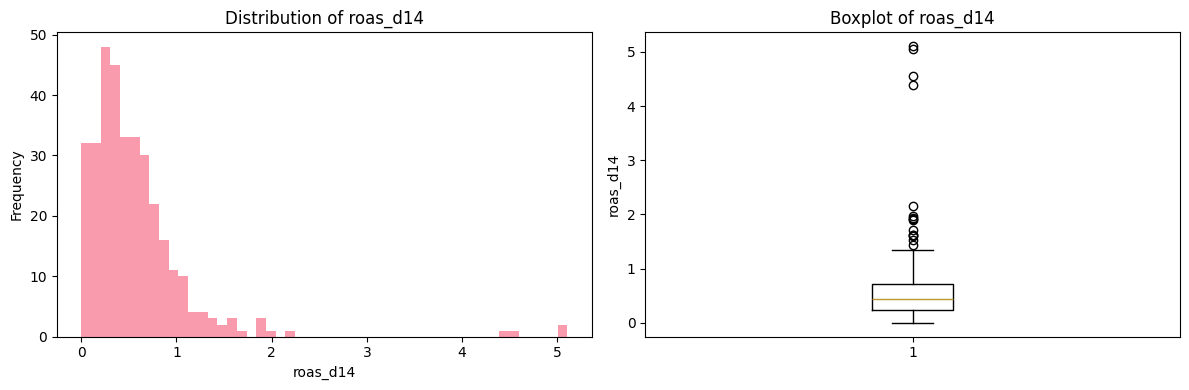

In [ ]:
# Visualize target distribution
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(df['roas_d14'], bins=50, alpha=0.7)
plt.title('Distribution of roas_d14')
plt.xlabel('roas_d14')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.boxplot(df['roas_d14'])
plt.title('Boxplot of roas_d14')
plt.ylabel('roas_d14')

plt.tight_layout()
plt.show()

In [ ]:
df_features = df.copy()

# 2. Ratio-based features (performance metrics)
# CTR (Click Through Rate)
df_features['ctr'] = df_features['clicks_sum'] / (df_features['impressions_sum'] + 1e-8)

# Session Rate (Sessions per Click)
df_features['session_rate'] = df_features['sessions_sum'] / (df_features['clicks_sum'] + 1e-8)

# User Rate (Users per Session)
df_features['user_rate'] = df_features['users_sum'] / (df_features['sessions_sum'] + 1e-8)

# Cost per Click (CPC)
df_features['cpc'] = df_features['cost_final'] / (df_features['clicks_sum'] + 1e-8)

# Cost per Session
df_features['cps'] = df_features['cost_final'] / (df_features['sessions_sum'] + 1e-8)

# Cost per User
df_features['cpu'] = df_features['cost_final'] / (df_features['users_sum'] + 1e-8)

# 3. Early LTV and retention features
# LTV growth rates
df_features['ltv_growth_d0_to_d1'] = (df_features['ltv_d1'] - df_features['ltv_d0']) / (df_features['ltv_d0'] + 1e-8)
df_features['ltv_growth_d1_to_d2'] = (df_features['ltv_d2'] - df_features['ltv_d1']) / (df_features['ltv_d1'] + 1e-8)

# Early ROAS indicators
df_features['early_roas_momentum'] = df_features['roas_d1'] - df_features['roas_d0']
df_features['roas_acceleration'] = df_features['roas_d2'] - df_features['roas_d1']

# Retention decay
df_features['retention_decay'] = df_features['ret_d1'] - df_features['ret_d2']

# 4. Efficiency metrics
# Revenue per impression
df_features['rpi'] = (df_features['ltv_d2'] * df_features['users_sum']) / (df_features['impressions_sum'] + 1e-8)

# Platform encoding (if multiple platforms)
df_features = pd.get_dummies(df_features, columns=['platform'], prefix='platform')

print("Feature engineering completed!")
print(f"New shape: {df_features.shape}")
print("\nNew features created:")
new_features = [col for col in df_features.columns if col not in df.columns]
print(new_features)

Feature engineering completed!
New shape: (338, 32)

New features created:
['ctr', 'session_rate', 'user_rate', 'cpc', 'cps', 'cpu', 'ltv_growth_d0_to_d1', 'ltv_growth_d1_to_d2', 'early_roas_momentum', 'roas_acceleration', 'retention_decay', 'rpi', 'platform_android', 'platform_ios']


In [ ]:
# Block 5: Train-Test Split based on date
# Define date ranges
train_start = '2025-05-01'
train_end = '2025-07-31'
test_start = '2025-08-01'
test_end = '2025-08-19'


# Create train and test sets
train_mask = (df_features['date'] >= train_start) & (df_features['date'] <= train_end)
test_mask = (df_features['date'] >= test_start) & (df_features['date'] <= test_end)

train_data = df_features[train_mask].copy()
test_data = df_features[test_mask].copy()

print(f"Training data shape: {train_data.shape}")
print(f"Training date range: {train_data['date'].min()} to {train_data['date'].max()}")
print(f"Test data shape: {test_data.shape}")
print(f"Test date range: {test_data['date'].min()} to {test_data['date'].max()}")

# Drop specified columns: date, c (campaign), ltv_d14 (to avoid data leakage)
columns_to_drop = ['date', 'c', 'ltv_d14']

X_train = train_data.drop(columns=columns_to_drop + ['roas_d14'])
y_train = train_data['roas_d14']

X_test = test_data.drop(columns=columns_to_drop + ['roas_d14'])
y_test = test_data['roas_d14']

print(f"\nFeatures for training: {X_train.shape[1]}")
print("Feature names:")
print(X_train.columns.tolist())

# Handle any remaining NaN or infinite values
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_test = X_test.replace([np.inf, -np.inf], np.nan)

X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

Training data shape: (255, 32)
Training date range: 2025-05-01 to 2025-07-31
Test data shape: (70, 32)
Test date range: 2025-08-01 to 2025-08-19

Features for training: 28
Feature names:
['clicks_sum', 'impressions_sum', 'sessions_sum', 'users_sum', 'cost_final', 'cpi', 'ret_d1', 'ret_d2', 'ltv_d0', 'ltv_d1', 'ltv_d2', 'roas_d0', 'roas_d1', 'roas_d2', 'ctr', 'session_rate', 'user_rate', 'cpc', 'cps', 'cpu', 'ltv_growth_d0_to_d1', 'ltv_growth_d1_to_d2', 'early_roas_momentum', 'roas_acceleration', 'retention_decay', 'rpi', 'platform_android', 'platform_ios']


In [ ]:

# Block 6: Train XGBoost Model
# Initialize and train XGBoost model
xgb_model = xgb.XGBRegressor(
    n_estimators=1000,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    early_stopping_rounds=50,
    eval_metric='rmse'
)

# Fit the model
xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    verbose=100
)

print("Model training completed!")

# Make predictions
train_pred = xgb_model.predict(X_train)
test_pred = xgb_model.predict(X_test)

print("Predictions generated!")

[0]	validation_0-rmse:0.61724	validation_1-rmse:0.29225
[55]	validation_0-rmse:0.05127	validation_1-rmse:0.36801
Model training completed!
Predictions generated!



Training Metrics:
MAE (Mean Absolute Error): 0.2270
R² (R-squared): 0.5588
RMSE (Root Mean Square Error): 0.4430

Test Metrics:
MAE (Mean Absolute Error): 0.1571
R² (R-squared): 0.4809
RMSE (Root Mean Square Error): 0.2248

Top 10 Most Important Features:
                feature  importance
27         platform_ios    0.321157
23    roas_acceleration    0.140151
13              roas_d2    0.080092
24      retention_decay    0.062041
7                ret_d2    0.060886
12              roas_d1    0.049899
6                ret_d1    0.048525
19                  cpu    0.044112
17                  cpc    0.033333
21  ltv_growth_d1_to_d2    0.027433


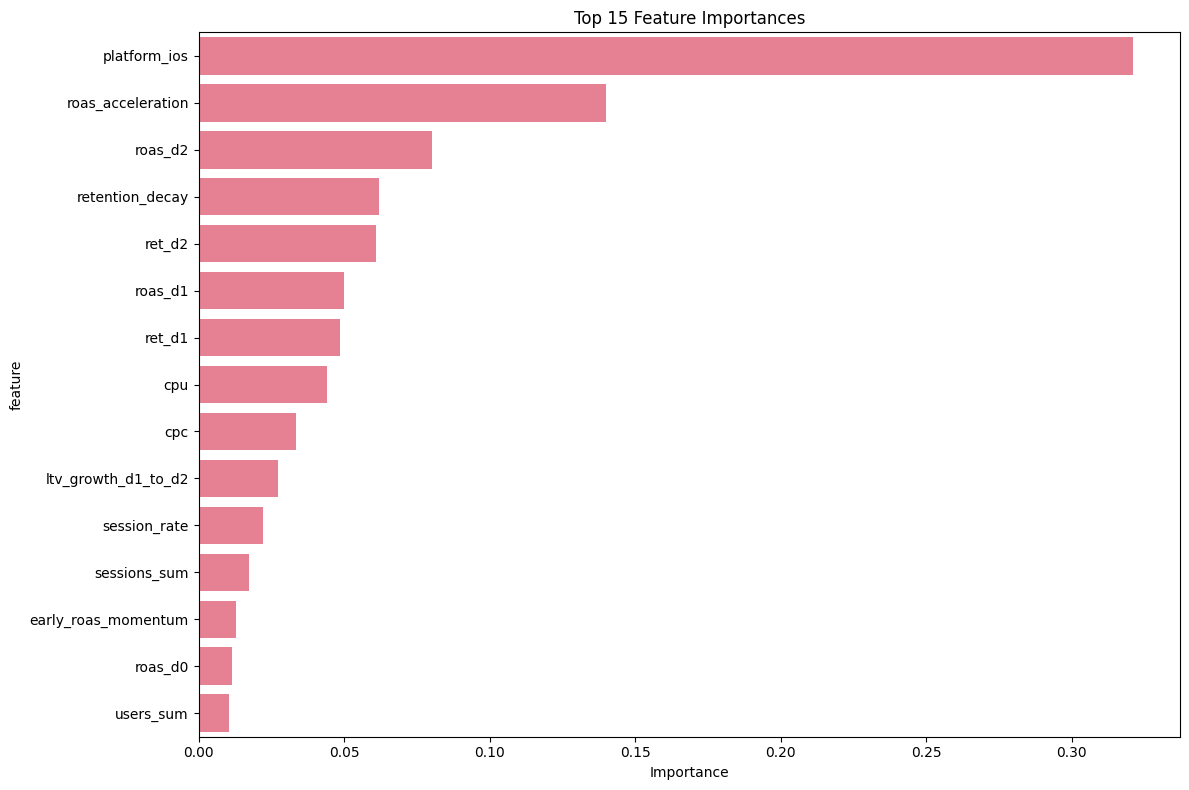

In [ ]:
# Block 7: Model Evaluation
def calculate_metrics(y_true, y_pred, dataset_name):
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))

    print(f"\n{dataset_name} Metrics:")
    print(f"MAE (Mean Absolute Error): {mae:.4f}")
    print(f"R² (R-squared): {r2:.4f}")
    print(f"RMSE (Root Mean Square Error): {rmse:.4f}")

    return mae, r2, rmse

# Calculate metrics for both train and test sets
train_mae, train_r2, train_rmse = calculate_metrics(y_train, train_pred, "Training")
test_mae, test_r2, test_rmse = calculate_metrics(y_test, test_pred, "Test")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\nTop 10 Most Important Features:")
print(feature_importance.head(10))

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance.head(15), x='importance', y='feature')
plt.title('Top 15 Feature Importances')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

Campaign-wise Test Metrics:
Campaign: 461_PL_AND_BLD28_1007 (n=2)
  MAE: 0.2170 | R²: -0.0279 | RMSE: 0.2378
Campaign: 461_PL_AND_BLD28_3007_NEW (n=19)
  MAE: 0.2250 | R²: -0.2455 | RMSE: 0.3121
Campaign: 482_PL_IOS_BLDD28_2807 (n=12)
  MAE: 0.1550 | R²: 0.4427 | RMSE: 0.1980
Campaign: 482_PL_IOS_BLDD7_1307 (n=19)
  MAE: 0.0688 | R²: 0.7449 | RMSE: 0.0952
Campaign: 482_PL_IOS_hybrid_US_2407 (n=18)
  MAE: 0.1732 | R²: -1.4984 | RMSE: 0.2276


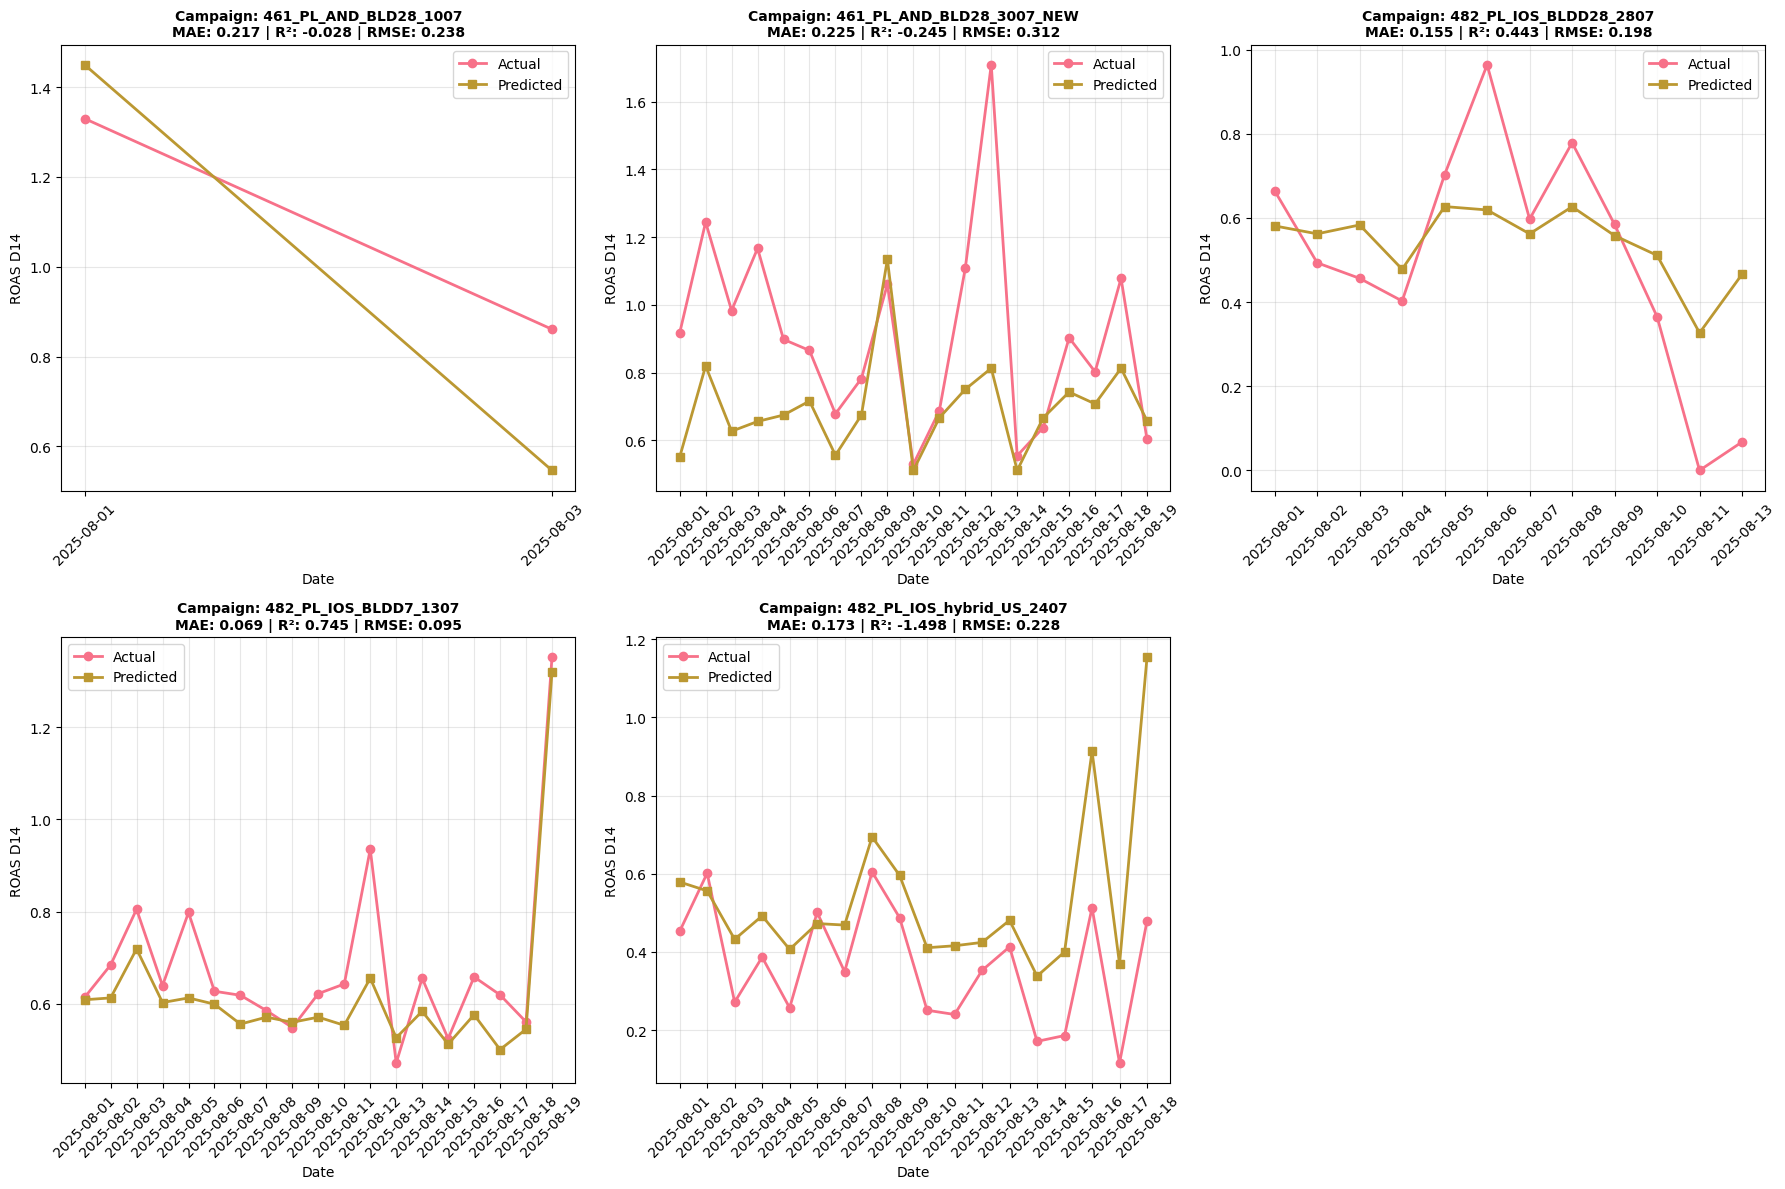


Summary Table - Test Metrics by Campaign:
                    campaign     mae      r2    rmse  n_samples
0      461_PL_AND_BLD28_1007  0.2170 -0.0279  0.2378          2
1  461_PL_AND_BLD28_3007_NEW  0.2250 -0.2455  0.3121         19
2     482_PL_IOS_BLDD28_2807  0.1550  0.4427  0.1980         12
3      482_PL_IOS_BLDD7_1307  0.0688  0.7449  0.0952         19
4  482_PL_IOS_hybrid_US_2407  0.1732 -1.4984  0.2276         18


In [ ]:
# Block 8: Visualization - Line charts by campaign for test data with metrics
# Create a dataframe with test results
test_results = test_data[['date', 'c']].copy()
test_results['actual'] = y_test.values
test_results['predicted'] = test_pred

# Calculate metrics for each campaign
campaign_metrics = []
for campaign in test_results['c'].unique():
    campaign_mask = test_results['c'] == campaign
    campaign_actual = test_results[campaign_mask]['actual']
    campaign_pred = test_results[campaign_mask]['predicted']

    if len(campaign_actual) > 0:
        mae = mean_absolute_error(campaign_actual, campaign_pred)
        r2 = r2_score(campaign_actual, campaign_pred)
        rmse = np.sqrt(mean_squared_error(campaign_actual, campaign_pred))

        campaign_metrics.append({
            'campaign': campaign,
            'mae': mae,
            'r2': r2,
            'rmse': rmse,
            'n_samples': len(campaign_actual)
        })

# Convert to DataFrame for easy viewing
campaign_metrics_df = pd.DataFrame(campaign_metrics)
print("Campaign-wise Test Metrics:")
print("="*70)
for _, row in campaign_metrics_df.iterrows():
    print(f"Campaign: {row['campaign']} (n={row['n_samples']})")
    print(f"  MAE: {row['mae']:.4f} | R²: {row['r2']:.4f} | RMSE: {row['rmse']:.4f}")
print("="*70)

# Group by date and campaign for daily aggregation
daily_results = test_results.groupby(['date', 'c']).agg({
    'actual': 'mean',
    'predicted': 'mean'
}).reset_index()

# Get unique campaigns
campaigns = daily_results['c'].unique()
n_campaigns = len(campaigns)

# Create subplots
fig, axes = plt.subplots(nrows=(n_campaigns + 2) // 3, ncols=3, figsize=(18, 6 * ((n_campaigns + 2) // 3)))
if n_campaigns == 1:
    axes = [axes]
elif (n_campaigns + 2) // 3 == 1:
    axes = [axes]
else:
    axes = axes.flatten()

for i, campaign in enumerate(campaigns):
    # Filter data for this campaign
    campaign_data = daily_results[daily_results['c'] == campaign].sort_values('date')

    # Get metrics for this campaign
    campaign_metric = campaign_metrics_df[campaign_metrics_df['campaign'] == campaign].iloc[0]

    if len(campaign_data) > 0:
        # Plot actual vs predicted
        axes[i].plot(campaign_data['date'], campaign_data['actual'],
                    marker='o', label='Actual', linewidth=2, markersize=6)
        axes[i].plot(campaign_data['date'], campaign_data['predicted'],
                    marker='s', label='Predicted', linewidth=2, markersize=6)

        # Create title with metrics
        title = f'Campaign: {campaign}\n'
        title += f'MAE: {campaign_metric["mae"]:.3f} | R²: {campaign_metric["r2"]:.3f} | RMSE: {campaign_metric["rmse"]:.3f}'
        axes[i].set_title(title, fontsize=10, fontweight='bold')

        axes[i].set_xlabel('Date')
        axes[i].set_ylabel('ROAS D14')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)
        axes[i].tick_params(axis='x', rotation=45)

# Remove empty subplots
for j in range(n_campaigns, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Display campaign metrics table
print(f"\nSummary Table - Test Metrics by Campaign:")
print(campaign_metrics_df.round(4))

## xgb model predict ltv

In [ ]:
df

,date,c,platform,clicks_sum,impressions_sum,sessions_sum,users_sum,cost_final,cpi,ret_d1,ret_d2,ltv_d0,ltv_d1,ltv_d2,ltv_d14,roas_d0,roas_d1,roas_d2,roas_d14
0,2025-05-01,461_PL_AND_BLDROASD28_20150124,android,2860,14842,6911,280,2494.2634,8.908084,0.325000,0.232143,211.204136,384.648141,495.981312,817.954790,0.084676,0.154213,0.198849,0.327934
2,2025-05-01,461_PL_AND_MAXBID_WW_2504,android,3472,5452,874,172,50.3770,0.292890,0.151163,0.081395,2.241556,2.517286,5.033931,7.135306,0.044496,0.049969,0.099925,0.141638
3,2025-05-01,461_PL_AND_ROASD0_US_3004,android,742,1446,226,28,32.3865,1.156661,0.250000,0.178571,3.170544,5.578603,6.692392,7.983315,0.097897,0.172251,0.206641,0.246501
4,2025-05-01,461_PL_AND_ROAS_US_1904,android,0,0,147,21,36.7300,1.749048,0.190476,0.095238,4.336741,5.542473,5.685568,6.589402,0.118071,0.150898,0.154794,0.179401
5,2025-05-01,461_PL_AND_chap6_US_1904 Campaign,android,0,0,789,32,32.8200,1.025625,0.187500,0.125000,2.301650,2.628462,2.924041,4.506740,0.070129,0.080087,0.089093,0.137317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2025-08-23,482_PL_IOS_BLD28_NEW_2008,ios,50337,54629,6005,693,4276.5057,6.171004,0.391053,0.278499,699.608581,1133.867501,1316.958766,2150.001253,0.163594,0.265139,0.307952,0.502747
344,2025-08-23,482_PL_IOS_BLDD7_1307,ios,18375,19782,4568,511,2108.1655,4.125568,0.436399,0.275930,483.615485,940.821415,1069.439886,1643.331652,0.229401,0.446275,0.507285,0.779508
345,2025-08-24,461_PL_AND_BLD28_3007_NEW,android,7442,9438,1736,254,1333.1699,5.248700,0.334646,0.185039,151.537825,337.072792,787.077509,1238.346623,0.113667,0.252836,0.590380,0.928874
346,2025-08-24,482_PL_IOS_BLD28_NEW_2008,ios,57594,62708,5804,709,4899.7050,6.910726,0.376587,0.290550,596.899443,915.124202,1155.899908,2027.527051,0.121824,0.186771,0.235912,0.413806


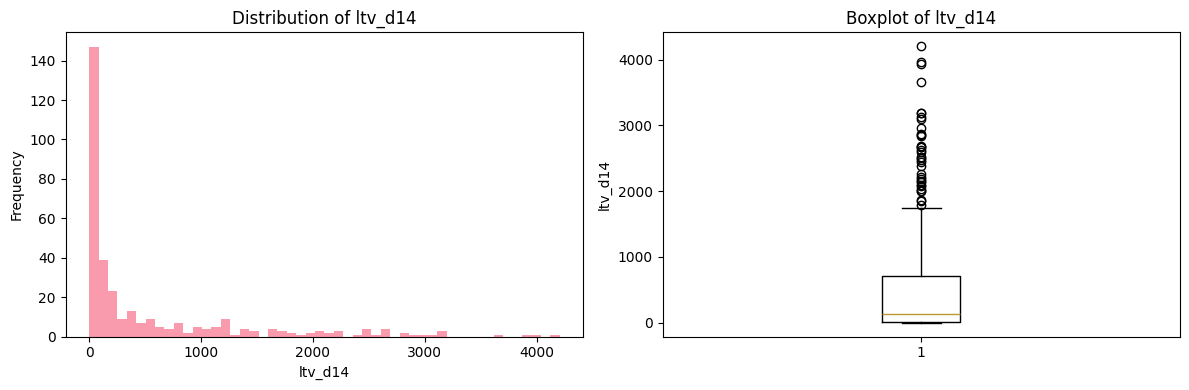

In [ ]:
# Visualize target distribution
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(df['ltv_d14'], bins=50, alpha=0.7)
plt.title('Distribution of ltv_d14')
plt.xlabel('ltv_d14')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.boxplot(df['ltv_d14'])
plt.title('Boxplot of ltv_d14')
plt.ylabel('ltv_d14')

plt.tight_layout()
plt.show()

In [ ]:
df_features = df.copy()

# 2. Ratio-based features (performance metrics)
# CTR (Click Through Rate)
df_features['ctr'] = df_features['clicks_sum'] / (df_features['impressions_sum'] + 1e-8)

# Session Rate (Sessions per Click)
df_features['session_rate'] = df_features['sessions_sum'] / (df_features['clicks_sum'] + 1e-8)

# User Rate (Users per Session)
df_features['user_rate'] = df_features['users_sum'] / (df_features['sessions_sum'] + 1e-8)

# Cost per Click (CPC)
df_features['cpc'] = df_features['cost_final'] / (df_features['clicks_sum'] + 1e-8)

# Cost per Session
df_features['cps'] = df_features['cost_final'] / (df_features['sessions_sum'] + 1e-8)

# Cost per User
df_features['cpu'] = df_features['cost_final'] / (df_features['users_sum'] + 1e-8)

# 3. Early LTV and retention features
# LTV growth rates
df_features['ltv_growth_d0_to_d1'] = (df_features['ltv_d1'] - df_features['ltv_d0']) / (df_features['ltv_d0'] + 1e-8)
df_features['ltv_growth_d1_to_d2'] = (df_features['ltv_d2'] - df_features['ltv_d1']) / (df_features['ltv_d1'] + 1e-8)

# Early ROAS indicators
df_features['early_roas_momentum'] = df_features['roas_d1'] - df_features['roas_d0']
df_features['roas_acceleration'] = df_features['roas_d2'] - df_features['roas_d1']

# Retention decay
df_features['retention_decay'] = df_features['ret_d1'] - df_features['ret_d2']

# 4. Efficiency metrics
# Revenue per impression
df_features['rpi'] = (df_features['ltv_d2'] * df_features['users_sum']) / (df_features['impressions_sum'] + 1e-8)

# Platform encoding (if multiple platforms)
df_features = pd.get_dummies(df_features, columns=['platform'], prefix='platform')

print("Feature engineering completed!")
print(f"New shape: {df_features.shape}")
print("\nNew features created:")
new_features = [col for col in df_features.columns if col not in df.columns]
print(new_features)

Feature engineering completed!
New shape: (338, 32)

New features created:
['ctr', 'session_rate', 'user_rate', 'cpc', 'cps', 'cpu', 'ltv_growth_d0_to_d1', 'ltv_growth_d1_to_d2', 'early_roas_momentum', 'roas_acceleration', 'retention_decay', 'rpi', 'platform_android', 'platform_ios']


In [ ]:
# Block 5: Train-Test Split based on date
# Define date ranges
train_start = '2025-05-01'
train_end = '2025-07-31'
test_start = '2025-08-01'
test_end = '2025-08-19'


# Create train and test sets
train_mask = (df_features['date'] >= train_start) & (df_features['date'] <= train_end)
test_mask = (df_features['date'] >= test_start) & (df_features['date'] <= test_end)

train_data = df_features[train_mask].copy()
test_data = df_features[test_mask].copy()

print(f"Training data shape: {train_data.shape}")
print(f"Training date range: {train_data['date'].min()} to {train_data['date'].max()}")
print(f"Test data shape: {test_data.shape}")
print(f"Test date range: {test_data['date'].min()} to {test_data['date'].max()}")

# Drop specified columns: date, c (campaign), ltv_d14 (to avoid data leakage)
columns_to_drop = ['date', 'c', 'roas_d14']

X_train = train_data.drop(columns=columns_to_drop + ['ltv_d14'])
y_train = train_data['ltv_d14']

X_test = test_data.drop(columns=columns_to_drop + ['ltv_d14'])
y_test = test_data['ltv_d14']

print(f"\nFeatures for training: {X_train.shape[1]}")
print("Feature names:")
print(X_train.columns.tolist())

# Handle any remaining NaN or infinite values
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_test = X_test.replace([np.inf, -np.inf], np.nan)

X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

Training data shape: (255, 32)
Training date range: 2025-05-01 to 2025-07-31
Test data shape: (70, 32)
Test date range: 2025-08-01 to 2025-08-19

Features for training: 28
Feature names:
['clicks_sum', 'impressions_sum', 'sessions_sum', 'users_sum', 'cost_final', 'cpi', 'ret_d1', 'ret_d2', 'ltv_d0', 'ltv_d1', 'ltv_d2', 'roas_d0', 'roas_d1', 'roas_d2', 'ctr', 'session_rate', 'user_rate', 'cpc', 'cps', 'cpu', 'ltv_growth_d0_to_d1', 'ltv_growth_d1_to_d2', 'early_roas_momentum', 'roas_acceleration', 'retention_decay', 'rpi', 'platform_android', 'platform_ios']


In [ ]:
# Block 6: Train XGBoost Model
# Initialize and train XGBoost model
xgb_model = xgb.XGBRegressor(
    n_estimators=1000,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    early_stopping_rounds=50,
    eval_metric='rmse'
)

# Fit the model
xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    verbose=100
)

print("Model training completed!")

# Make predictions
train_pred = xgb_model.predict(X_train)
test_pred = xgb_model.predict(X_test)

print("Predictions generated!")

[0]	validation_0-rmse:516.73922	validation_1-rmse:1329.98288
[100]	validation_0-rmse:2.97690	validation_1-rmse:375.30245
[197]	validation_0-rmse:0.36917	validation_1-rmse:373.66083
Model training completed!
Predictions generated!



Training Metrics:
MAE (Mean Absolute Error): 0.7681
R² (R-squared): 1.0000
RMSE (Root Mean Square Error): 1.0598

Test Metrics:
MAE (Mean Absolute Error): 221.1041
R² (R-squared): 0.8925
RMSE (Root Mean Square Error): 373.4308

Top 10 Most Important Features:
                feature  importance
9                ltv_d1    0.594193
10               ltv_d2    0.271678
8                ltv_d0    0.090089
3             users_sum    0.027616
4            cost_final    0.006861
2          sessions_sum    0.001239
0            clicks_sum    0.001177
16            user_rate    0.001175
25                  rpi    0.000952
20  ltv_growth_d0_to_d1    0.000778


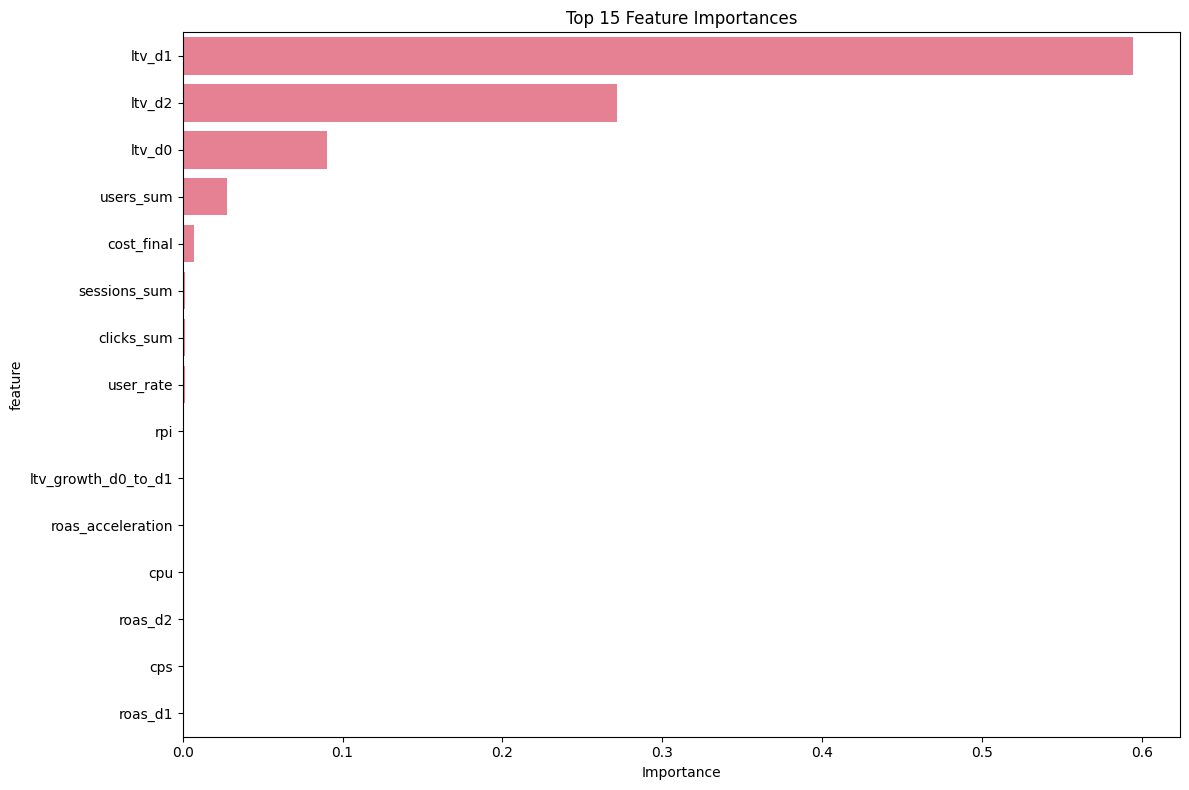

In [ ]:
# Block 7: Model Evaluation
def calculate_metrics(y_true, y_pred, dataset_name):
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))

    print(f"\n{dataset_name} Metrics:")
    print(f"MAE (Mean Absolute Error): {mae:.4f}")
    print(f"R² (R-squared): {r2:.4f}")
    print(f"RMSE (Root Mean Square Error): {rmse:.4f}")

    return mae, r2, rmse

# Calculate metrics for both train and test sets
train_mae, train_r2, train_rmse = calculate_metrics(y_train, train_pred, "Training")
test_mae, test_r2, test_rmse = calculate_metrics(y_test, test_pred, "Test")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\nTop 10 Most Important Features:")
print(feature_importance.head(10))

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance.head(15), x='importance', y='feature')
plt.title('Top 15 Feature Importances')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

Campaign-wise Test Metrics:
Campaign: 461_PL_AND_BLD28_1007 (n=2)
  MAE: 25.3199 | R²: -247.3064 | RMSE: 25.6445
Campaign: 461_PL_AND_BLD28_3007_NEW (n=19)
  MAE: 383.3796 | R²: 0.7116 | RMSE: 508.9511
Campaign: 482_PL_IOS_BLDD28_2807 (n=12)
  MAE: 103.1635 | R²: 0.8677 | RMSE: 213.7642
Campaign: 482_PL_IOS_BLDD7_1307 (n=19)
  MAE: 332.5886 | R²: 0.7684 | RMSE: 472.7556
Campaign: 482_PL_IOS_hybrid_US_2407 (n=18)
  MAE: 32.5158 | R²: 0.7605 | RMSE: 49.3448


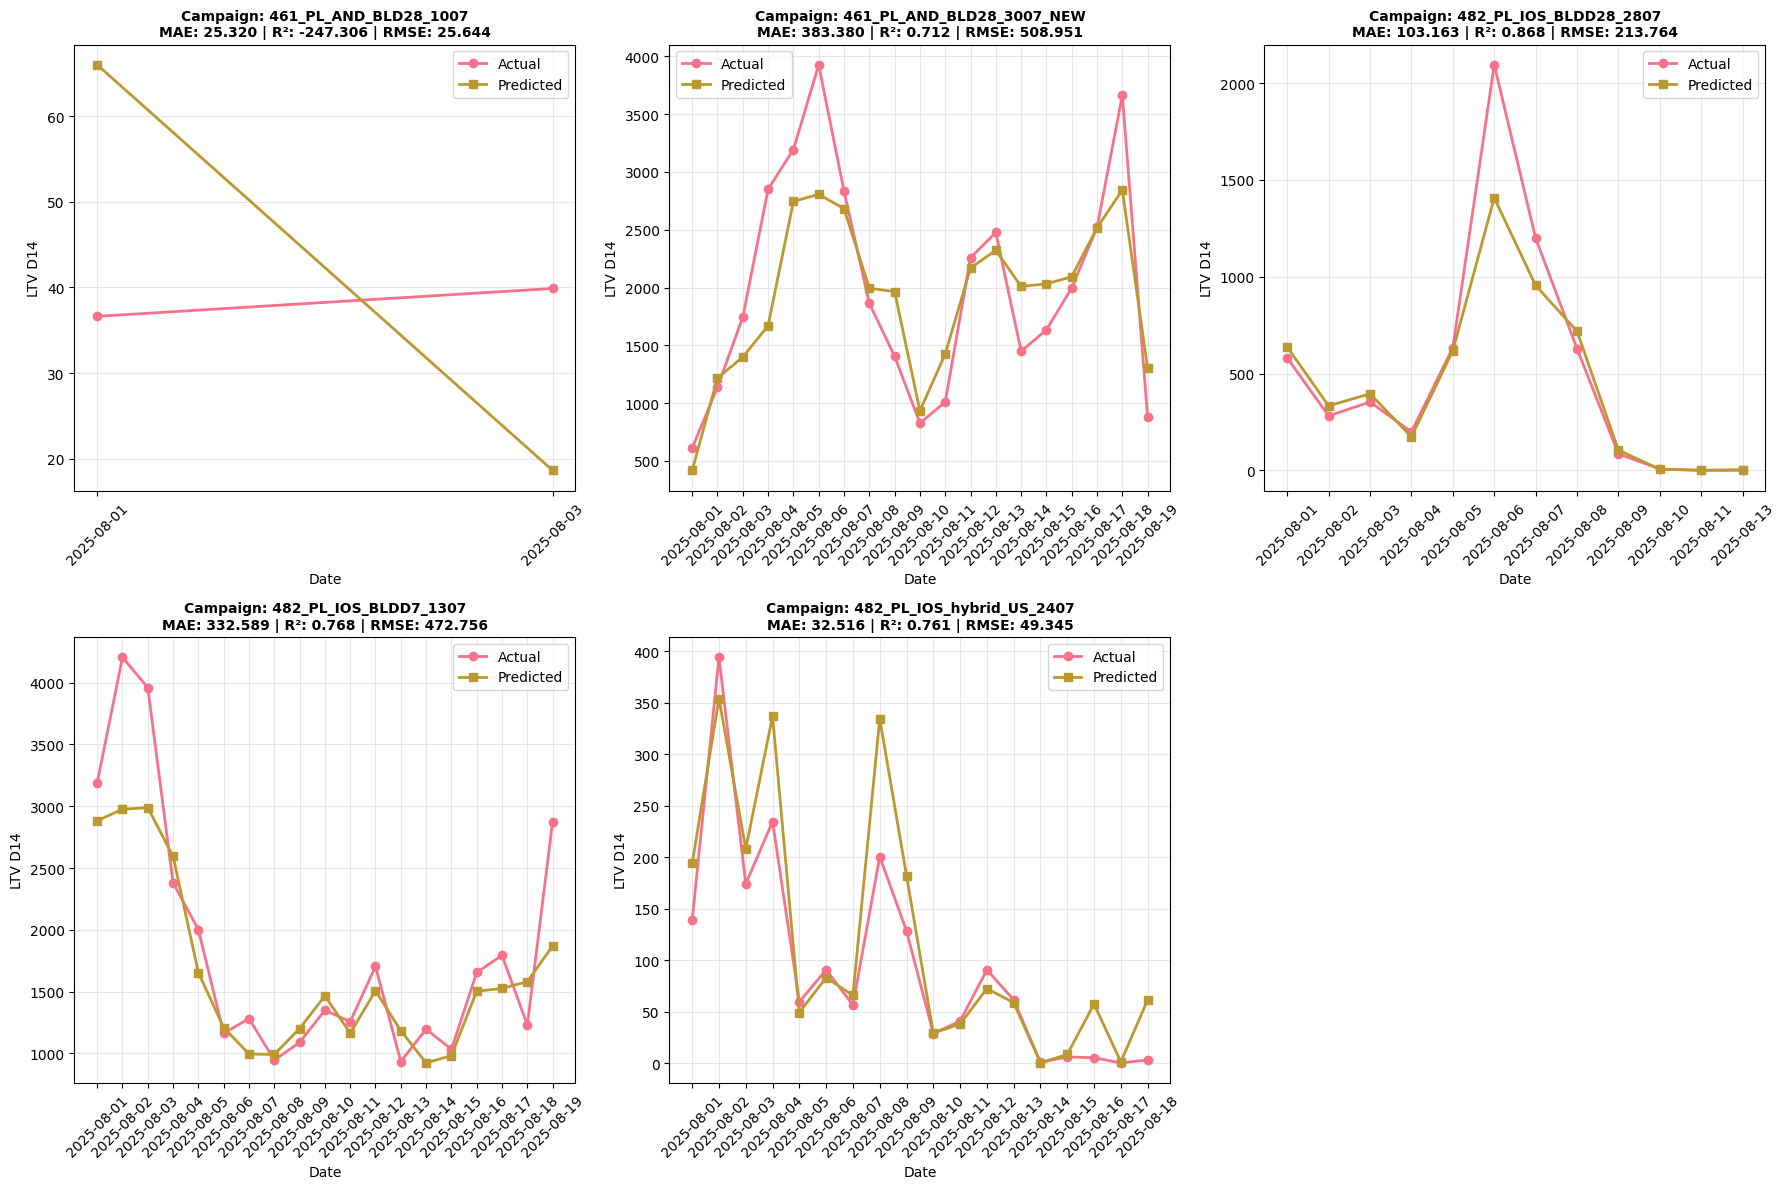


Summary Table - Test Metrics by Campaign:
                    campaign       mae        r2      rmse  n_samples
0      461_PL_AND_BLD28_1007   25.3199 -247.3064   25.6445          2
1  461_PL_AND_BLD28_3007_NEW  383.3796    0.7116  508.9511         19
2     482_PL_IOS_BLDD28_2807  103.1635    0.8677  213.7642         12
3      482_PL_IOS_BLDD7_1307  332.5886    0.7684  472.7556         19
4  482_PL_IOS_hybrid_US_2407   32.5158    0.7605   49.3448         18


In [ ]:
# Block 8: Visualization - Line charts by campaign for test data with metrics
# Create a dataframe with test results
test_results = test_data[['date', 'c']].copy()
test_results['actual'] = y_test.values
test_results['predicted'] = test_pred

# Calculate metrics for each campaign
campaign_metrics = []
for campaign in test_results['c'].unique():
    campaign_mask = test_results['c'] == campaign
    campaign_actual = test_results[campaign_mask]['actual']
    campaign_pred = test_results[campaign_mask]['predicted']

    if len(campaign_actual) > 0:
        mae = mean_absolute_error(campaign_actual, campaign_pred)
        r2 = r2_score(campaign_actual, campaign_pred)
        rmse = np.sqrt(mean_squared_error(campaign_actual, campaign_pred))

        campaign_metrics.append({
            'campaign': campaign,
            'mae': mae,
            'r2': r2,
            'rmse': rmse,
            'n_samples': len(campaign_actual)
        })

# Convert to DataFrame for easy viewing
campaign_metrics_df = pd.DataFrame(campaign_metrics)
print("Campaign-wise Test Metrics:")
print("="*70)
for _, row in campaign_metrics_df.iterrows():
    print(f"Campaign: {row['campaign']} (n={row['n_samples']})")
    print(f"  MAE: {row['mae']:.4f} | R²: {row['r2']:.4f} | RMSE: {row['rmse']:.4f}")
print("="*70)

# Group by date and campaign for daily aggregation
daily_results = test_results.groupby(['date', 'c']).agg({
    'actual': 'mean',
    'predicted': 'mean'
}).reset_index()

# Get unique campaigns
campaigns = daily_results['c'].unique()
n_campaigns = len(campaigns)

# Create subplots
fig, axes = plt.subplots(nrows=(n_campaigns + 2) // 3, ncols=3, figsize=(18, 6 * ((n_campaigns + 2) // 3)))
if n_campaigns == 1:
    axes = [axes]
elif (n_campaigns + 2) // 3 == 1:
    axes = [axes]
else:
    axes = axes.flatten()

for i, campaign in enumerate(campaigns):
    # Filter data for this campaign
    campaign_data = daily_results[daily_results['c'] == campaign].sort_values('date')

    # Get metrics for this campaign
    campaign_metric = campaign_metrics_df[campaign_metrics_df['campaign'] == campaign].iloc[0]

    if len(campaign_data) > 0:
        # Plot actual vs predicted
        axes[i].plot(campaign_data['date'], campaign_data['actual'],
                    marker='o', label='Actual', linewidth=2, markersize=6)
        axes[i].plot(campaign_data['date'], campaign_data['predicted'],
                    marker='s', label='Predicted', linewidth=2, markersize=6)

        # Create title with metrics
        title = f'Campaign: {campaign}\n'
        title += f'MAE: {campaign_metric["mae"]:.3f} | R²: {campaign_metric["r2"]:.3f} | RMSE: {campaign_metric["rmse"]:.3f}'
        axes[i].set_title(title, fontsize=10, fontweight='bold')

        axes[i].set_xlabel('Date')
        axes[i].set_ylabel('LTV D14')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)
        axes[i].tick_params(axis='x', rotation=45)

# Remove empty subplots
for j in range(n_campaigns, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Display campaign metrics table
print(f"\nSummary Table - Test Metrics by Campaign:")
print(campaign_metrics_df.round(4))

## Regression model predict ltv

In [ ]:
# Block 1: Import necessary libraries for regression models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.pipeline import Pipeline
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


In [ ]:
df_reg = df.copy()
# 3. Early LTV and retention features
# LTV growth rates
df_reg['ltv_growth_d0_to_d1'] = (df_reg['ltv_d1'] - df_reg['ltv_d0']) / (df_reg['ltv_d0'] + 1e-8)
df_reg['ltv_growth_d1_to_d2'] = (df_reg['ltv_d2'] - df_reg['ltv_d1']) / (df_reg['ltv_d1'] + 1e-8)

# Early ROAS indicators
df_reg['early_roas_momentum'] = df_reg['roas_d1'] - df_reg['roas_d0']
df_reg['roas_acceleration'] = df_reg['roas_d2'] - df_reg['roas_d1']

# Retention decay
df_reg['retention_decay'] = df_reg['ret_d1'] - df_reg['ret_d2']
# ROI-based features
df_reg['roi_d0'] = (df_reg['ltv_d0'] * df_reg['users_sum']) / (df_reg['cost_final'] + 1e-8)
df_reg['roi_d1'] = (df_reg['ltv_d1'] * df_reg['users_sum']) / (df_reg['cost_final'] + 1e-8)
df_reg['roi_d2'] = (df_reg['ltv_d2'] * df_reg['users_sum']) / (df_reg['cost_final'] + 1e-8)
# Platform encoding (if multiple platforms)
df_reg = pd.get_dummies(df_reg, columns=['platform'], prefix='platform')

print("Enhanced feature engineering completed!")
print(f"New shape: {df_reg.shape}")
print("\nNew features created:")
new_features = [col for col in df_reg.columns if col not in df.columns]
print(new_features)

Enhanced feature engineering completed!
New shape: (338, 28)

New features created:
['ltv_growth_d0_to_d1', 'ltv_growth_d1_to_d2', 'early_roas_momentum', 'roas_acceleration', 'retention_decay', 'roi_d0', 'roi_d1', 'roi_d2', 'platform_android', 'platform_ios']


In [ ]:
# Block 5: Train-Test Split based on date
# Define date ranges
train_start = '2025-05-01'
train_end = '2025-07-31'
test_start = '2025-08-01'
test_end = '2025-08-19'


# Create train and test sets
train_mask = (df_reg['date'] >= train_start) & (df_reg['date'] <= train_end)
test_mask = (df_reg['date'] >= test_start) & (df_reg['date'] <= test_end)

train_data = df_reg[train_mask].copy()
test_data = df_reg[test_mask].copy()

print(f"Training data shape: {train_data.shape}")
print(f"Training date range: {train_data['date'].min()} to {train_data['date'].max()}")
print(f"Test data shape: {test_data.shape}")
print(f"Test date range: {test_data['date'].min()} to {test_data['date'].max()}")

# Drop specified columns: date, c (campaign), ltv_d14 (to avoid data leakage)
columns_to_drop = ['date', 'c', 'roas_d14']

X_train = train_data.drop(columns=columns_to_drop + ['ltv_d14'])
y_train = train_data['ltv_d14']

X_test = test_data.drop(columns=columns_to_drop + ['ltv_d14'])
y_test = test_data['ltv_d14']

print(f"\nFeatures for training: {X_train.shape[1]}")
print("Feature names:")
print(X_train.columns.tolist())

# Handle any remaining NaN or infinite values
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_test = X_test.replace([np.inf, -np.inf], np.nan)

X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

Training data shape: (255, 28)
Training date range: 2025-05-01 to 2025-07-31
Test data shape: (70, 28)
Test date range: 2025-08-01 to 2025-08-19

Features for training: 24
Feature names:
['clicks_sum', 'impressions_sum', 'sessions_sum', 'users_sum', 'cost_final', 'cpi', 'ret_d1', 'ret_d2', 'ltv_d0', 'ltv_d1', 'ltv_d2', 'roas_d0', 'roas_d1', 'roas_d2', 'ltv_growth_d0_to_d1', 'ltv_growth_d1_to_d2', 'early_roas_momentum', 'roas_acceleration', 'retention_decay', 'roi_d0', 'roi_d1', 'roi_d2', 'platform_android', 'platform_ios']


In [ ]:
# Block 6: Train Multiple Regression Models
print("Training Multiple Regression Models...")
print("="*60)

# Prepare data for scaling (important for linear models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dictionary to store models and their predictions
models = {}
train_predictions = {}
test_predictions = {}
model_scores = []

# 1. Linear Regression
print("Training Linear Regression...")
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
models['Linear Regression'] = lr
train_predictions['Linear Regression'] = lr.predict(X_train_scaled)
test_predictions['Linear Regression'] = lr.predict(X_test_scaled)

# 2. Ridge Regression (L2 regularization)
print("Training Ridge Regression...")
ridge = Ridge(alpha=1.0, random_state=42)
ridge.fit(X_train_scaled, y_train)
models['Ridge'] = ridge
train_predictions['Ridge'] = ridge.predict(X_train_scaled)
test_predictions['Ridge'] = ridge.predict(X_test_scaled)

# 3. Lasso Regression (L1 regularization)
print("Training Lasso Regression...")
lasso = Lasso(alpha=0.1, random_state=42, max_iter=2000)
lasso.fit(X_train_scaled, y_train)
models['Lasso'] = lasso
train_predictions['Lasso'] = lasso.predict(X_train_scaled)
test_predictions['Lasso'] = lasso.predict(X_test_scaled)

# 4. Elastic Net (L1 + L2 regularization)
print("Training Elastic Net...")
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42, max_iter=2000)
elastic.fit(X_train_scaled, y_train)
models['Elastic Net'] = elastic
train_predictions['Elastic Net'] = elastic.predict(X_train_scaled)
test_predictions['Elastic Net'] = elastic.predict(X_test_scaled)

# 5. Random Forest Regressor (doesn't need scaling)
print("Training Random Forest...")
rf = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
models['Random Forest'] = rf
train_predictions['Random Forest'] = rf.predict(X_train)
test_predictions['Random Forest'] = rf.predict(X_test)

# 6. Gradient Boosting Regressor
print("Training Gradient Boosting...")
gb = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
gb.fit(X_train, y_train)
models['Gradient Boosting'] = gb
train_predictions['Gradient Boosting'] = gb.predict(X_train)
test_predictions['Gradient Boosting'] = gb.predict(X_test)

# 7. Support Vector Regression
print("Training SVR...")
svr = SVR(kernel='rbf', C=1.0, gamma='scale')
svr.fit(X_train_scaled, y_train)
models['SVR'] = svr
train_predictions['SVR'] = svr.predict(X_train_scaled)
test_predictions['SVR'] = svr.predict(X_test_scaled)

print("All models trained successfully!")
print("="*60)

Training Multiple Regression Models...
Training Linear Regression...
Training Ridge Regression...
Training Lasso Regression...
Training Elastic Net...
Training Random Forest...
Training Gradient Boosting...
Training SVR...
All models trained successfully!


TRAINING SET PERFORMANCE:
                Model       MAE      R2      RMSE
0   Linear Regression   38.6514  0.9875   63.3580
2               Ridge   40.0264  0.9867   65.4514
4               Lasso   38.5992  0.9874   63.7200
6         Elastic Net   47.0076  0.9822   75.5427
8       Random Forest   16.7251  0.9971   30.6499
10  Gradient Boosting    0.0157  1.0000    0.0200
12                SVR  275.5621 -0.1287  601.9072

TEST SET PERFORMANCE:
                Model        MAE      R2       RMSE
1   Linear Regression   166.9397  0.8839   388.1513
3               Ridge   145.5107  0.9464   263.7810
5               Lasso   166.2987  0.8820   391.3591
7         Elastic Net   189.0797  0.8526   437.3188
9       Random Forest   230.6571  0.8809   393.2014
11  Gradient Boosting   233.9113  0.8834   388.9528
13                SVR  1093.7081 -0.8789  1561.4813

🏆 Best Model (Test R²): Ridge
Test R²: 0.9464


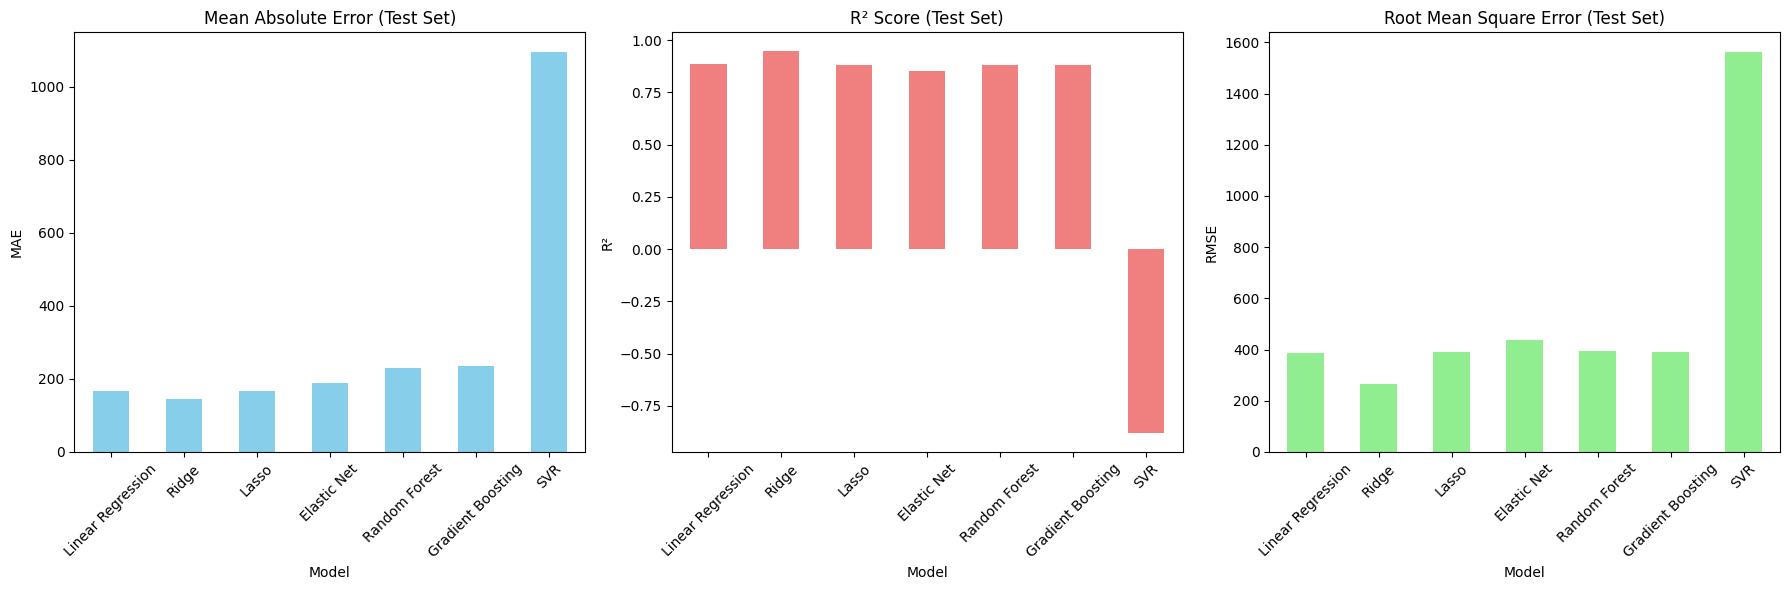


Top 10 Most Important Features (Ridge) - by coefficient magnitude:
            feature  coefficient  abs_coefficient
10           ltv_d2   291.560844       291.560844
9            ltv_d1   162.351635       162.351635
21           roi_d2   122.056201       122.056201
19           roi_d0  -113.282065       113.282065
2      sessions_sum    77.007950        77.007950
1   impressions_sum   -58.543102        58.543102
0        clicks_sum    57.914650        57.914650
20           roi_d1   -51.790885        51.790885
4        cost_final    41.805387        41.805387
3         users_sum    21.455489        21.455489


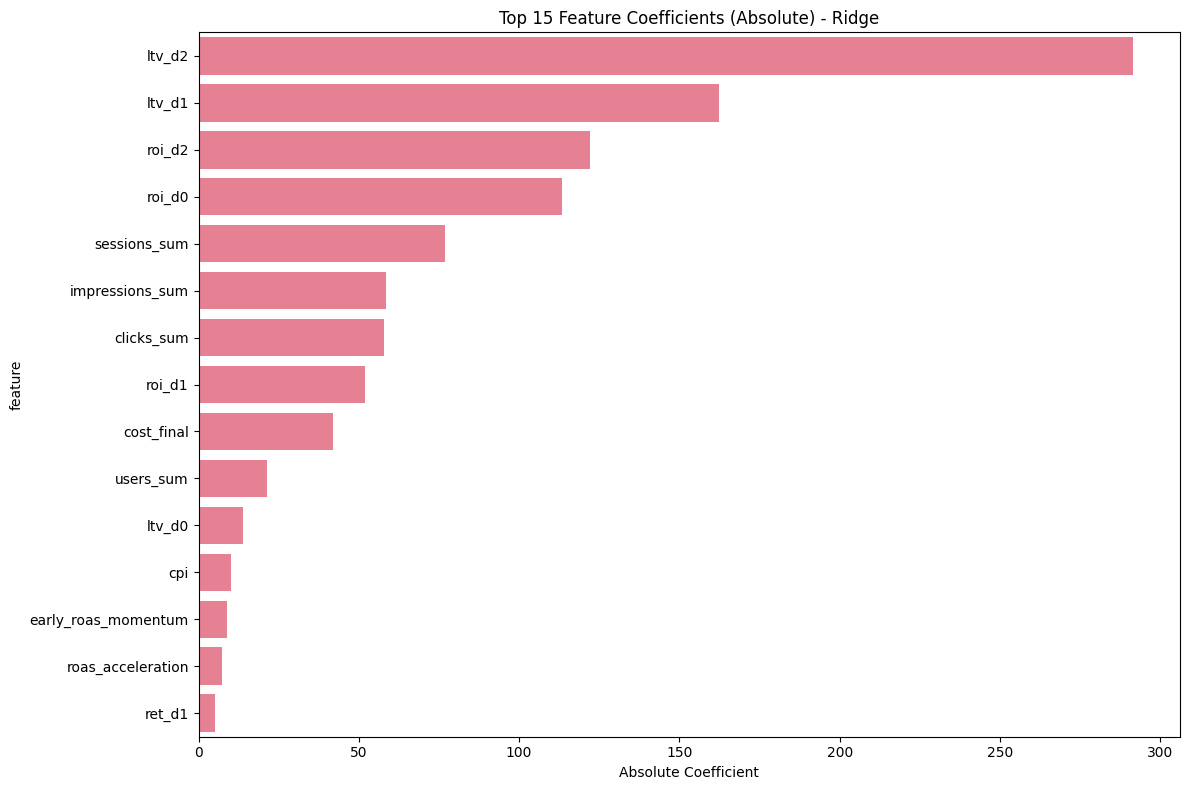

In [ ]:
# Block 7: Model Evaluation and Comparison
def calculate_metrics(y_true, y_pred, model_name, dataset_name):
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))

    return {
        'Model': model_name,
        'Dataset': dataset_name,
        'MAE': mae,
        'R2': r2,
        'RMSE': rmse
    }

# Calculate metrics for all models
all_metrics = []

for model_name in models.keys():
    # Training metrics
    train_metrics = calculate_metrics(y_train, train_predictions[model_name], model_name, 'Train')
    all_metrics.append(train_metrics)

    # Test metrics
    test_metrics = calculate_metrics(y_test, test_predictions[model_name], model_name, 'Test')
    all_metrics.append(test_metrics)

# Create DataFrame for easy comparison
metrics_df = pd.DataFrame(all_metrics)

# Pivot for better display
train_metrics_df = metrics_df[metrics_df['Dataset'] == 'Train'].drop('Dataset', axis=1)
test_metrics_df = metrics_df[metrics_df['Dataset'] == 'Test'].drop('Dataset', axis=1)

print("TRAINING SET PERFORMANCE:")
print("="*70)
print(train_metrics_df.round(4))

print("\nTEST SET PERFORMANCE:")
print("="*70)
print(test_metrics_df.round(4))

# Find best model based on test R²
best_model_idx = test_metrics_df['R2'].idxmax()
best_model_name = test_metrics_df.loc[best_model_idx, 'Model']
print(f"\n🏆 Best Model (Test R²): {best_model_name}")
print(f"Test R²: {test_metrics_df.loc[best_model_idx, 'R2']:.4f}")

# Visualize model comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# MAE comparison
test_metrics_df.set_index('Model')['MAE'].plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Mean Absolute Error (Test Set)')
axes[0].set_ylabel('MAE')
axes[0].tick_params(axis='x', rotation=45)

# R² comparison
test_metrics_df.set_index('Model')['R2'].plot(kind='bar', ax=axes[1], color='lightcoral')
axes[1].set_title('R² Score (Test Set)')
axes[1].set_ylabel('R²')
axes[1].tick_params(axis='x', rotation=45)

# RMSE comparison
test_metrics_df.set_index('Model')['RMSE'].plot(kind='bar', ax=axes[2], color='lightgreen')
axes[2].set_title('Root Mean Square Error (Test Set)')
axes[2].set_ylabel('RMSE')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Feature importance for tree-based models
if best_model_name in ['Random Forest', 'Gradient Boosting']:
    feature_importance = pd.DataFrame({
        'feature': X_train.columns,
        'importance': models[best_model_name].feature_importances_
    }).sort_values('importance', ascending=False)

    print(f"\nTop 10 Most Important Features ({best_model_name}):")
    print(feature_importance.head(10))

    # Plot feature importance
    plt.figure(figsize=(12, 8))
    sns.barplot(data=feature_importance.head(15), x='importance', y='feature')
    plt.title(f'Top 15 Feature Importances - {best_model_name}')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()
elif best_model_name in ['Ridge', 'Lasso', 'Elastic Net']:
    # For linear models, show coefficients
    coef_df = pd.DataFrame({
        'feature': X_train.columns,
        'coefficient': models[best_model_name].coef_
    })
    coef_df['abs_coefficient'] = np.abs(coef_df['coefficient'])
    coef_df = coef_df.sort_values('abs_coefficient', ascending=False)

    print(f"\nTop 10 Most Important Features ({best_model_name}) - by coefficient magnitude:")
    print(coef_df.head(10))

    # Plot coefficients
    plt.figure(figsize=(12, 8))
    sns.barplot(data=coef_df.head(15), x='abs_coefficient', y='feature')
    plt.title(f'Top 15 Feature Coefficients (Absolute) - {best_model_name}')
    plt.xlabel('Absolute Coefficient')
    plt.tight_layout()
    plt.show()

Campaign-wise Test Metrics (Best Model: Ridge):
Campaign: 461_PL_AND_BLD28_1007 (n=2)
  MAE: 33.4300 | R²: -730.8433 | RMSE: 44.0260
Campaign: 461_PL_AND_BLD28_3007_NEW (n=19)
  MAE: 309.1144 | R²: 0.7748 | RMSE: 449.7288
Campaign: 482_PL_IOS_BLDD28_2807 (n=12)
  MAE: 92.9118 | R²: 0.9018 | RMSE: 184.1747
Campaign: 482_PL_IOS_BLDD7_1307 (n=19)
  MAE: 139.4284 | R²: 0.9674 | RMSE: 177.4001
Campaign: 482_PL_IOS_hybrid_US_2407 (n=18)
  MAE: 26.7575 | R²: 0.8967 | RMSE: 32.4040


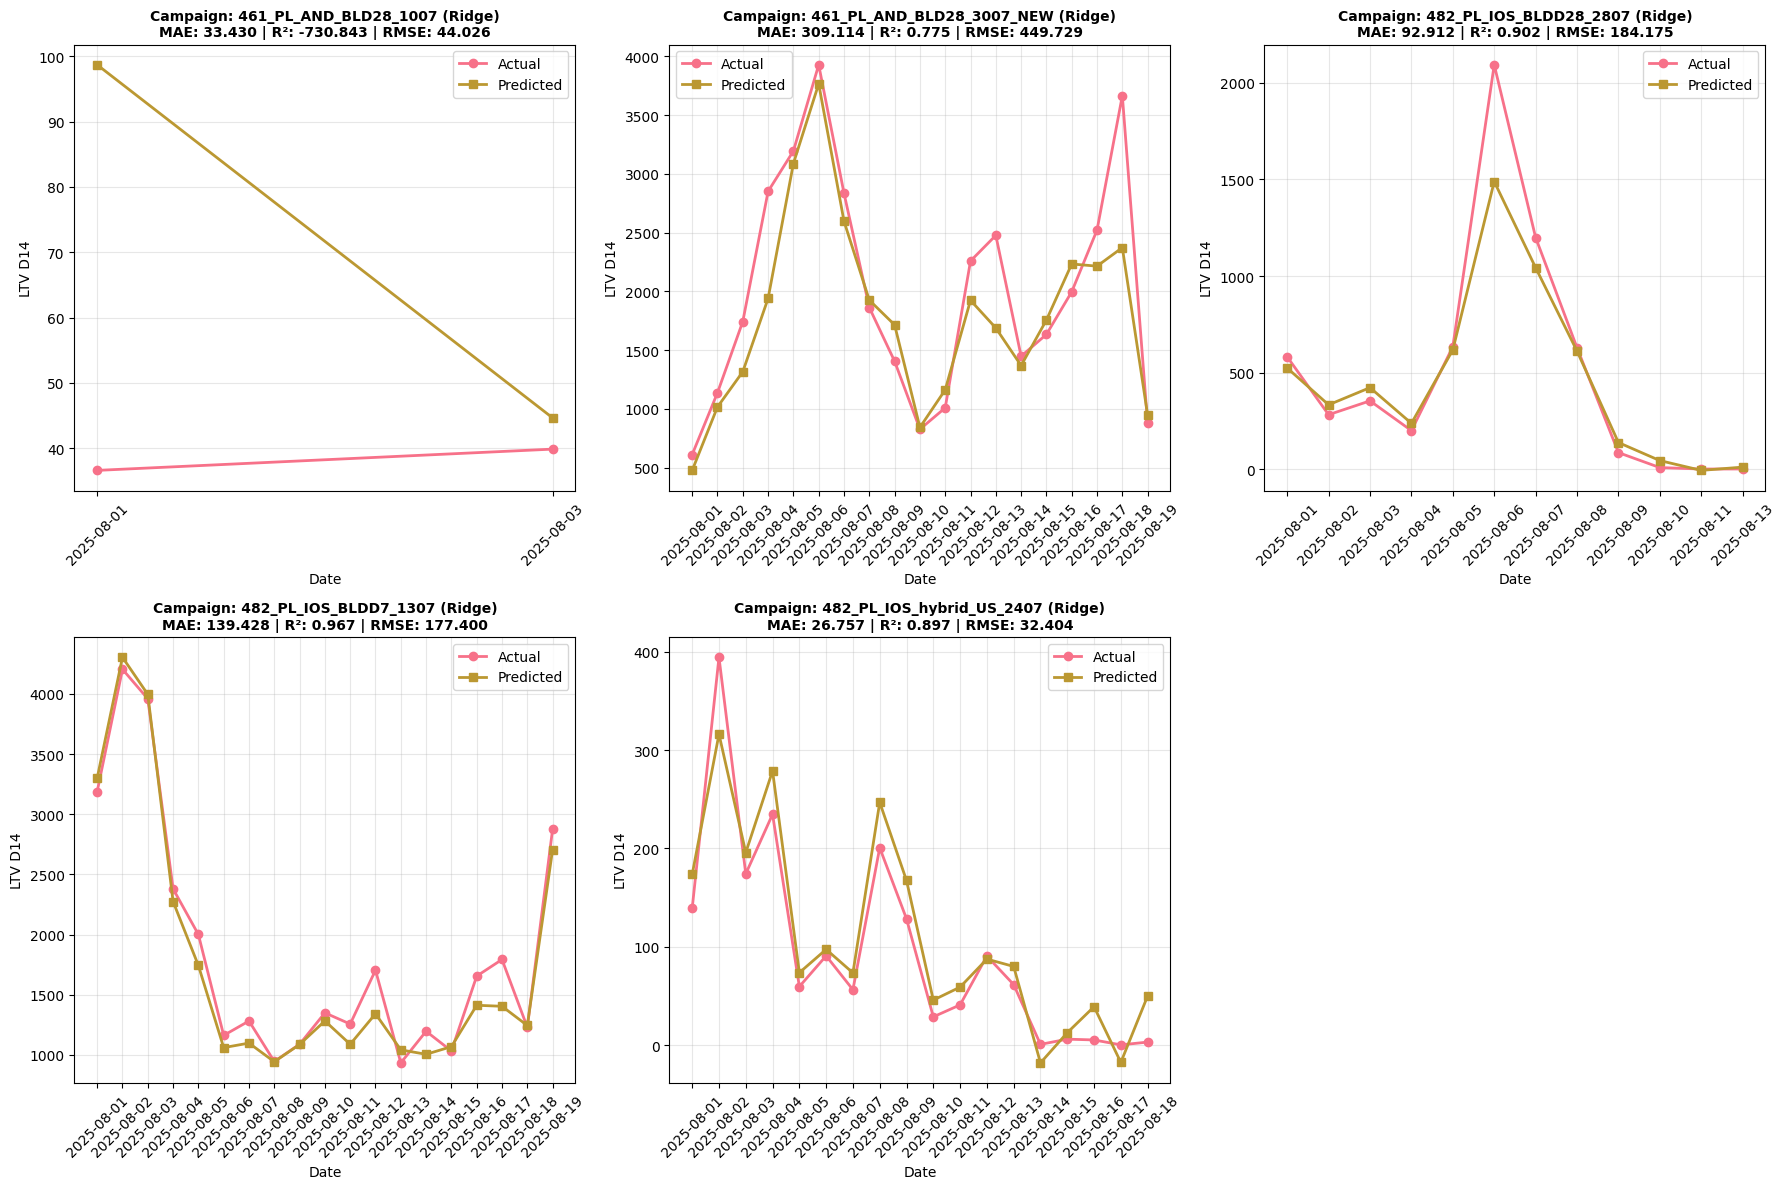


Summary Table - Test Metrics by Campaign (Ridge):
                    campaign       mae        r2      rmse  n_samples
0      461_PL_AND_BLD28_1007   33.4300 -730.8433   44.0260          2
1  461_PL_AND_BLD28_3007_NEW  309.1144    0.7748  449.7288         19
2     482_PL_IOS_BLDD28_2807   92.9118    0.9018  184.1747         12
3      482_PL_IOS_BLDD7_1307  139.4284    0.9674  177.4001         19
4  482_PL_IOS_hybrid_US_2407   26.7575    0.8967   32.4040         18


In [ ]:
# Block 8: Best Model - Campaign-wise Analysis and Visualization
# Use the best model's predictions
best_test_pred = test_predictions[best_model_name]

# Create a dataframe with test results using best model
test_results = test_data[['date', 'c']].copy()
test_results['actual'] = y_test.values
test_results['predicted'] = best_test_pred

# Calculate metrics for each campaign using best model
campaign_metrics = []
for campaign in test_results['c'].unique():
    campaign_mask = test_results['c'] == campaign
    campaign_actual = test_results[campaign_mask]['actual']
    campaign_pred = test_results[campaign_mask]['predicted']

    if len(campaign_actual) > 0:
        mae = mean_absolute_error(campaign_actual, campaign_pred)
        r2 = r2_score(campaign_actual, campaign_pred)
        rmse = np.sqrt(mean_squared_error(campaign_actual, campaign_pred))

        campaign_metrics.append({
            'campaign': campaign,
            'mae': mae,
            'r2': r2,
            'rmse': rmse,
            'n_samples': len(campaign_actual)
        })

# Convert to DataFrame for easy viewing
campaign_metrics_df = pd.DataFrame(campaign_metrics)
print(f"Campaign-wise Test Metrics (Best Model: {best_model_name}):")
print("="*70)
for _, row in campaign_metrics_df.iterrows():
    print(f"Campaign: {row['campaign']} (n={row['n_samples']})")
    print(f"  MAE: {row['mae']:.4f} | R²: {row['r2']:.4f} | RMSE: {row['rmse']:.4f}")
print("="*70)

# Group by date and campaign for daily aggregation
daily_results = test_results.groupby(['date', 'c']).agg({
    'actual': 'mean',
    'predicted': 'mean'
}).reset_index()

# Get unique campaigns
campaigns = daily_results['c'].unique()
n_campaigns = len(campaigns)

# Create subplots
fig, axes = plt.subplots(nrows=(n_campaigns + 2) // 3, ncols=3, figsize=(18, 6 * ((n_campaigns + 2) // 3)))
if n_campaigns == 1:
    axes = [axes]
elif (n_campaigns + 2) // 3 == 1:
    axes = [axes]
else:
    axes = axes.flatten()

for i, campaign in enumerate(campaigns):
    # Filter data for this campaign
    campaign_data = daily_results[daily_results['c'] == campaign].sort_values('date')

    # Get metrics for this campaign
    campaign_metric = campaign_metrics_df[campaign_metrics_df['campaign'] == campaign].iloc[0]

    if len(campaign_data) > 0:
        # Plot actual vs predicted
        axes[i].plot(campaign_data['date'], campaign_data['actual'],
                    marker='o', label='Actual', linewidth=2, markersize=6)
        axes[i].plot(campaign_data['date'], campaign_data['predicted'],
                    marker='s', label='Predicted', linewidth=2, markersize=6)

        # Create title with metrics
        title = f'Campaign: {campaign} ({best_model_name})\n'
        title += f'MAE: {campaign_metric["mae"]:.3f} | R²: {campaign_metric["r2"]:.3f} | RMSE: {campaign_metric["rmse"]:.3f}'
        axes[i].set_title(title, fontsize=10, fontweight='bold')

        axes[i].set_xlabel('Date')
        axes[i].set_ylabel('LTV D14')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)
        axes[i].tick_params(axis='x', rotation=45)

# Remove empty subplots
for j in range(n_campaigns, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Display campaign metrics table
print(f"\nSummary Table - Test Metrics by Campaign ({best_model_name}):")
print(campaign_metrics_df.round(4))

## Regression model predict roas

In [ ]:
# Block 1: Import necessary libraries for regression models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.pipeline import Pipeline
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


In [ ]:
df_reg = df.copy()
# 3. Early LTV and retention features
# LTV growth rates
df_reg['ltv_growth_d0_to_d1'] = (df_reg['ltv_d1'] - df_reg['ltv_d0']) / (df_reg['ltv_d0'] + 1e-8)
df_reg['ltv_growth_d1_to_d2'] = (df_reg['ltv_d2'] - df_reg['ltv_d1']) / (df_reg['ltv_d1'] + 1e-8)

# Early ROAS indicators
df_reg['early_roas_momentum'] = df_reg['roas_d1'] - df_reg['roas_d0']
df_reg['roas_acceleration'] = df_reg['roas_d2'] - df_reg['roas_d1']

# Retention decay
df_reg['retention_decay'] = df_reg['ret_d1'] - df_reg['ret_d2']
# ROI-based features
df_reg['roi_d0'] = (df_reg['ltv_d0'] * df_reg['users_sum']) / (df_reg['cost_final'] + 1e-8)
df_reg['roi_d1'] = (df_reg['ltv_d1'] * df_reg['users_sum']) / (df_reg['cost_final'] + 1e-8)
df_reg['roi_d2'] = (df_reg['ltv_d2'] * df_reg['users_sum']) / (df_reg['cost_final'] + 1e-8)
# Platform encoding (if multiple platforms)
df_reg = pd.get_dummies(df_reg, columns=['platform'], prefix='platform')

print("Enhanced feature engineering completed!")
print(f"New shape: {df_reg.shape}")
print("\nNew features created:")
new_features = [col for col in df_reg.columns if col not in df.columns]
print(new_features)

Enhanced feature engineering completed!
New shape: (338, 28)

New features created:
['ltv_growth_d0_to_d1', 'ltv_growth_d1_to_d2', 'early_roas_momentum', 'roas_acceleration', 'retention_decay', 'roi_d0', 'roi_d1', 'roi_d2', 'platform_android', 'platform_ios']


In [ ]:
# Block 5: Train-Test Split based on date
# Define date ranges
train_start = '2025-05-01'
train_end = '2025-07-31'
test_start = '2025-08-01'
test_end = '2025-08-19'


# Create train and test sets
train_mask = (df_reg['date'] >= train_start) & (df_reg['date'] <= train_end)
test_mask = (df_reg['date'] >= test_start) & (df_reg['date'] <= test_end)

train_data = df_reg[train_mask].copy()
test_data = df_reg[test_mask].copy()

print(f"Training data shape: {train_data.shape}")
print(f"Training date range: {train_data['date'].min()} to {train_data['date'].max()}")
print(f"Test data shape: {test_data.shape}")
print(f"Test date range: {test_data['date'].min()} to {test_data['date'].max()}")

# Drop specified columns: date, c (campaign), ltv_d14 (to avoid data leakage)
columns_to_drop = ['date', 'c', 'ltv_d14']

X_train = train_data.drop(columns=columns_to_drop + ['roas_d14'])
y_train = train_data['roas_d14']

X_test = test_data.drop(columns=columns_to_drop + ['roas_d14'])
y_test = test_data['roas_d14']

print(f"\nFeatures for training: {X_train.shape[1]}")
print("Feature names:")
print(X_train.columns.tolist())

# Handle any remaining NaN or infinite values
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_test = X_test.replace([np.inf, -np.inf], np.nan)

X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

Training data shape: (255, 28)
Training date range: 2025-05-01 to 2025-07-31
Test data shape: (70, 28)
Test date range: 2025-08-01 to 2025-08-19

Features for training: 24
Feature names:
['clicks_sum', 'impressions_sum', 'sessions_sum', 'users_sum', 'cost_final', 'cpi', 'ret_d1', 'ret_d2', 'ltv_d0', 'ltv_d1', 'ltv_d2', 'roas_d0', 'roas_d1', 'roas_d2', 'ltv_growth_d0_to_d1', 'ltv_growth_d1_to_d2', 'early_roas_momentum', 'roas_acceleration', 'retention_decay', 'roi_d0', 'roi_d1', 'roi_d2', 'platform_android', 'platform_ios']


In [ ]:
# Block 6: Train Multiple Regression Models
print("Training Multiple Regression Models...")
print("="*60)

# Prepare data for scaling (important for linear models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dictionary to store models and their predictions
models = {}
train_predictions = {}
test_predictions = {}
model_scores = []

# 1. Linear Regression
print("Training Linear Regression...")
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
models['Linear Regression'] = lr
train_predictions['Linear Regression'] = lr.predict(X_train_scaled)
test_predictions['Linear Regression'] = lr.predict(X_test_scaled)

# 2. Ridge Regression (L2 regularization)
print("Training Ridge Regression...")
ridge = Ridge(alpha=1.0, random_state=42)
ridge.fit(X_train_scaled, y_train)
models['Ridge'] = ridge
train_predictions['Ridge'] = ridge.predict(X_train_scaled)
test_predictions['Ridge'] = ridge.predict(X_test_scaled)

# 3. Lasso Regression (L1 regularization)
print("Training Lasso Regression...")
lasso = Lasso(alpha=0.1, random_state=42, max_iter=2000)
lasso.fit(X_train_scaled, y_train)
models['Lasso'] = lasso
train_predictions['Lasso'] = lasso.predict(X_train_scaled)
test_predictions['Lasso'] = lasso.predict(X_test_scaled)

# 4. Elastic Net (L1 + L2 regularization)
print("Training Elastic Net...")
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42, max_iter=2000)
elastic.fit(X_train_scaled, y_train)
models['Elastic Net'] = elastic
train_predictions['Elastic Net'] = elastic.predict(X_train_scaled)
test_predictions['Elastic Net'] = elastic.predict(X_test_scaled)

# 5. Random Forest Regressor (doesn't need scaling)
print("Training Random Forest...")
rf = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
models['Random Forest'] = rf
train_predictions['Random Forest'] = rf.predict(X_train)
test_predictions['Random Forest'] = rf.predict(X_test)

# 6. Gradient Boosting Regressor
print("Training Gradient Boosting...")
gb = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
gb.fit(X_train, y_train)
models['Gradient Boosting'] = gb
train_predictions['Gradient Boosting'] = gb.predict(X_train)
test_predictions['Gradient Boosting'] = gb.predict(X_test)

# 7. Support Vector Regression
print("Training SVR...")
svr = SVR(kernel='rbf', C=1.0, gamma='scale')
svr.fit(X_train_scaled, y_train)
models['SVR'] = svr
train_predictions['SVR'] = svr.predict(X_train_scaled)
test_predictions['SVR'] = svr.predict(X_test_scaled)

print("All models trained successfully!")
print("="*60)

Training Multiple Regression Models...
Training Linear Regression...
Training Ridge Regression...
Training Lasso Regression...
Training Elastic Net...
Training Random Forest...
Training Gradient Boosting...
Training SVR...
All models trained successfully!


TRAINING SET PERFORMANCE:
                Model     MAE      R2    RMSE
0   Linear Regression  0.1648  0.6289  0.4063
2               Ridge  0.1633  0.6285  0.4065
4               Lasso  0.1997  0.5533  0.4458
6         Elastic Net  0.1726  0.5975  0.4232
8       Random Forest  0.0685  0.9088  0.2014
10  Gradient Boosting  0.0002  1.0000  0.0003
12                SVR  0.1387  0.5150  0.4645

TEST SET PERFORMANCE:
                Model     MAE      R2    RMSE
1   Linear Regression  0.2908 -1.2573  0.4688
3               Ridge  0.2721 -1.0556  0.4474
5               Lasso  0.1264  0.7204  0.1650
7         Elastic Net  0.1256  0.7092  0.1682
9       Random Forest  0.1525  0.0118  0.3102
11  Gradient Boosting  0.1810 -0.8173  0.4206
13                SVR  0.1483  0.6057  0.1959

🏆 Best Model (Test R²): Lasso
Test R²: 0.7204


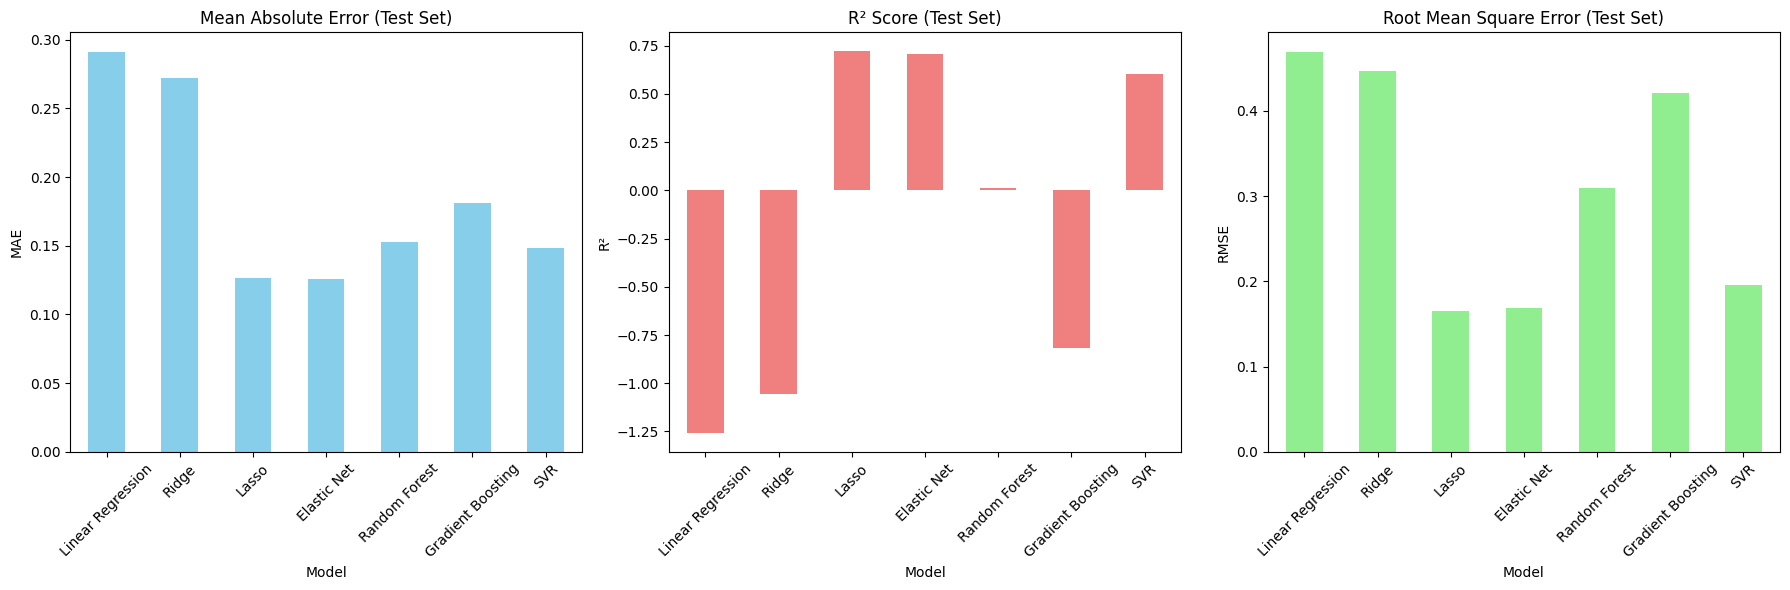


Top 10 Most Important Features (Lasso) - by coefficient magnitude:
            feature  coefficient  abs_coefficient
13          roas_d2     0.380022         0.380022
11          roas_d0     0.027561         0.027561
6            ret_d1     0.011074         0.011074
0        clicks_sum     0.000000         0.000000
3         users_sum    -0.000000         0.000000
4        cost_final    -0.000000         0.000000
2      sessions_sum     0.000000         0.000000
1   impressions_sum    -0.000000         0.000000
7            ret_d2     0.000000         0.000000
5               cpi     0.000000         0.000000


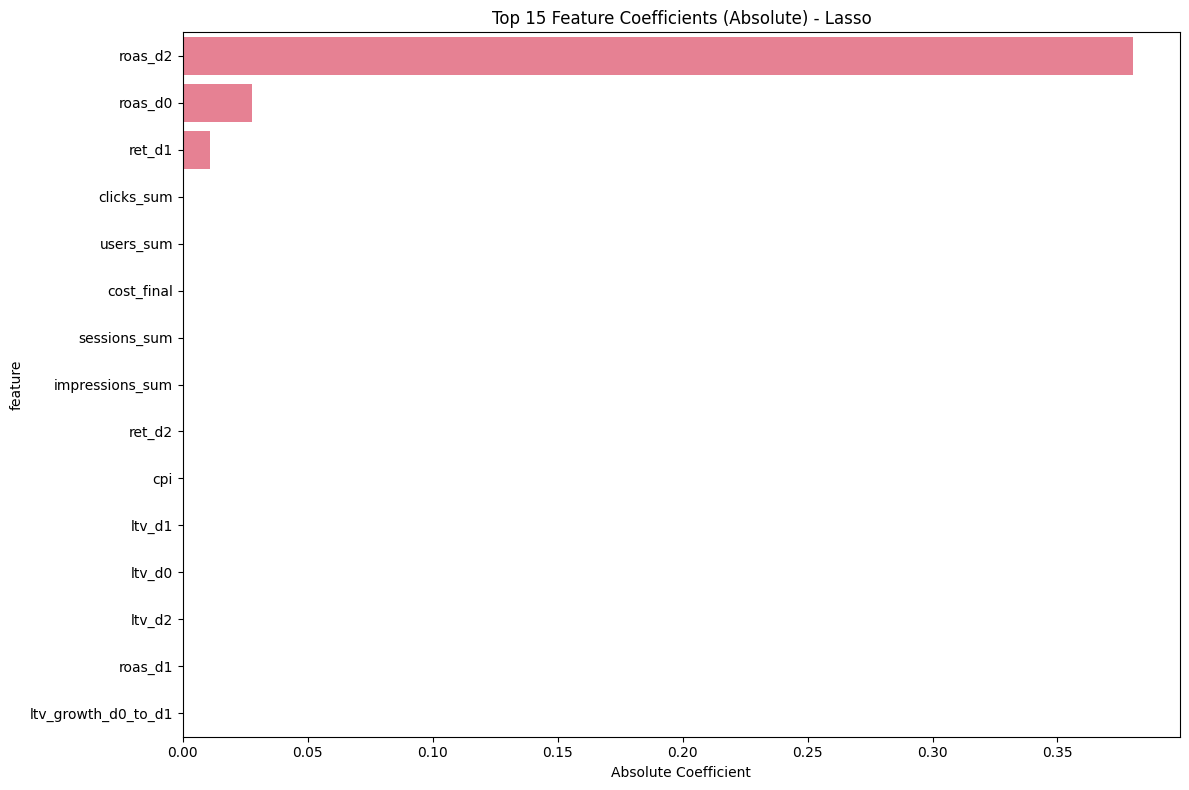

In [ ]:
# Block 7: Model Evaluation and Comparison
def calculate_metrics(y_true, y_pred, model_name, dataset_name):
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))

    return {
        'Model': model_name,
        'Dataset': dataset_name,
        'MAE': mae,
        'R2': r2,
        'RMSE': rmse
    }

# Calculate metrics for all models
all_metrics = []

for model_name in models.keys():
    # Training metrics
    train_metrics = calculate_metrics(y_train, train_predictions[model_name], model_name, 'Train')
    all_metrics.append(train_metrics)

    # Test metrics
    test_metrics = calculate_metrics(y_test, test_predictions[model_name], model_name, 'Test')
    all_metrics.append(test_metrics)

# Create DataFrame for easy comparison
metrics_df = pd.DataFrame(all_metrics)

# Pivot for better display
train_metrics_df = metrics_df[metrics_df['Dataset'] == 'Train'].drop('Dataset', axis=1)
test_metrics_df = metrics_df[metrics_df['Dataset'] == 'Test'].drop('Dataset', axis=1)

print("TRAINING SET PERFORMANCE:")
print("="*70)
print(train_metrics_df.round(4))

print("\nTEST SET PERFORMANCE:")
print("="*70)
print(test_metrics_df.round(4))

# Find best model based on test R²
best_model_idx = test_metrics_df['R2'].idxmax()
best_model_name = test_metrics_df.loc[best_model_idx, 'Model']
print(f"\n🏆 Best Model (Test R²): {best_model_name}")
print(f"Test R²: {test_metrics_df.loc[best_model_idx, 'R2']:.4f}")

# Visualize model comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# MAE comparison
test_metrics_df.set_index('Model')['MAE'].plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Mean Absolute Error (Test Set)')
axes[0].set_ylabel('MAE')
axes[0].tick_params(axis='x', rotation=45)

# R² comparison
test_metrics_df.set_index('Model')['R2'].plot(kind='bar', ax=axes[1], color='lightcoral')
axes[1].set_title('R² Score (Test Set)')
axes[1].set_ylabel('R²')
axes[1].tick_params(axis='x', rotation=45)

# RMSE comparison
test_metrics_df.set_index('Model')['RMSE'].plot(kind='bar', ax=axes[2], color='lightgreen')
axes[2].set_title('Root Mean Square Error (Test Set)')
axes[2].set_ylabel('RMSE')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Feature importance for tree-based models
if best_model_name in ['Random Forest', 'Gradient Boosting']:
    feature_importance = pd.DataFrame({
        'feature': X_train.columns,
        'importance': models[best_model_name].feature_importances_
    }).sort_values('importance', ascending=False)

    print(f"\nTop 10 Most Important Features ({best_model_name}):")
    print(feature_importance.head(10))

    # Plot feature importance
    plt.figure(figsize=(12, 8))
    sns.barplot(data=feature_importance.head(15), x='importance', y='feature')
    plt.title(f'Top 15 Feature Importances - {best_model_name}')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()
elif best_model_name in ['Ridge', 'Lasso', 'Elastic Net']:
    # For linear models, show coefficients
    coef_df = pd.DataFrame({
        'feature': X_train.columns,
        'coefficient': models[best_model_name].coef_
    })
    coef_df['abs_coefficient'] = np.abs(coef_df['coefficient'])
    coef_df = coef_df.sort_values('abs_coefficient', ascending=False)

    print(f"\nTop 10 Most Important Features ({best_model_name}) - by coefficient magnitude:")
    print(coef_df.head(10))

    # Plot coefficients
    plt.figure(figsize=(12, 8))
    sns.barplot(data=coef_df.head(15), x='abs_coefficient', y='feature')
    plt.title(f'Top 15 Feature Coefficients (Absolute) - {best_model_name}')
    plt.xlabel('Absolute Coefficient')
    plt.tight_layout()
    plt.show()

Campaign-wise Test Metrics (Best Model: Lasso):
Campaign: 461_PL_AND_BLD28_1007 (n=2)
  MAE: 0.2095 | R²: 0.1410 | RMSE: 0.2174
Campaign: 461_PL_AND_BLD28_3007_NEW (n=19)
  MAE: 0.1469 | R²: 0.4758 | RMSE: 0.2025
Campaign: 482_PL_IOS_BLDD28_2807 (n=12)
  MAE: 0.1371 | R²: 0.5869 | RMSE: 0.1705
Campaign: 482_PL_IOS_BLDD7_1307 (n=19)
  MAE: 0.0867 | R²: 0.5891 | RMSE: 0.1208
Campaign: 482_PL_IOS_hybrid_US_2407 (n=18)
  MAE: 0.1304 | R²: -0.0887 | RMSE: 0.1502


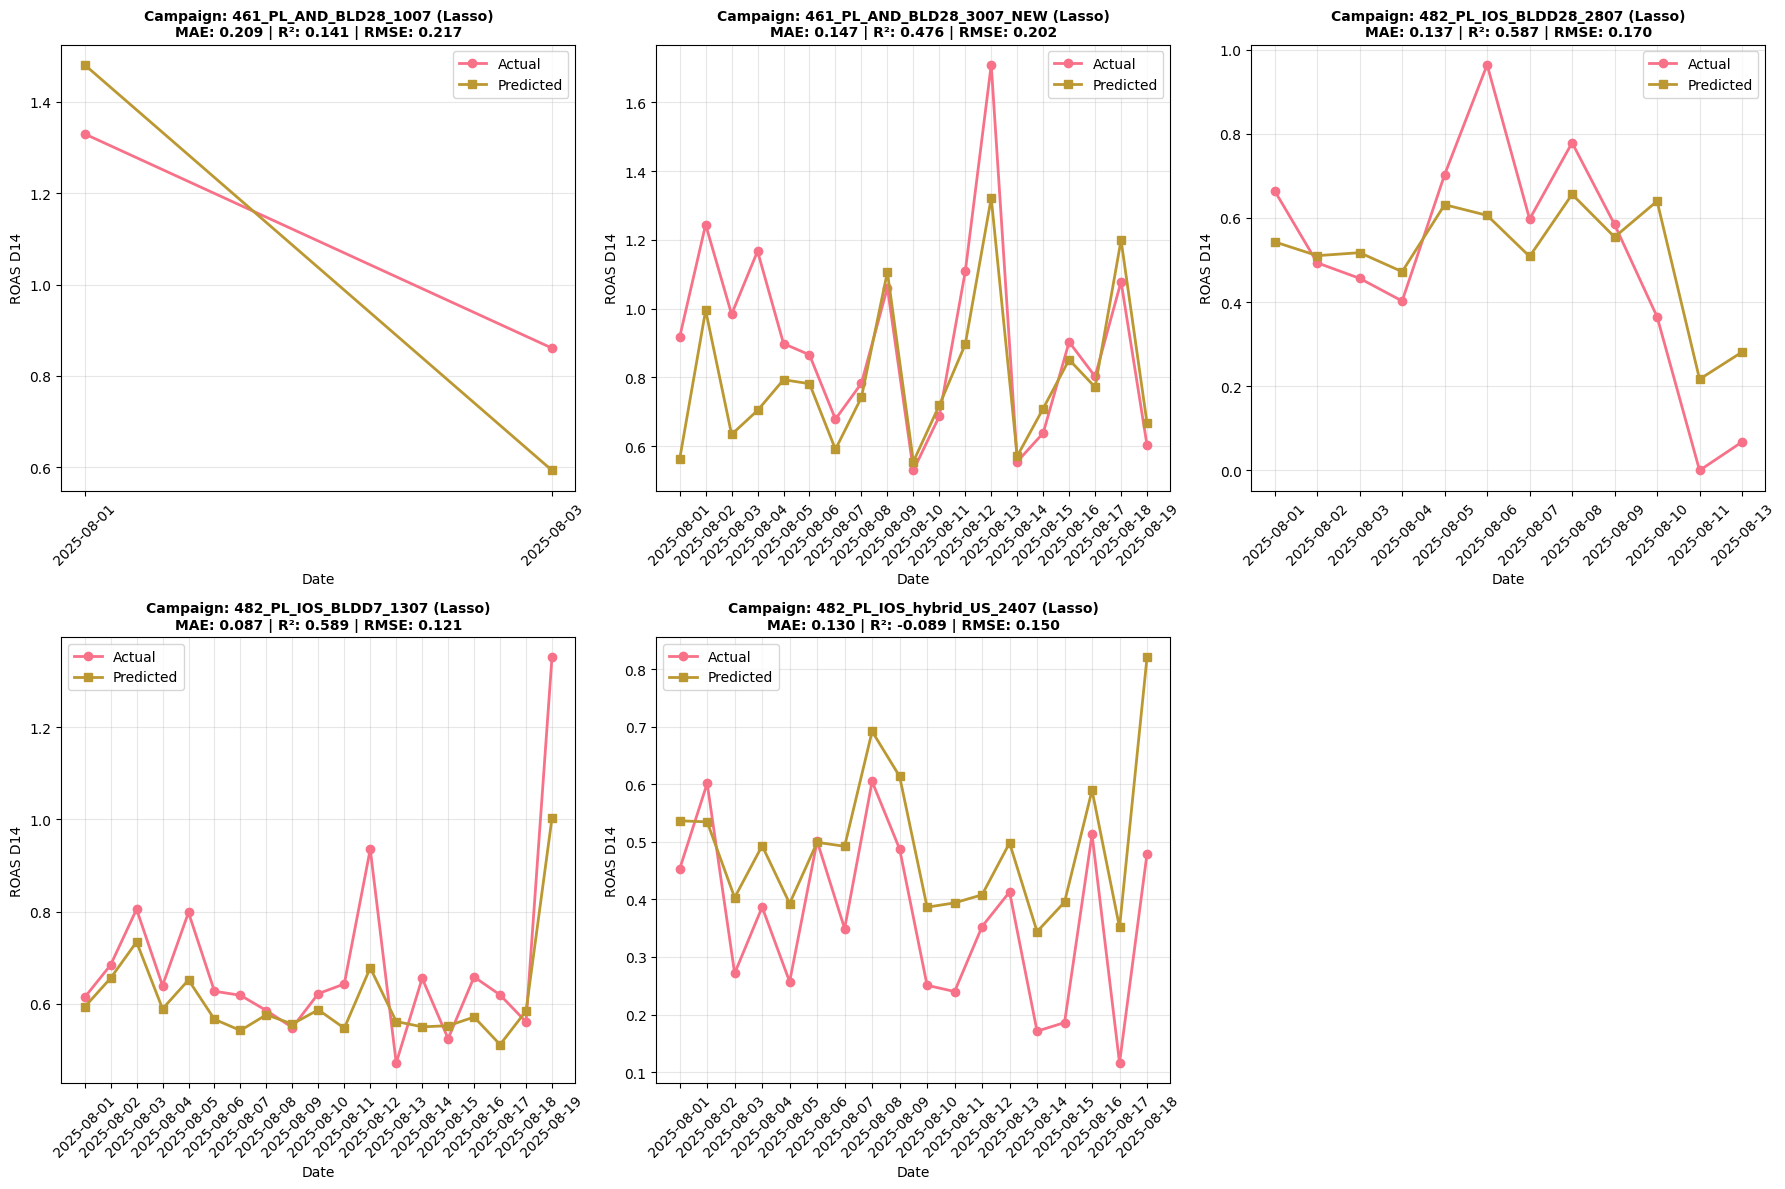


Summary Table - Test Metrics by Campaign (Lasso):
                    campaign     mae      r2    rmse  n_samples
0      461_PL_AND_BLD28_1007  0.2095  0.1410  0.2174          2
1  461_PL_AND_BLD28_3007_NEW  0.1469  0.4758  0.2025         19
2     482_PL_IOS_BLDD28_2807  0.1371  0.5869  0.1705         12
3      482_PL_IOS_BLDD7_1307  0.0867  0.5891  0.1208         19
4  482_PL_IOS_hybrid_US_2407  0.1304 -0.0887  0.1502         18


In [ ]:
# Block 8: Best Model - Campaign-wise Analysis and Visualization
# Use the best model's predictions
best_test_pred = test_predictions[best_model_name]

# Create a dataframe with test results using best model
test_results = test_data[['date', 'c']].copy()
test_results['actual'] = y_test.values
test_results['predicted'] = best_test_pred

# Calculate metrics for each campaign using best model
campaign_metrics = []
for campaign in test_results['c'].unique():
    campaign_mask = test_results['c'] == campaign
    campaign_actual = test_results[campaign_mask]['actual']
    campaign_pred = test_results[campaign_mask]['predicted']

    if len(campaign_actual) > 0:
        mae = mean_absolute_error(campaign_actual, campaign_pred)
        r2 = r2_score(campaign_actual, campaign_pred)
        rmse = np.sqrt(mean_squared_error(campaign_actual, campaign_pred))

        campaign_metrics.append({
            'campaign': campaign,
            'mae': mae,
            'r2': r2,
            'rmse': rmse,
            'n_samples': len(campaign_actual)
        })

# Convert to DataFrame for easy viewing
campaign_metrics_df = pd.DataFrame(campaign_metrics)
print(f"Campaign-wise Test Metrics (Best Model: {best_model_name}):")
print("="*70)
for _, row in campaign_metrics_df.iterrows():
    print(f"Campaign: {row['campaign']} (n={row['n_samples']})")
    print(f"  MAE: {row['mae']:.4f} | R²: {row['r2']:.4f} | RMSE: {row['rmse']:.4f}")
print("="*70)

# Group by date and campaign for daily aggregation
daily_results = test_results.groupby(['date', 'c']).agg({
    'actual': 'mean',
    'predicted': 'mean'
}).reset_index()

# Get unique campaigns
campaigns = daily_results['c'].unique()
n_campaigns = len(campaigns)

# Create subplots
fig, axes = plt.subplots(nrows=(n_campaigns + 2) // 3, ncols=3, figsize=(18, 6 * ((n_campaigns + 2) // 3)))
if n_campaigns == 1:
    axes = [axes]
elif (n_campaigns + 2) // 3 == 1:
    axes = [axes]
else:
    axes = axes.flatten()

for i, campaign in enumerate(campaigns):
    # Filter data for this campaign
    campaign_data = daily_results[daily_results['c'] == campaign].sort_values('date')

    # Get metrics for this campaign
    campaign_metric = campaign_metrics_df[campaign_metrics_df['campaign'] == campaign].iloc[0]

    if len(campaign_data) > 0:
        # Plot actual vs predicted
        axes[i].plot(campaign_data['date'], campaign_data['actual'],
                    marker='o', label='Actual', linewidth=2, markersize=6)
        axes[i].plot(campaign_data['date'], campaign_data['predicted'],
                    marker='s', label='Predicted', linewidth=2, markersize=6)

        # Create title with metrics
        title = f'Campaign: {campaign} ({best_model_name})\n'
        title += f'MAE: {campaign_metric["mae"]:.3f} | R²: {campaign_metric["r2"]:.3f} | RMSE: {campaign_metric["rmse"]:.3f}'
        axes[i].set_title(title, fontsize=10, fontweight='bold')

        axes[i].set_xlabel('Date')
        axes[i].set_ylabel('ROAS D14')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)
        axes[i].tick_params(axis='x', rotation=45)

# Remove empty subplots
for j in range(n_campaigns, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Display campaign metrics table
print(f"\nSummary Table - Test Metrics by Campaign ({best_model_name}):")
print(campaign_metrics_df.round(4))

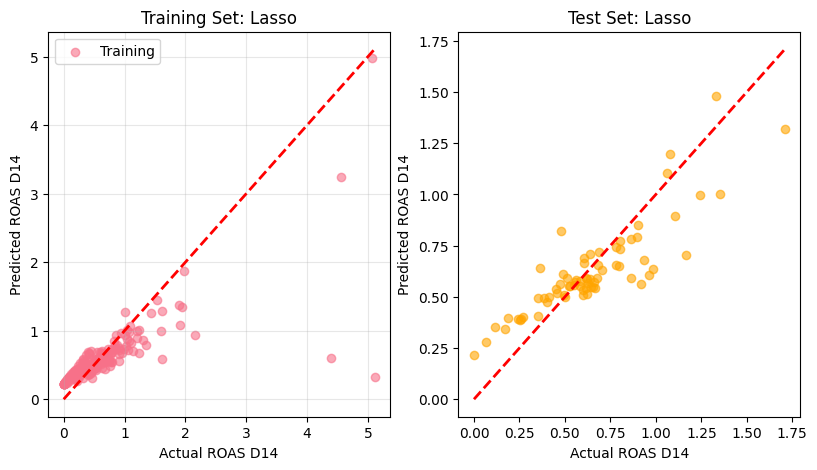

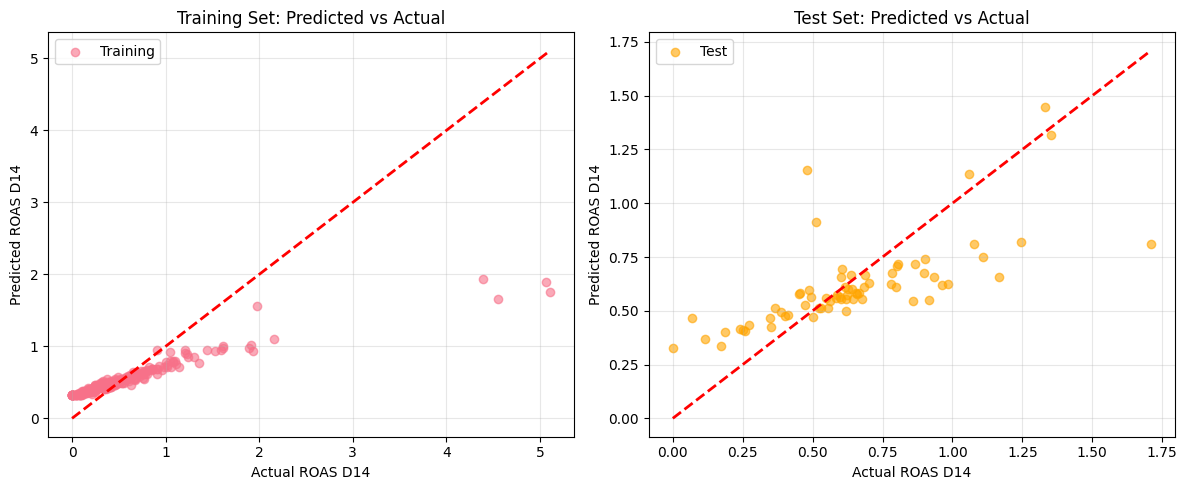

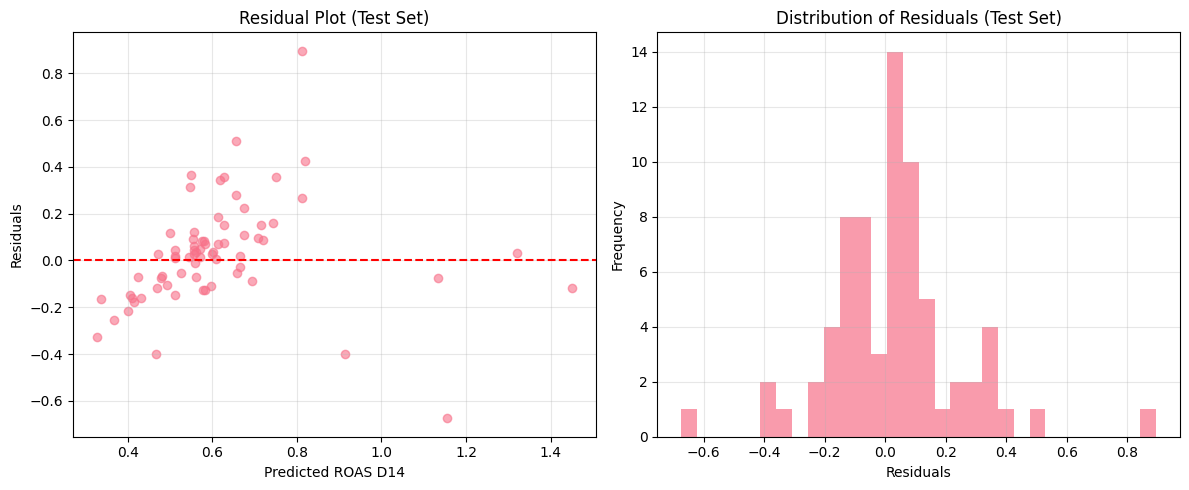

FINAL MODEL PERFORMANCE SUMMARY
Training Set:
  - MAE: 0.2270
  - R²: 0.5588
  - RMSE: 0.4430

Test Set:
  - MAE: 0.1571
  - R²: 0.4809
  - RMSE: 0.2248

Model successfully trained on 255 samples
Tested on 70 samples across 5 campaigns


In [ ]:
# Block 9: Additional Analysis and Model Insights
# Overall prediction vs actual scatter plot for best model
best_train_pred = train_predictions[best_model_name]
best_test_pred = test_predictions[best_model_name]

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_train, best_train_pred, alpha=0.6, label='Training')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual ROAS D14')
plt.ylabel('Predicted ROAS D14')
plt.title(f'Training Set: {best_model_name}')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.scatter(y_test, best_test_pred, alpha=0.6, label='Test', color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual ROAS D14')
plt.ylabel('Predicted ROAS D14')
plt.title(f'Test Set: {best_model_name}')
# Block 9: Additional analysis
# Overall prediction vs actual scatter plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, train_pred, alpha=0.6, label='Training')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual ROAS D14')
plt.ylabel('Predicted ROAS D14')
plt.title('Training Set: Predicted vs Actual')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(y_test, test_pred, alpha=0.6, label='Test', color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual ROAS D14')
plt.ylabel('Predicted ROAS D14')
plt.title('Test Set: Predicted vs Actual')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Residual analysis for test set
residuals = y_test - test_pred
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(test_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted ROAS D14')
plt.ylabel('Residuals')
plt.title('Residual Plot (Test Set)')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(residuals, bins=30, alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals (Test Set)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary statistics
print("="*60)
print("FINAL MODEL PERFORMANCE SUMMARY")
print("="*60)
print(f"Training Set:")
print(f"  - MAE: {train_mae:.4f}")
print(f"  - R²: {train_r2:.4f}")
print(f"  - RMSE: {train_rmse:.4f}")
print(f"\nTest Set:")
print(f"  - MAE: {test_mae:.4f}")
print(f"  - R²: {test_r2:.4f}")
print(f"  - RMSE: {test_rmse:.4f}")
print(f"\nModel successfully trained on {len(X_train)} samples")
print(f"Tested on {len(X_test)} samples across {n_campaigns} campaigns")
print("="*60)

## Compare all experiment by Lasso model

In [ ]:
# Block 1: Import necessary libraries for Lasso regression experiments
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


In [ ]:
# Block 3: Define train-test split and scaling functions
def create_train_test_split(df):
    """Create train-test split based on date ranges"""
    train_start = '2025-05-01'
    train_end = '2025-07-31'
    test_start = '2025-08-01'
    test_end = '2025-08-19'

    train_mask = (df['date'] >= train_start) & (df['date'] <= train_end)
    test_mask = (df['date'] >= test_start) & (df['date'] <= test_end)

    return df[train_mask].copy(), df[test_mask].copy()

def prepare_features(train_data, test_data, feature_columns, target='roas_d14'):
    """Prepare features and target variables"""
    # Remove rows with missing target values
    train_clean = train_data.dropna(subset=[target])
    test_clean = test_data.dropna(subset=[target])

    X_train = train_clean[feature_columns].fillna(0)
    y_train = train_clean[target]
    X_test = test_clean[feature_columns].fillna(0)
    y_test = test_clean[target]

    # Store campaign info for later analysis
    train_campaigns = train_clean['c']
    test_campaigns = test_clean['c']
    test_dates = test_clean['date']

    return X_train, X_test, y_train, y_test, test_campaigns, test_dates

def train_lasso_with_scaling(X_train, X_test, y_train, y_test, scaler_type='standard', alpha=0.1):
    """Train Lasso with different scaling techniques"""
    results = {}

    # Choose scaler
    if scaler_type == 'standard':
        scaler = StandardScaler()
    elif scaler_type == 'minmax':
        scaler = MinMaxScaler()
    elif scaler_type == 'robust':
        scaler = RobustScaler()
    else:  # no scaling
        scaler = None

    # Apply scaling
    if scaler is not None:
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    else:
        X_train_scaled = X_train.values
        X_test_scaled = X_test.values

    # Train Lasso
    lasso = Lasso(alpha=alpha, random_state=42, max_iter=2000)
    lasso.fit(X_train_scaled, y_train)

    # Make predictions
    train_pred = lasso.predict(X_train_scaled)
    test_pred = lasso.predict(X_test_scaled)

    # Calculate metrics
    train_mae = mean_absolute_error(y_train, train_pred)
    train_r2 = r2_score(y_train, train_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))

    test_mae = mean_absolute_error(y_test, test_pred)
    test_r2 = r2_score(y_test, test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

    results = {
        'model': lasso,
        'scaler': scaler,
        'train_pred': train_pred,
        'test_pred': test_pred,
        'train_mae': train_mae,
        'train_r2': train_r2,
        'train_rmse': train_rmse,
        'test_mae': test_mae,
        'test_r2': test_r2,
        'test_rmse': test_rmse,
        'feature_names': X_train.columns.tolist()
    }

    return results

print("Helper functions defined!")

Helper functions defined!


In [ ]:
# Block 4: Feature Engineering Functions
def add_roas_features(df):
    """Add ROAS-related feature engineering"""
    df_eng = df.copy()

    # ROAS momentum and acceleration
    df_eng['roas_momentum_d0_to_d1'] = df_eng['roas_d1'] - df_eng['roas_d0']
    df_eng['roas_momentum_d1_to_d2'] = df_eng['roas_d2'] - df_eng['roas_d1']
    df_eng['roas_acceleration'] = df_eng['roas_momentum_d1_to_d2'] - df_eng['roas_momentum_d0_to_d1']

    # ROAS growth rates
    df_eng['roas_growth_d0_to_d1'] = (df_eng['roas_d1'] - df_eng['roas_d0']) / (df_eng['roas_d0'] + 1e-8)
    df_eng['roas_growth_d1_to_d2'] = (df_eng['roas_d2'] - df_eng['roas_d1']) / (df_eng['roas_d1'] + 1e-8)

    # ROAS stability (variance)
    df_eng['roas_stability'] = np.sqrt(((df_eng['roas_d0'] - df_eng[['roas_d0', 'roas_d1', 'roas_d2']].mean(axis=1))**2 +
                                       (df_eng['roas_d1'] - df_eng[['roas_d0', 'roas_d1', 'roas_d2']].mean(axis=1))**2 +
                                       (df_eng['roas_d2'] - df_eng[['roas_d0', 'roas_d1', 'roas_d2']].mean(axis=1))**2) / 3)

    # ROAS trend
    df_eng['roas_trend'] = (df_eng['roas_d2'] + df_eng['roas_d1']) / 2 - df_eng['roas_d0']

    return df_eng

def add_retention_features(df):
    """Add retention-related feature engineering"""
    df_eng = df.copy()

    # Retention decay
    df_eng['retention_decay'] = df_eng['ret_d1'] - df_eng['ret_d2']

    # Retention stability
    df_eng['retention_avg'] = (df_eng['ret_d1'] + df_eng['ret_d2']) / 2
    df_eng['retention_stability'] = np.abs(df_eng['ret_d1'] - df_eng['ret_d2'])

    # Retention efficiency (how much revenue per retained user)
    df_eng['retention_efficiency_d1'] = df_eng['roas_d1'] / (df_eng['ret_d1'] + 1e-8)
    df_eng['retention_efficiency_d2'] = df_eng['roas_d2'] / (df_eng['ret_d2'] + 1e-8)

    return df_eng

def add_ltv_features(df):
    """Add LTV-related feature engineering"""
    df_eng = df.copy()

    # LTV growth rates
    df_eng['ltv_growth_d0_to_d1'] = (df_eng['ltv_d1'] - df_eng['ltv_d0']) / (df_eng['ltv_d0'] + 1e-8)
    df_eng['ltv_growth_d1_to_d2'] = (df_eng['ltv_d2'] - df_eng['ltv_d1']) / (df_eng['ltv_d1'] + 1e-8)

    # LTV acceleration
    df_eng['ltv_acceleration'] = df_eng['ltv_growth_d1_to_d2'] - df_eng['ltv_growth_d0_to_d1']

    # LTV efficiency relative to cost
    df_eng['ltv_roi_d0'] = df_eng['ltv_d0'] / (df_eng['cpi'] + 1e-8)
    df_eng['ltv_roi_d1'] = df_eng['ltv_d1'] / (df_eng['cpi'] + 1e-8)
    df_eng['ltv_roi_d2'] = df_eng['ltv_d2'] / (df_eng['cpi'] + 1e-8)

    # LTV momentum
    df_eng['ltv_momentum'] = df_eng['ltv_d2'] - df_eng['ltv_d0']

    return df_eng

def add_all_features(df):
    """Add comprehensive feature engineering"""
    df_eng = df.copy()

    # Ensure date column is datetime
    if 'date' in df_eng.columns and not pd.api.types.is_datetime64_any_dtype(df_eng['date']):
        df_eng['date'] = pd.to_datetime(df_eng['date'])

    # Date features (only if date column exists)
    if 'date' in df_eng.columns:
        df_eng['day_of_week'] = df_eng['date'].dt.dayofweek
        df_eng['day_of_month'] = df_eng['date'].dt.day
        df_eng['month'] = df_eng['date'].dt.month
        df_eng['is_weekend'] = (df_eng['day_of_week'] >= 5).astype(int)

    # Basic ratios (only if columns exist)
    if all(col in df_eng.columns for col in ['clicks_sum', 'impressions_sum']):
        df_eng['ctr'] = df_eng['clicks_sum'] / (df_eng['impressions_sum'] + 1e-8)

    if all(col in df_eng.columns for col in ['sessions_sum', 'clicks_sum']):
        df_eng['session_rate'] = df_eng['sessions_sum'] / (df_eng['clicks_sum'] + 1e-8)

    if all(col in df_eng.columns for col in ['users_sum', 'sessions_sum']):
        df_eng['user_rate'] = df_eng['users_sum'] / (df_eng['sessions_sum'] + 1e-8)

    # Cost efficiency (only if columns exist)
    if all(col in df_eng.columns for col in ['cost_final', 'clicks_sum']):
        df_eng['cpc'] = df_eng['cost_final'] / (df_eng['clicks_sum'] + 1e-8)

    if all(col in df_eng.columns for col in ['cost_final', 'sessions_sum']):
        df_eng['cps'] = df_eng['cost_final'] / (df_eng['sessions_sum'] + 1e-8)

    if all(col in df_eng.columns for col in ['cost_final', 'users_sum']):
        df_eng['cpu'] = df_eng['cost_final'] / (df_eng['users_sum'] + 1e-8)

    # Add ROAS, retention, and LTV features
    df_eng = add_roas_features(df_eng)
    df_eng = add_retention_features(df_eng)
    df_eng = add_ltv_features(df_eng)

    # Interaction features (only if columns exist)
    if all(col in df_eng.columns for col in ['ltv_d2', 'ret_d2']):
        df_eng['ltv_ret_interaction'] = df_eng['ltv_d2'] * df_eng['ret_d2']

    if all(col in df_eng.columns for col in ['roas_d2', 'ret_d2']):
        df_eng['roas_ret_interaction'] = df_eng['roas_d2'] * df_eng['ret_d2']

    if all(col in df_eng.columns for col in ['users_sum', 'cost_final']):
        df_eng['cost_efficiency'] = df_eng['users_sum'] / (df_eng['cost_final'] + 1e-8)

    # Platform encoding (only if column exists)
    if 'platform' in df_eng.columns:
        df_eng = pd.get_dummies(df_eng, columns=['platform'], prefix='platform')

    return df_eng

print("Feature engineering functions defined!")

Feature engineering functions defined!


COMPREHENSIVE RESULTS COMPARISON
Sorted by Test R² (Higher is Better)
                 Experiment    Scaler  Train_R2  Train_MAE  Train_RMSE  \
7             Exp2_Selected    robust    0.5646     0.1911      0.4401   
3             Exp1_Original    robust    0.5646     0.1911      0.4401   
15  Exp4_Selected_Retention    robust    0.5646     0.1911      0.4401   
19   Exp5_Selected_Ret_ROAS    robust    0.5827     0.1931      0.4308   
23          Exp6_Metrics_FE    robust    0.5851     0.1920      0.4296   
11       Exp3_Selected_ROAS    robust    0.5770     0.1947      0.4338   
1             Exp1_Original  standard    0.5533     0.1997      0.4458   
13  Exp4_Selected_Retention  standard    0.5533     0.1997      0.4458   
21          Exp6_Metrics_FE  standard    0.5533     0.1997      0.4458   
17   Exp5_Selected_Ret_ROAS  standard    0.5533     0.1997      0.4458   
5             Exp2_Selected  standard    0.5497     0.2032      0.4476   
9        Exp3_Selected_ROAS  standard    0

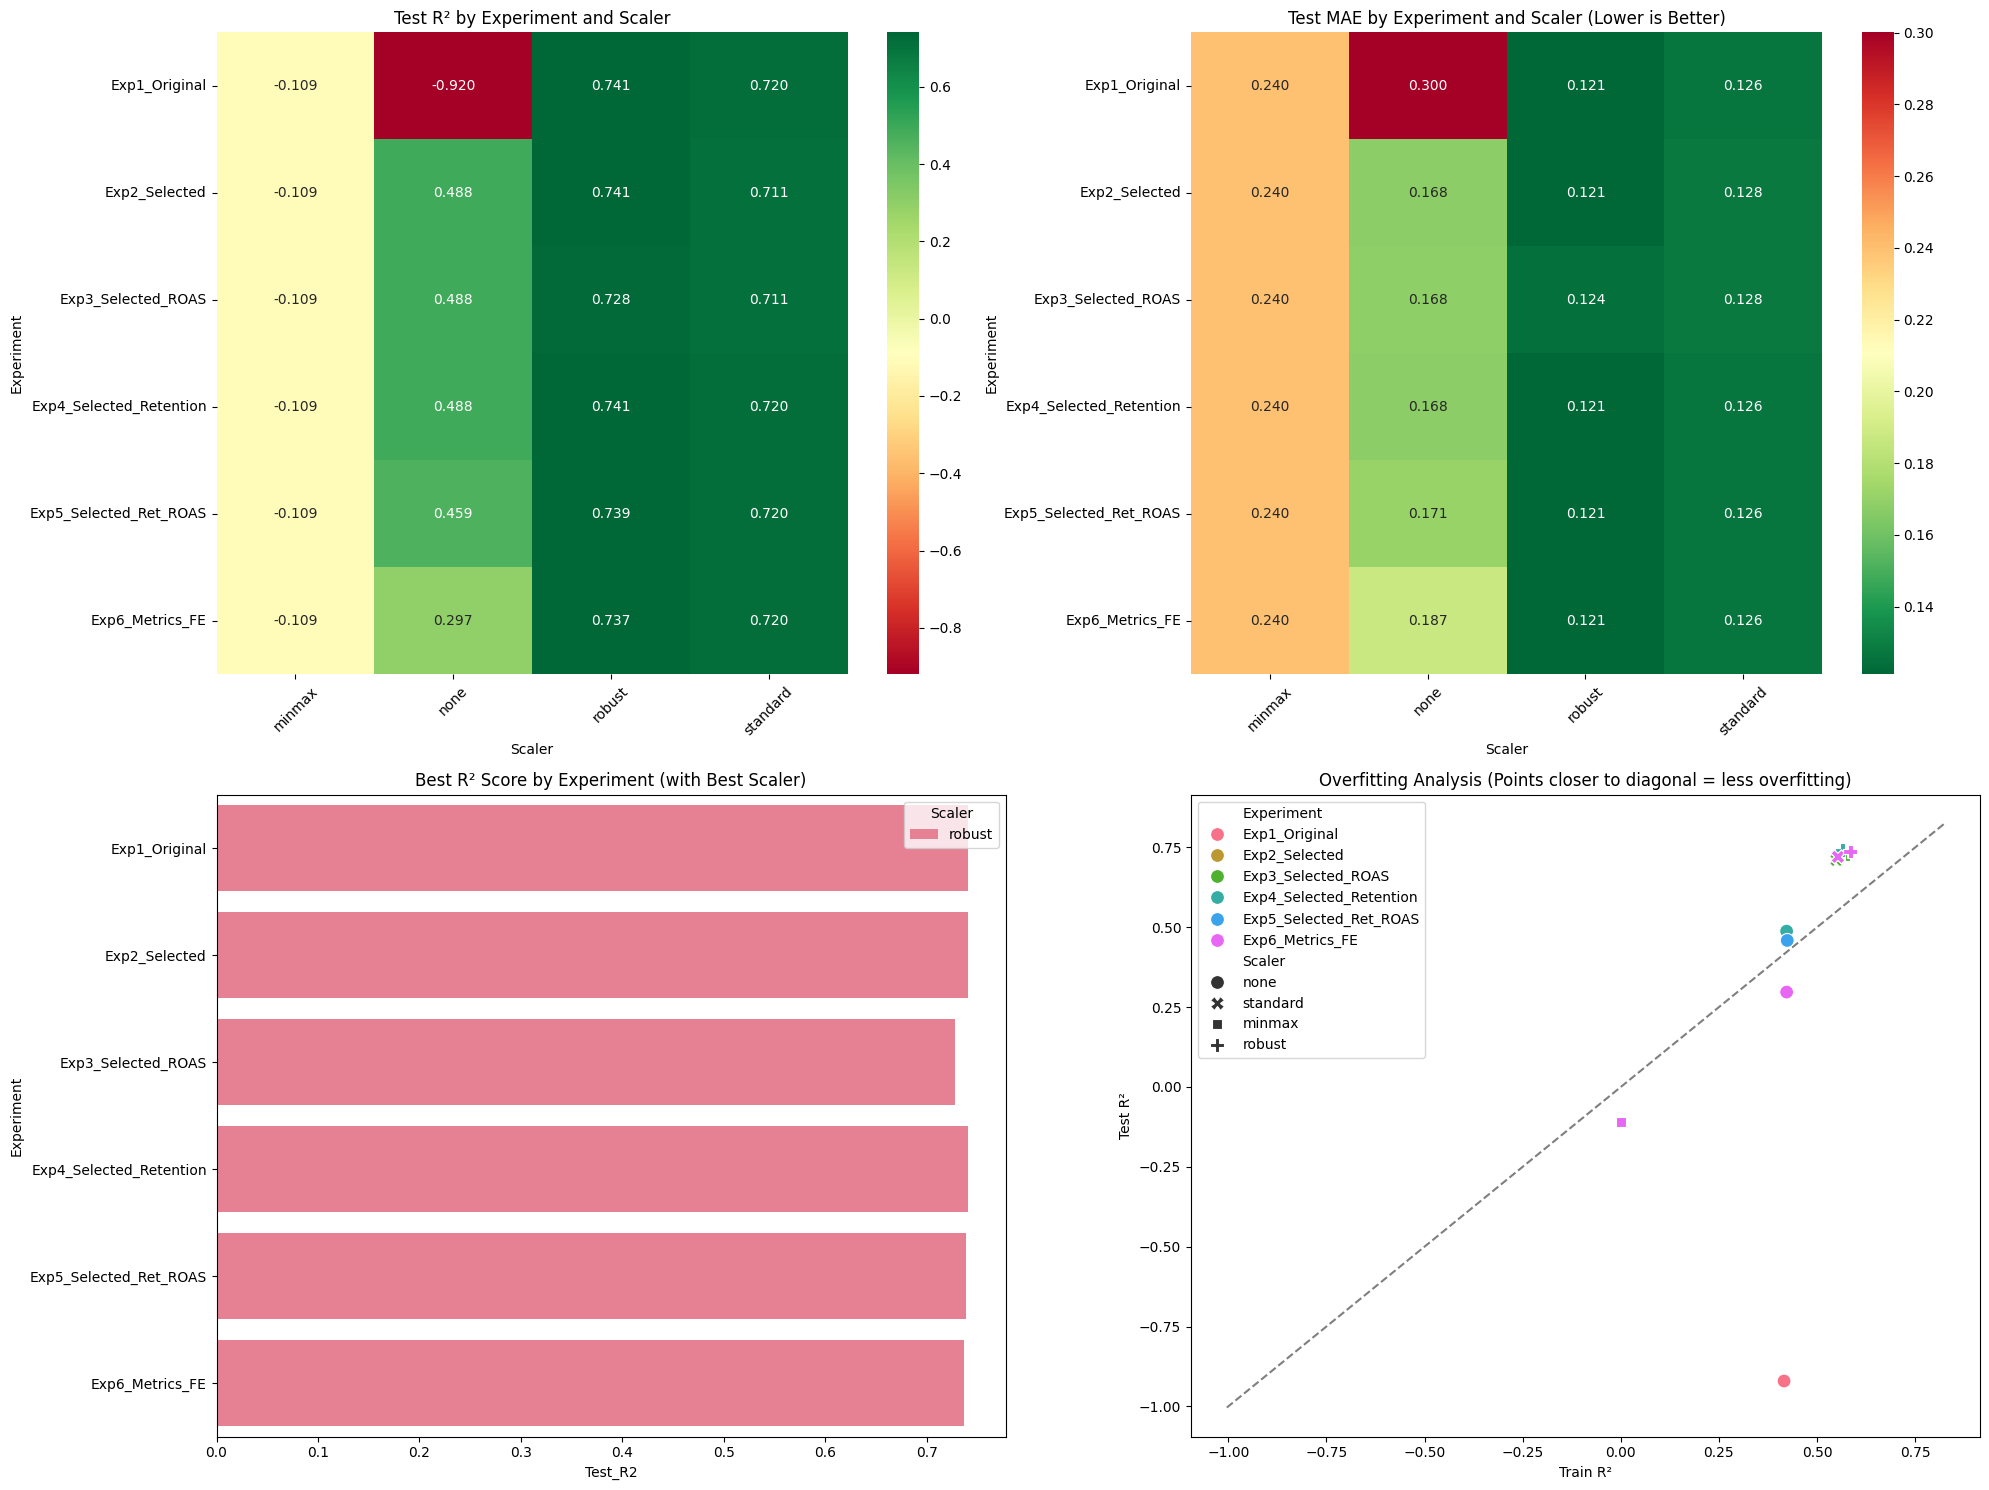


SUMMARY BY EXPERIMENT TYPE
                        Test_R2                 Test_MAE                  \
                            max    mean     std      min    mean     std   
Experiment                                                                 
Exp1_Original            0.7408  0.1080  0.7917   0.1214  0.1969  0.0878   
Exp2_Selected            0.7408  0.4577  0.3941   0.1214  0.1642  0.0543   
Exp3_Selected_ROAS       0.7280  0.4545  0.3911   0.1239  0.1650  0.0537   
Exp4_Selected_Retention  0.7408  0.4601  0.3962   0.1214  0.1638  0.0546   
Exp5_Selected_Ret_ROAS   0.7386  0.4523  0.3952   0.1211  0.1646  0.0548   
Exp6_Metrics_FE          0.7372  0.4115  0.4022   0.1214  0.1686  0.0560   

                        Overfit_Diff                  
                                 min    mean     max  
Experiment                                            
Exp1_Original                -0.1762  0.2755  1.3366  
Exp2_Selected                -0.1762 -0.0735  0.1087  
Exp3_Selecte

In [ ]:
# Block 7: Results Comparison and Visualization

# Create comprehensive results DataFrame
comparison_results = []

for exp_name, exp_results in all_results.items():
    for scaler_type, result in exp_results.items():
        comparison_results.append({
            'Experiment': exp_name,
            'Scaler': scaler_type,
            'Train_R2': result['train_r2'],
            'Train_MAE': result['train_mae'],
            'Train_RMSE': result['train_rmse'],
            'Test_R2': result['test_r2'],
            'Test_MAE': result['test_mae'],
            'Test_RMSE': result['test_rmse'],
            'Overfit_Diff': result['train_r2'] - result['test_r2']
        })

results_df = pd.DataFrame(comparison_results)

# Display results sorted by Test R²
print("COMPREHENSIVE RESULTS COMPARISON")
print("="*80)
print("Sorted by Test R² (Higher is Better)")
print("="*80)

display_df = results_df.sort_values('Test_R2', ascending=False)
print(display_df.round(4))

# Find best overall result
best_idx = results_df['Test_R2'].idxmax()
best_result = results_df.loc[best_idx]

print(f"\n🏆 BEST OVERALL RESULT:")
print(f"Experiment: {best_result['Experiment']}")
print(f"Scaler: {best_result['Scaler']}")
print(f"Test R²: {best_result['Test_R2']:.4f}")
print(f"Test MAE: {best_result['Test_MAE']:.4f}")
print(f"Test RMSE: {best_result['Test_RMSE']:.4f}")
print(f"Overfitting (Train R² - Test R²): {best_result['Overfit_Diff']:.4f}")

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# 1. Test R² by Experiment and Scaler
pivot_r2 = results_df.pivot(index='Experiment', columns='Scaler', values='Test_R2')
sns.heatmap(pivot_r2, annot=True, fmt='.3f', cmap='RdYlGn', ax=axes[0,0])
axes[0,0].set_title('Test R² by Experiment and Scaler')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Test MAE by Experiment and Scaler
pivot_mae = results_df.pivot(index='Experiment', columns='Scaler', values='Test_MAE')
sns.heatmap(pivot_mae, annot=True, fmt='.3f', cmap='RdYlGn_r', ax=axes[0,1])
axes[0,1].set_title('Test MAE by Experiment and Scaler (Lower is Better)')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Best scaler for each experiment
best_by_exp = results_df.loc[results_df.groupby('Experiment')['Test_R2'].idxmax()]
sns.barplot(data=best_by_exp, x='Test_R2', y='Experiment', hue='Scaler', ax=axes[1,0])
axes[1,0].set_title('Best R² Score by Experiment (with Best Scaler)')

# 4. Overfitting analysis
sns.scatterplot(data=results_df, x='Train_R2', y='Test_R2',
               hue='Experiment', style='Scaler', s=100, ax=axes[1,1])
# Add diagonal line for perfect fit
lims = [
    np.min([axes[1,1].get_xlim(), axes[1,1].get_ylim()]),
    np.max([axes[1,1].get_xlim(), axes[1,1].get_ylim()]),
]
axes[1,1].plot(lims, lims, 'k--', alpha=0.5, zorder=0)
axes[1,1].set_xlabel('Train R²')
axes[1,1].set_ylabel('Test R²')
axes[1,1].set_title('Overfitting Analysis (Points closer to diagonal = less overfitting)')

plt.tight_layout()
plt.show()

# Summary by experiment type
print("\n" + "="*60)
print("SUMMARY BY EXPERIMENT TYPE")
print("="*60)
exp_summary = results_df.groupby('Experiment').agg({
    'Test_R2': ['max', 'mean', 'std'],
    'Test_MAE': ['min', 'mean', 'std'],
    'Overfit_Diff': ['min', 'mean', 'max']
}).round(4)

print(exp_summary)

# Best scaler analysis
print("\n" + "="*60)
print("SCALER PERFORMANCE ANALYSIS")
print("="*60)
scaler_summary = results_df.groupby('Scaler').agg({
    'Test_R2': ['max', 'mean', 'std'],
    'Test_MAE': ['min', 'mean', 'std'],
    'Overfit_Diff': ['min', 'mean', 'max']
}).round(4)

print(scaler_summary)

CAMPAIGN ANALYSIS FOR BEST MODEL
Experiment: Exp2_Selected
Scaler: robust
Campaign-wise Performance (Best Model):
----------------------------------------------------------------------
Campaign: 482_PL_IOS_BLDD7_1307 (n=19)
  R²: 0.6300 | MAE: 0.0853 | RMSE: 0.1146
  Avg Actual: 0.682 | Avg Predicted: 0.609
Campaign: 482_PL_IOS_BLDD28_2807 (n=12)
  R²: 0.5952 | MAE: 0.1312 | RMSE: 0.1687
  Avg Actual: 0.506 | Avg Predicted: 0.501
Campaign: 461_PL_AND_BLD28_3007_NEW (n=19)
  R²: 0.5146 | MAE: 0.1424 | RMSE: 0.1948
  Avg Actual: 0.906 | Avg Predicted: 0.817
Campaign: 482_PL_IOS_hybrid_US_2407 (n=18)
  R²: 0.0783 | MAE: 0.1188 | RMSE: 0.1382
  Avg Actual: 0.369 | Avg Predicted: 0.477
Campaign: 461_PL_AND_BLD28_1007 (n=2)
  R²: -0.0016 | MAE: 0.2305 | RMSE: 0.2348
  Avg Actual: 1.095 | Avg Predicted: 1.051


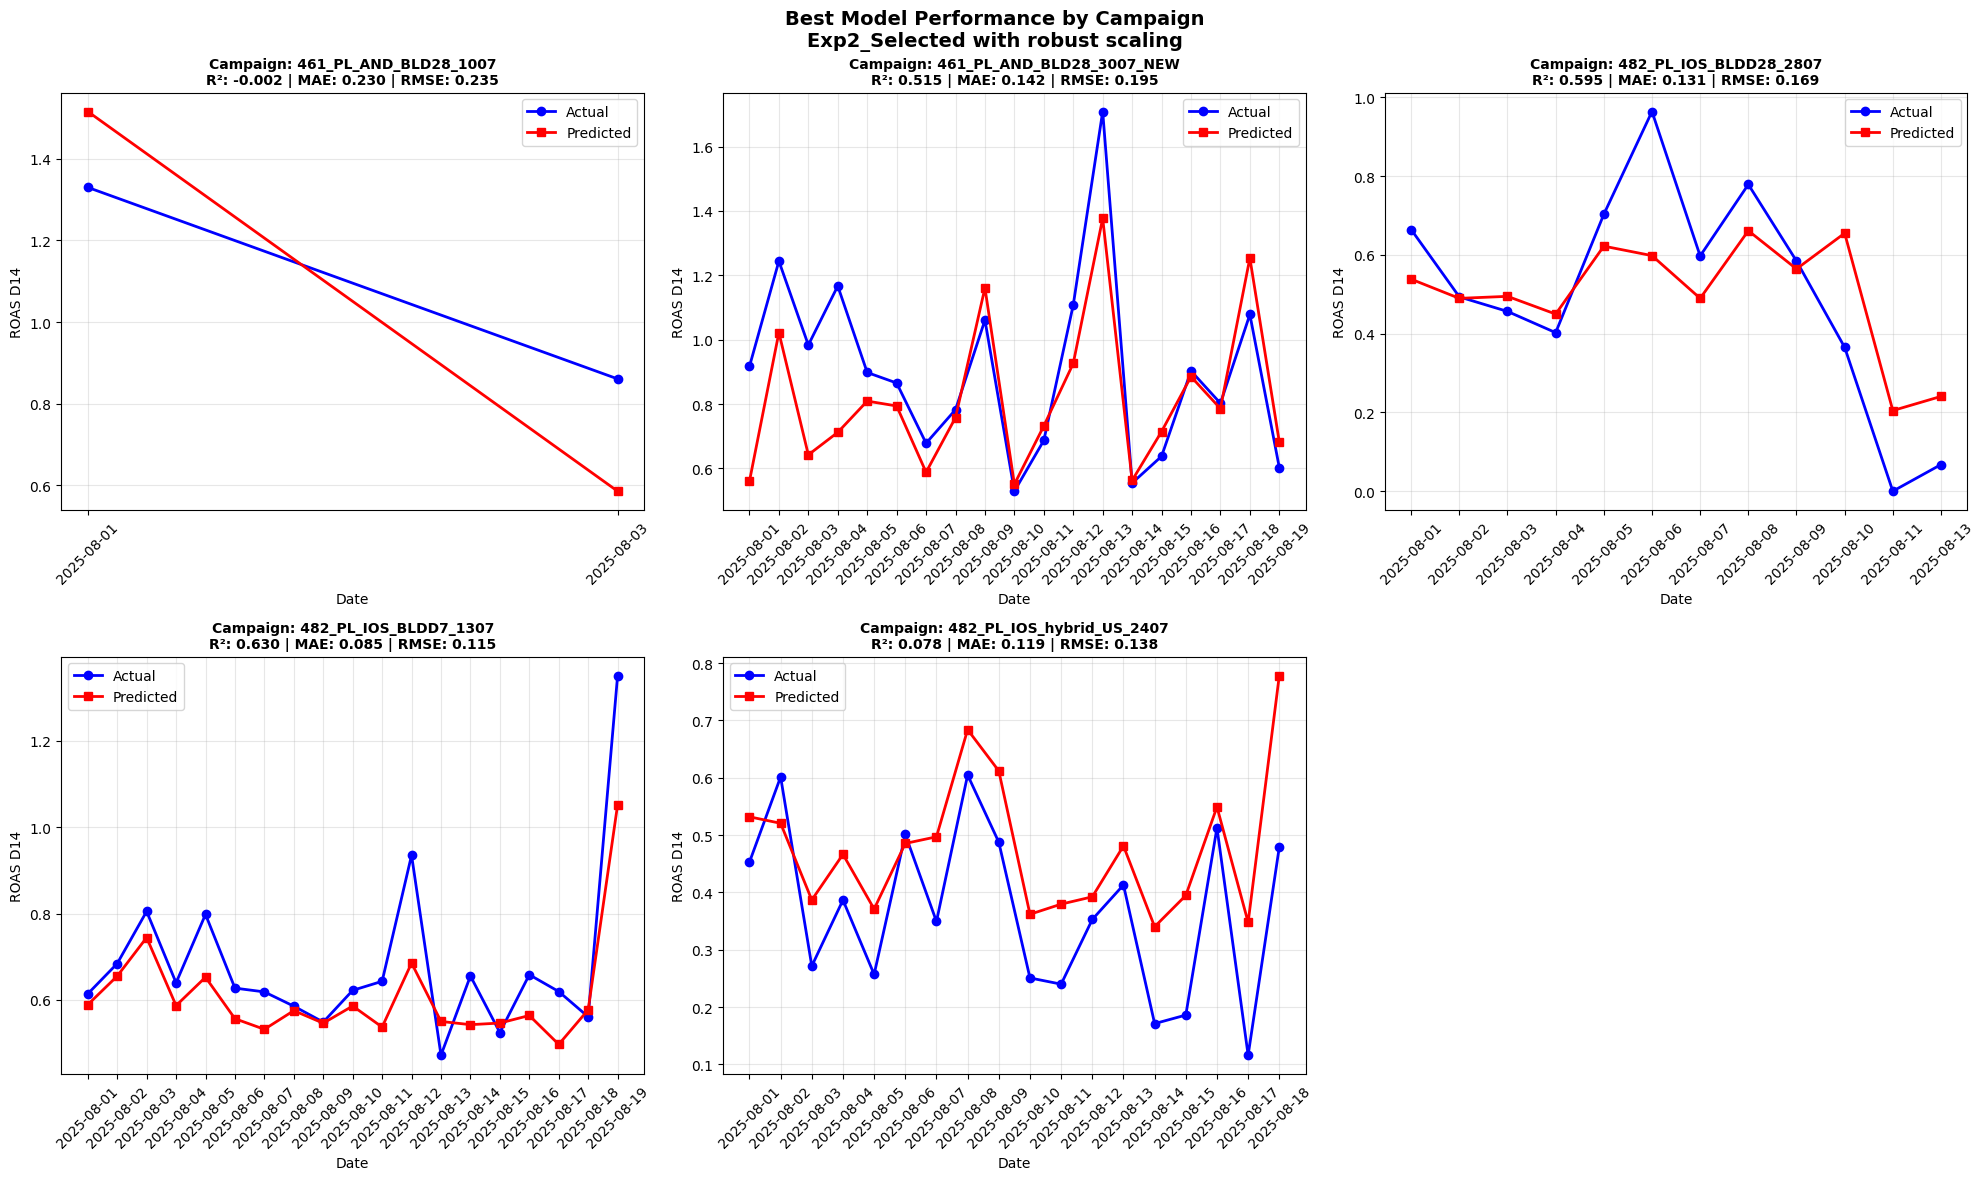


Top Feature Importances (Lasso Coefficients) - Best Model:
Features with non-zero coefficients: 2
----------------------------------------------------------------------
   feature  coefficient  abs_coefficient
5  roas_d2     0.221103         0.221103
3  roas_d0     0.011600         0.011600


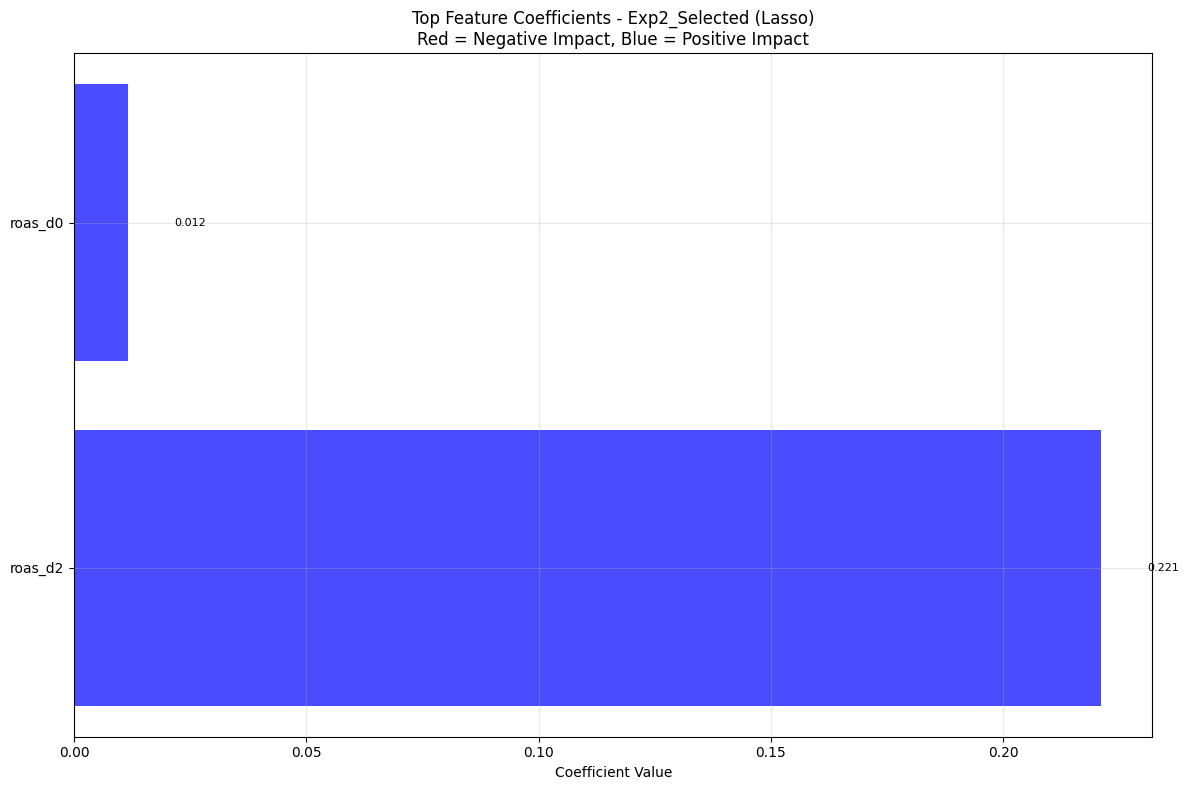


Summary Table - Campaign Metrics (Best Model):
                    campaign     mae      r2    rmse  n_samples  mean_actual  \
3      482_PL_IOS_BLDD7_1307  0.0853  0.6300  0.1146         19       0.6823   
2     482_PL_IOS_BLDD28_2807  0.1312  0.5952  0.1687         12       0.5064   
1  461_PL_AND_BLD28_3007_NEW  0.1424  0.5146  0.1948         19       0.9056   
4  482_PL_IOS_hybrid_US_2407  0.1188  0.0783  0.1382         18       0.3686   
0      461_PL_AND_BLD28_1007  0.2305 -0.0016  0.2348          2       1.0953   

   mean_predicted  
3          0.6093  
2          0.5007  
1          0.8166  
4          0.4767  
0          1.0506  


In [ ]:
# Block 8: Campaign Analysis for Best Model

# Get the best model configuration
best_exp_name = best_result['Experiment']
best_scaler_name = best_result['Scaler']
best_model_result = all_results[best_exp_name][best_scaler_name]

print(f"CAMPAIGN ANALYSIS FOR BEST MODEL")
print(f"Experiment: {best_exp_name}")
print(f"Scaler: {best_scaler_name}")
print("="*70)

# Recreate the best model predictions with campaign information
# We need to determine which experiment this was and recreate the data preparation

# Get the feature set based on experiment name
if best_exp_name == 'Exp1_Original':
    feature_columns = ['clicks_sum', 'impressions_sum', 'sessions_sum', 'users_sum',
                      'cost_final', 'cpi', 'ret_d1', 'ret_d2', 'ltv_d0', 'ltv_d1',
                      'ltv_d2', 'roas_d0', 'roas_d1', 'roas_d2']
    train_df_final = train_data
    test_df_final = test_data

elif best_exp_name == 'Exp2_Selected':
    feature_columns = ['cpi', 'users_sum', 'cost_final', 'roas_d0', 'roas_d1', 'roas_d2']
    train_df_final = train_data
    test_df_final = test_data

elif best_exp_name == 'Exp3_Selected_ROAS':
    train_df_final = add_roas_features(train_data)
    test_df_final = add_roas_features(test_data)
    base_features = ['cpi', 'users_sum', 'cost_final', 'roas_d0', 'roas_d1', 'roas_d2']
    roas_features = [col for col in train_df_final.columns if 'roas_momentum' in col or 'roas_growth' in col or 'roas_stability' in col or 'roas_trend' in col]
    feature_columns = base_features + roas_features

elif best_exp_name == 'Exp4_Selected_Retention':
    feature_columns = ['cpi', 'users_sum', 'cost_final', 'ret_d1', 'ret_d2', 'roas_d0', 'roas_d1', 'roas_d2']
    train_df_final = train_data
    test_df_final = test_data

elif best_exp_name == 'Exp5_Selected_Ret_ROAS':
    train_df_final = add_roas_features(add_retention_features(train_data))
    test_df_final = add_roas_features(add_retention_features(test_data))
    base_features = ['cpi', 'users_sum', 'cost_final', 'ret_d1', 'ret_d2', 'roas_d0', 'roas_d1', 'roas_d2']
    ret_features = [col for col in train_df_final.columns if 'retention' in col]
    roas_features = [col for col in train_df_final.columns if 'roas_momentum' in col or 'roas_growth' in col or 'roas_stability' in col or 'roas_trend' in col]
    feature_columns = base_features + ret_features + roas_features

elif best_exp_name == 'Exp6_Metrics_FE':
    train_df_final = add_roas_features(add_retention_features(add_ltv_features(train_data)))
    test_df_final = add_roas_features(add_retention_features(add_ltv_features(test_data)))
    base_metrics = ['ret_d1', 'ret_d2', 'ltv_d0', 'ltv_d1', 'ltv_d2', 'roas_d0', 'roas_d1', 'roas_d2']
    ret_features = [col for col in train_df_final.columns if 'retention' in col]
    ltv_features = [col for col in train_df_final.columns if 'ltv_growth' in col or 'ltv_acceleration' in col or 'ltv_roi' in col or 'ltv_momentum' in col]
    roas_features = [col for col in train_df_final.columns if 'roas_momentum' in col or 'roas_growth' in col or 'roas_stability' in col or 'roas_trend' in col]
    feature_columns = base_metrics + ret_features + ltv_features + roas_features

else:  # Exp7_All_FE
    train_df_final = add_all_features(train_data)
    test_df_final = add_all_features(test_data)
    numeric_cols = train_df_final.select_dtypes(include=[np.number]).columns.tolist()
    exclude_cols = ['roas_d14', 'ltv_d14']
    feature_columns = [col for col in numeric_cols if col not in exclude_cols]

# Prepare data for best model
X_train_best, X_test_best, y_train_best, y_test_best, test_campaigns_best, test_dates_best = prepare_features(
    train_df_final, test_df_final, feature_columns)

# Get best model predictions
best_test_pred = best_model_result['test_pred']

# Create results dataframe for campaign analysis
test_results = pd.DataFrame({
    'date': test_dates_best.values,
    'campaign': test_campaigns_best.values,
    'actual': y_test_best.values,
    'predicted': best_test_pred
})

# Calculate metrics for each campaign
campaign_metrics = []
for campaign in test_results['campaign'].unique():
    campaign_mask = test_results['campaign'] == campaign
    campaign_data = test_results[campaign_mask]

    if len(campaign_data) > 0:
        mae = mean_absolute_error(campaign_data['actual'], campaign_data['predicted'])
        r2 = r2_score(campaign_data['actual'], campaign_data['predicted'])
        rmse = np.sqrt(mean_squared_error(campaign_data['actual'], campaign_data['predicted']))

        campaign_metrics.append({
            'campaign': campaign,
            'mae': mae,
            'r2': r2,
            'rmse': rmse,
            'n_samples': len(campaign_data),
            'mean_actual': campaign_data['actual'].mean(),
            'mean_predicted': campaign_data['predicted'].mean()
        })

# Convert to DataFrame
campaign_metrics_df = pd.DataFrame(campaign_metrics).sort_values('r2', ascending=False)

print("Campaign-wise Performance (Best Model):")
print("-" * 70)
for _, row in campaign_metrics_df.iterrows():
    print(f"Campaign: {row['campaign']} (n={row['n_samples']})")
    print(f"  R²: {row['r2']:.4f} | MAE: {row['mae']:.4f} | RMSE: {row['rmse']:.4f}")
    print(f"  Avg Actual: {row['mean_actual']:.3f} | Avg Predicted: {row['mean_predicted']:.3f}")

# Visualization: Campaign performance plots
campaigns = test_results['campaign'].unique()
n_campaigns = len(campaigns)

# Daily aggregation for visualization
daily_results = test_results.groupby(['date', 'campaign']).agg({
    'actual': 'mean',
    'predicted': 'mean'
}).reset_index()

# Create subplots for campaign visualization
fig, axes = plt.subplots(nrows=(n_campaigns + 2) // 3, ncols=3, figsize=(20, 6 * ((n_campaigns + 2) // 3)))
if n_campaigns == 1:
    axes = [axes]
elif (n_campaigns + 2) // 3 == 1:
    axes = [axes]
else:
    axes = axes.flatten()

for i, campaign in enumerate(campaigns):
    # Filter data for this campaign
    campaign_daily = daily_results[daily_results['campaign'] == campaign].sort_values('date')
    campaign_metric = campaign_metrics_df[campaign_metrics_df['campaign'] == campaign].iloc[0]

    if len(campaign_daily) > 0:
        # Plot actual vs predicted
        axes[i].plot(campaign_daily['date'], campaign_daily['actual'],
                    marker='o', label='Actual', linewidth=2, markersize=6, color='blue')
        axes[i].plot(campaign_daily['date'], campaign_daily['predicted'],
                    marker='s', label='Predicted', linewidth=2, markersize=6, color='red')

        # Title with metrics
        title = f'Campaign: {campaign}\n'
        title += f'R²: {campaign_metric["r2"]:.3f} | MAE: {campaign_metric["mae"]:.3f} | RMSE: {campaign_metric["rmse"]:.3f}'
        axes[i].set_title(title, fontsize=10, fontweight='bold')

        axes[i].set_xlabel('Date')
        axes[i].set_ylabel('ROAS D14')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)
        axes[i].tick_params(axis='x', rotation=45)

# Remove empty subplots
for j in range(n_campaigns, len(axes)):
    if n_campaigns > 1:
        fig.delaxes(axes[j])

plt.suptitle(f'Best Model Performance by Campaign\n{best_exp_name} with {best_scaler_name} scaling',
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Feature importance for best model (Lasso coefficients)
feature_importance_df = pd.DataFrame({
    'feature': best_model_result['feature_names'],
    'coefficient': best_model_result['model'].coef_
})
feature_importance_df['abs_coefficient'] = np.abs(feature_importance_df['coefficient'])
feature_importance_df = feature_importance_df[feature_importance_df['abs_coefficient'] > 1e-6]  # Remove zero coefficients
feature_importance_df = feature_importance_df.sort_values('abs_coefficient', ascending=False)

print(f"\nTop Feature Importances (Lasso Coefficients) - Best Model:")
print(f"Features with non-zero coefficients: {len(feature_importance_df)}")
print("-" * 70)
print(feature_importance_df.head(15))

# Plot feature importance
if len(feature_importance_df) > 0:
    plt.figure(figsize=(12, 8))
    top_features = feature_importance_df.head(min(20, len(feature_importance_df)))

    colors = ['red' if coef < 0 else 'blue' for coef in top_features['coefficient']]
    bars = plt.barh(range(len(top_features)), top_features['coefficient'], color=colors, alpha=0.7)

    plt.yticks(range(len(top_features)), top_features['feature'])
    plt.xlabel('Coefficient Value')
    plt.title(f'Top Feature Coefficients - {best_exp_name} (Lasso)\nRed = Negative Impact, Blue = Positive Impact')
    plt.grid(True, alpha=0.3)

    # Add value labels on bars
    for i, (bar, value) in enumerate(zip(bars, top_features['coefficient'])):
        plt.text(value + (0.01 if value >= 0 else -0.01), bar.get_y() + bar.get_height()/2,
                f'{value:.3f}', ha='left' if value >= 0 else 'right', va='center', fontsize=8)

    plt.tight_layout()
    plt.show()

print(f"\nSummary Table - Campaign Metrics (Best Model):")
print(campaign_metrics_df.round(4))

## Tune Lasso model

In [ ]:
# Block 1: Import libraries for hyperparameter tuning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")
print("Building the best Lasso model with hyperparameter tuning...")

Libraries imported successfully!
Building the best Lasso model with hyperparameter tuning...


In [ ]:
def create_best_features(df):
    """Create the best feature set with ROAS and retention engineering"""
    df_best = df.copy()

    # Ensure date is datetime
    if 'date' in df_best.columns and not pd.api.types.is_datetime64_any_dtype(df_best['date']):
        df_best['date'] = pd.to_datetime(df_best['date'])

    # ROAS Feature Engineering
    # 1. ROAS momentum (day-to-day changes)
    df_best['roas_momentum_d0_to_d1'] = df_best['roas_d1'] - df_best['roas_d0']
    df_best['roas_momentum_d1_to_d2'] = df_best['roas_d2'] - df_best['roas_d1']

    # 2. ROAS acceleration (change in momentum)
    df_best['roas_acceleration'] = df_best['roas_momentum_d1_to_d2'] - df_best['roas_momentum_d0_to_d1']

    # 3. ROAS growth rates (percentage changes)
    df_best['roas_growth_d0_to_d1'] = (df_best['roas_d1'] - df_best['roas_d0']) / (df_best['roas_d0'] + 1e-8)
    df_best['roas_growth_d1_to_d2'] = (df_best['roas_d2'] - df_best['roas_d1']) / (df_best['roas_d1'] + 1e-8)

    # 4. ROAS stability/consistency
    roas_mean = (df_best['roas_d0'] + df_best['roas_d1'] + df_best['roas_d2']) / 3
    df_best['roas_stability'] = np.sqrt(((df_best['roas_d0'] - roas_mean)**2 +
                                        (df_best['roas_d1'] - roas_mean)**2 +
                                        (df_best['roas_d2'] - roas_mean)**2) / 3)

    # 5. ROAS trend (overall direction)
    df_best['roas_trend'] = (df_best['roas_d2'] + df_best['roas_d1']) / 2 - df_best['roas_d0']

    # 6. Early vs Late ROAS performance
    df_best['early_roas'] = (df_best['roas_d0'] + df_best['roas_d1']) / 2
    df_best['late_roas'] = df_best['roas_d2']
    df_best['roas_improvement'] = df_best['late_roas'] - df_best['early_roas']

    # Retention Feature Engineering
    # 1. Retention decay
    df_best['retention_decay'] = df_best['ret_d1'] - df_best['ret_d2']

    # 2. Retention average and stability
    df_best['retention_avg'] = (df_best['ret_d1'] + df_best['ret_d2']) / 2
    df_best['retention_stability'] = np.abs(df_best['ret_d1'] - df_best['ret_d2'])

    # 3. Retention efficiency (ROAS per retained user)
    df_best['ret_efficiency_d1'] = df_best['roas_d1'] / (df_best['ret_d1'] + 1e-8)
    df_best['ret_efficiency_d2'] = df_best['roas_d2'] / (df_best['ret_d2'] + 1e-8)
    df_best['ret_efficiency_improvement'] = df_best['ret_efficiency_d2'] - df_best['ret_efficiency_d1']

    # 4. Retention quality score
    df_best['retention_quality'] = (df_best['ret_d1'] * df_best['roas_d1'] + df_best['ret_d2'] * df_best['roas_d2']) / 2

    # Cross-metric interactions
    # 1. ROAS-Retention synergy
    df_best['roas_ret_synergy'] = df_best['roas_d2'] * df_best['ret_d2']
    df_best['roas_ret_balance'] = df_best['roas_trend'] * df_best['retention_decay']

    # 2. Cost efficiency with retention
    df_best['cost_per_retained_user_d1'] = df_best['cost_final'] / (df_best['users_sum'] * df_best['ret_d1'] + 1e-8)
    df_best['cost_per_retained_user_d2'] = df_best['cost_final'] / (df_best['users_sum'] * df_best['ret_d2'] + 1e-8)

    # 3. CPI efficiency metrics
    df_best['cpi_roas_ratio_d0'] = df_best['roas_d0'] / (df_best['cpi'] + 1e-8)
    df_best['cpi_roas_ratio_d1'] = df_best['roas_d1'] / (df_best['cpi'] + 1e-8)
    df_best['cpi_roas_ratio_d2'] = df_best['roas_d2'] / (df_best['cpi'] + 1e-8)

    return df_best

# Load and prepare data
train_start = '2025-05-01'
train_end = '2025-07-31'
test_start = '2025-08-01'
test_end = '2025-08-19'
train_mask = (df['date'] >= train_start) & (df['date'] <= train_end)
test_mask = (df['date'] >= test_start) & (df['date'] <= test_end)

train_data = df[train_mask].copy()
test_data = df[test_mask].copy()

print(f"Train data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")

# Apply feature engineering
train_data_eng = create_best_features(train_data)
test_data_eng = create_best_features(test_data)

print(f"Features after engineering: {train_data_eng.shape[1]}")
# Define feature columns (base + engineered)
base_features = ['cpi', 'users_sum', 'cost_final', 'roas_d0', 'roas_d1', 'roas_d2', 'ret_d1', 'ret_d2']

# Get all engineered features
all_features = [col for col in train_data_eng.columns if col not in ['date', 'c', 'roas_d14', 'ltv_d14']]
engineered_features = [col for col in all_features if col not in base_features]

print(f"\\nBase features ({len(base_features)}): {base_features}")
print(f"\\nEngineered features ({len(engineered_features)}):")
for i, feat in enumerate(engineered_features):
    print(f"  {i+1:2d}. {feat}")

# Prepare final feature set
feature_columns = base_features + engineered_features

# Prepare X and y
train_clean = train_data_eng.dropna(subset=['roas_d14'])
test_clean = test_data_eng.dropna(subset=['roas_d14'])

X_train = train_clean[feature_columns].fillna(0)
y_train = train_clean['roas_d14']
X_test = test_clean[feature_columns].fillna(0)
y_test = test_clean['roas_d14']

# Store campaign info for analysis
test_campaigns = test_clean['c']
test_dates = test_clean['date']

print(f"\\nFinal dataset shapes:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"Total features: {len(feature_columns)}")

Train data shape: (255, 19)
Test data shape: (70, 19)
Features after engineering: 43
\nBase features (8): ['cpi', 'users_sum', 'cost_final', 'roas_d0', 'roas_d1', 'roas_d2', 'ret_d1', 'ret_d2']
\nEngineered features (31):
   1. platform
   2. clicks_sum
   3. impressions_sum
   4. sessions_sum
   5. ltv_d0
   6. ltv_d1
   7. ltv_d2
   8. roas_momentum_d0_to_d1
   9. roas_momentum_d1_to_d2
  10. roas_acceleration
  11. roas_growth_d0_to_d1
  12. roas_growth_d1_to_d2
  13. roas_stability
  14. roas_trend
  15. early_roas
  16. late_roas
  17. roas_improvement
  18. retention_decay
  19. retention_avg
  20. retention_stability
  21. ret_efficiency_d1
  22. ret_efficiency_d2
  23. ret_efficiency_improvement
  24. retention_quality
  25. roas_ret_synergy
  26. roas_ret_balance
  27. cost_per_retained_user_d1
  28. cost_per_retained_user_d2
  29. cpi_roas_ratio_d0
  30. cpi_roas_ratio_d1
  31. cpi_roas_ratio_d2
\nFinal dataset shapes:
X_train: (255, 39)
X_test: (70, 39)
Total features: 39


In [ ]:
X_train['platform']

,platform
0,android
2,android
3,android
4,android
5,android
...,...
260,android
261,android
262,ios
263,ios


In [ ]:
# Block 3: Comprehensive Hyperparameter Tuning
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop="first", sparse_output=False)  # sửa sparse -> sparse_output
encoded_train = encoder.fit_transform(X_train[['platform']])
encoded_test = encoder.transform(X_test[['platform']])

# Ghép lại với numeric features
X_train = pd.concat([
    X_train.drop(columns=['platform']).reset_index(drop=True),
    pd.DataFrame(encoded_train, columns=encoder.get_feature_names_out(['platform']))
], axis=1)

X_test = pd.concat([
    X_test.drop(columns=['platform']).reset_index(drop=True),
    pd.DataFrame(encoded_test, columns=encoder.get_feature_names_out(['platform']))
], axis=1)

# Initialize RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("PHASE 1: LassoCV for optimal alpha")
print("="*50)

# Use LassoCV to find the best alpha with cross-validation
# Test a wide range of alpha values
alphas = np.logspace(-4, 2, 100)  # From 0.0001 to 100

lasso_cv = LassoCV(
    alphas=alphas,
    cv=5,  # 5-fold cross-validation
    random_state=42,
    max_iter=5000,
    selection='random'  # Can help with convergence
)

lasso_cv.fit(X_train_scaled, y_train)

print(f"Best alpha from LassoCV: {lasso_cv.alpha_:.6f}")
print(f"CV score (R²): {lasso_cv.score(X_train_scaled, y_train):.6f}")

# Test the LassoCV model
y_train_pred_cv = lasso_cv.predict(X_train_scaled)
y_test_pred_cv = lasso_cv.predict(X_test_scaled)

train_r2_cv = r2_score(y_train, y_train_pred_cv)
test_r2_cv = r2_score(y_test, y_test_pred_cv)
test_mae_cv = mean_absolute_error(y_test, y_test_pred_cv)
test_rmse_cv = np.sqrt(mean_squared_error(y_test, y_test_pred_cv))

print(f"LassoCV Results:")
print(f"  Train R²: {train_r2_cv:.6f}")
print(f"  Test R²: {test_r2_cv:.6f}")
print(f"  Test MAE: {test_mae_cv:.6f}")
print(f"  Test RMSE: {test_rmse_cv:.6f}")

print("\\nPHASE 2: Fine-tuning around best alpha")
print("="*50)

# Create a refined range around the best alpha
best_alpha = lasso_cv.alpha_
alpha_range = np.logspace(np.log10(best_alpha/10), np.log10(best_alpha*10), 50)

# Additional hyperparameters to tune
param_grid = {
    'alpha': alpha_range,
    'max_iter': [2000, 5000, 10000],
    'tol': [1e-4, 1e-3, 1e-2],
    'selection': ['cyclic', 'random']
}

# GridSearchCV for fine-tuning
lasso_grid = GridSearchCV(
    Lasso(random_state=42),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

lasso_grid.fit(X_train_scaled, y_train)

print(f"\\nBest parameters from GridSearch:")
for param, value in lasso_grid.best_params_.items():
    print(f"  {param}: {value}")

print(f"Best CV score (R²): {lasso_grid.best_score_:.6f}")

# Test the best model
best_model = lasso_grid.best_estimator_
y_train_pred_best = best_model.predict(X_train_scaled)
y_test_pred_best = best_model.predict(X_test_scaled)

train_r2_best = r2_score(y_train, y_train_pred_best)
test_r2_best = r2_score(y_test, y_test_pred_best)
test_mae_best = mean_absolute_error(y_test, y_test_pred_best)
test_rmse_best = np.sqrt(mean_squared_error(y_test, y_test_pred_best))

print(f"\\nBest Tuned Model Results:")
print(f"  Train R²: {train_r2_best:.6f}")
print(f"  Test R²: {test_r2_best:.6f}")
print(f"  Test MAE: {test_mae_best:.6f}")
print(f"  Test RMSE: {test_rmse_best:.6f}")

print("\\nPHASE 3: Alternative tuning with different strategies")
print("="*50)

# Try different regularization strategies
models_to_test = []

# 1. Very fine alpha search around best
fine_alphas = np.linspace(best_alpha*0.1, best_alpha*2, 100)
lasso_fine = LassoCV(alphas=fine_alphas, cv=5, random_state=42, max_iter=10000)
lasso_fine.fit(X_train_scaled, y_train)
models_to_test.append(('Fine Alpha', lasso_fine))

# 2. Random search for broader exploration
param_dist = {
    'alpha': np.logspace(-4, 1, 1000),
    'max_iter': [3000, 5000, 8000, 10000],
    'tol': [1e-5, 1e-4, 1e-3],
    'selection': ['cyclic', 'random']
}

lasso_random = RandomizedSearchCV(
    Lasso(random_state=42),
    param_dist,
    n_iter=100,
    cv=5,
    scoring='r2',
    random_state=42,
    n_jobs=-1
)
lasso_random.fit(X_train_scaled, y_train)
models_to_test.append(('Random Search', lasso_random.best_estimator_))

# 3. Custom alpha values based on feature importance
# Use multiple alpha values and ensemble
alpha_ensemble = [lasso_cv.alpha_ * factor for factor in [0.5, 0.8, 1.0, 1.2, 1.5]]
ensemble_predictions = []

for alpha in alpha_ensemble:
    lasso_temp = Lasso(alpha=alpha, max_iter=10000, random_state=42)
    lasso_temp.fit(X_train_scaled, y_train)
    pred = lasso_temp.predict(X_test_scaled)
    ensemble_predictions.append(pred)

# Average ensemble predictions
y_test_pred_ensemble = np.mean(ensemble_predictions, axis=0)
test_r2_ensemble = r2_score(y_test, y_test_pred_ensemble)
models_to_test.append(('Ensemble', None))  # Special case

print("\\nComparison of all approaches:")
print("-" * 60)

results_comparison = [
    ('LassoCV', test_r2_cv, test_mae_cv, test_rmse_cv),
    ('GridSearch', test_r2_best, test_mae_best, test_rmse_best),
    ('Fine Alpha', r2_score(y_test, lasso_fine.predict(X_test_scaled)),
     mean_absolute_error(y_test, lasso_fine.predict(X_test_scaled)),
     np.sqrt(mean_squared_error(y_test, lasso_fine.predict(X_test_scaled)))),
    ('Random Search', r2_score(y_test, lasso_random.best_estimator_.predict(X_test_scaled)),
     mean_absolute_error(y_test, lasso_random.best_estimator_.predict(X_test_scaled)),
     np.sqrt(mean_squared_error(y_test, lasso_random.best_estimator_.predict(X_test_scaled)))),
    ('Ensemble', test_r2_ensemble,
     mean_absolute_error(y_test, y_test_pred_ensemble),
     np.sqrt(mean_squared_error(y_test, y_test_pred_ensemble)))
]

for name, r2, mae, rmse in results_comparison:
    print(f"{name:15s} | R²: {r2:.6f} | MAE: {mae:.6f} | RMSE: {rmse:.6f}")

# Select the best model
best_method_idx = np.argmax([r[1] for r in results_comparison])
best_method_name = results_comparison[best_method_idx][0]
best_test_r2 = results_comparison[best_method_idx][1]

print(f"\\n🏆 BEST METHOD: {best_method_name}")
print(f"🏆 BEST TEST R²: {best_test_r2:.6f}")

# Set the final best model and predictions
if best_method_name == 'LassoCV':
    final_model = lasso_cv
    final_predictions = y_test_pred_cv
elif best_method_name == 'GridSearch':
    final_model = best_model
    final_predictions = y_test_pred_best
elif best_method_name == 'Fine Alpha':
    final_model = lasso_fine
    final_predictions = lasso_fine.predict(X_test_scaled)
elif best_method_name == 'Random Search':
    final_model = lasso_random.best_estimator_
    final_predictions = lasso_random.best_estimator_.predict(X_test_scaled)
else:  # Ensemble
    final_model = None  # Ensemble doesn't have single model
    final_predictions = y_test_pred_ensemble

PHASE 1: LassoCV for optimal alpha
Best alpha from LassoCV: 0.123285
CV score (R²): 0.582619
LassoCV Results:
  Train R²: 0.582619
  Test R²: 0.541203
  Test MAE: 0.135597
  Test RMSE: 0.211347
\nPHASE 2: Fine-tuning around best alpha
Fitting 5 folds for each of 900 candidates, totalling 4500 fits
\nBest parameters from GridSearch:
  alpha: 0.11762534971345147
  max_iter: 2000
  selection: cyclic
  tol: 0.01
Best CV score (R²): 0.273454
\nBest Tuned Model Results:
  Train R²: 0.584409
  Test R²: 0.551612
  Test MAE: 0.134449
  Test RMSE: 0.208936
\nPHASE 3: Alternative tuning with different strategies
\nComparison of all approaches:
------------------------------------------------------------
LassoCV         | R²: 0.541203 | MAE: 0.135597 | RMSE: 0.211347
GridSearch      | R²: 0.551612 | MAE: 0.134449 | RMSE: 0.208936
Fine Alpha      | R²: 0.531768 | MAE: 0.136608 | RMSE: 0.213509
Random Search   | R²: 0.574415 | MAE: 0.131836 | RMSE: 0.203554
Ensemble        | R²: 0.551649 | MAE: 0.13

\n======================================================================
FINAL BEST MODEL ANALYSIS
Best Method: Random Search
Final Model Performance:
  Training   - R²: 0.589249, MAE: 0.195340, RMSE: 0.427462
  Test       - R²: 0.574415, MAE: 0.131836, RMSE: 0.203554
  Overfitting: 0.014834
\nFeature Importance (Non-zero coefficients: 5/39):
--------------------------------------------------
early_roas                       0.1032 📈 Positive
roas_momentum_d0_to_d1           0.0658 📈 Positive
roas_d0                          0.0388 📈 Positive
roas_ret_synergy                 0.0237 📈 Positive
roas_growth_d0_to_d1             0.0030 📈 Positive
\nCampaign-wise Performance:
----------------------------------------------------------------------
Campaign: 482_PL_IOS_BLDD28_2807 (n=12)
  R²: 0.7291 | MAE: 0.0995 | RMSE: 0.1380
  Avg Actual: 0.506 | Avg Predicted: 0.500
Campaign: 482_PL_IOS_BLDD7_1307 (n=19)
  R²: 0.6049 | MAE: 0.0893 | RMSE: 0.1184
  Avg Actual: 0.682 | Avg Predicted: 0.608


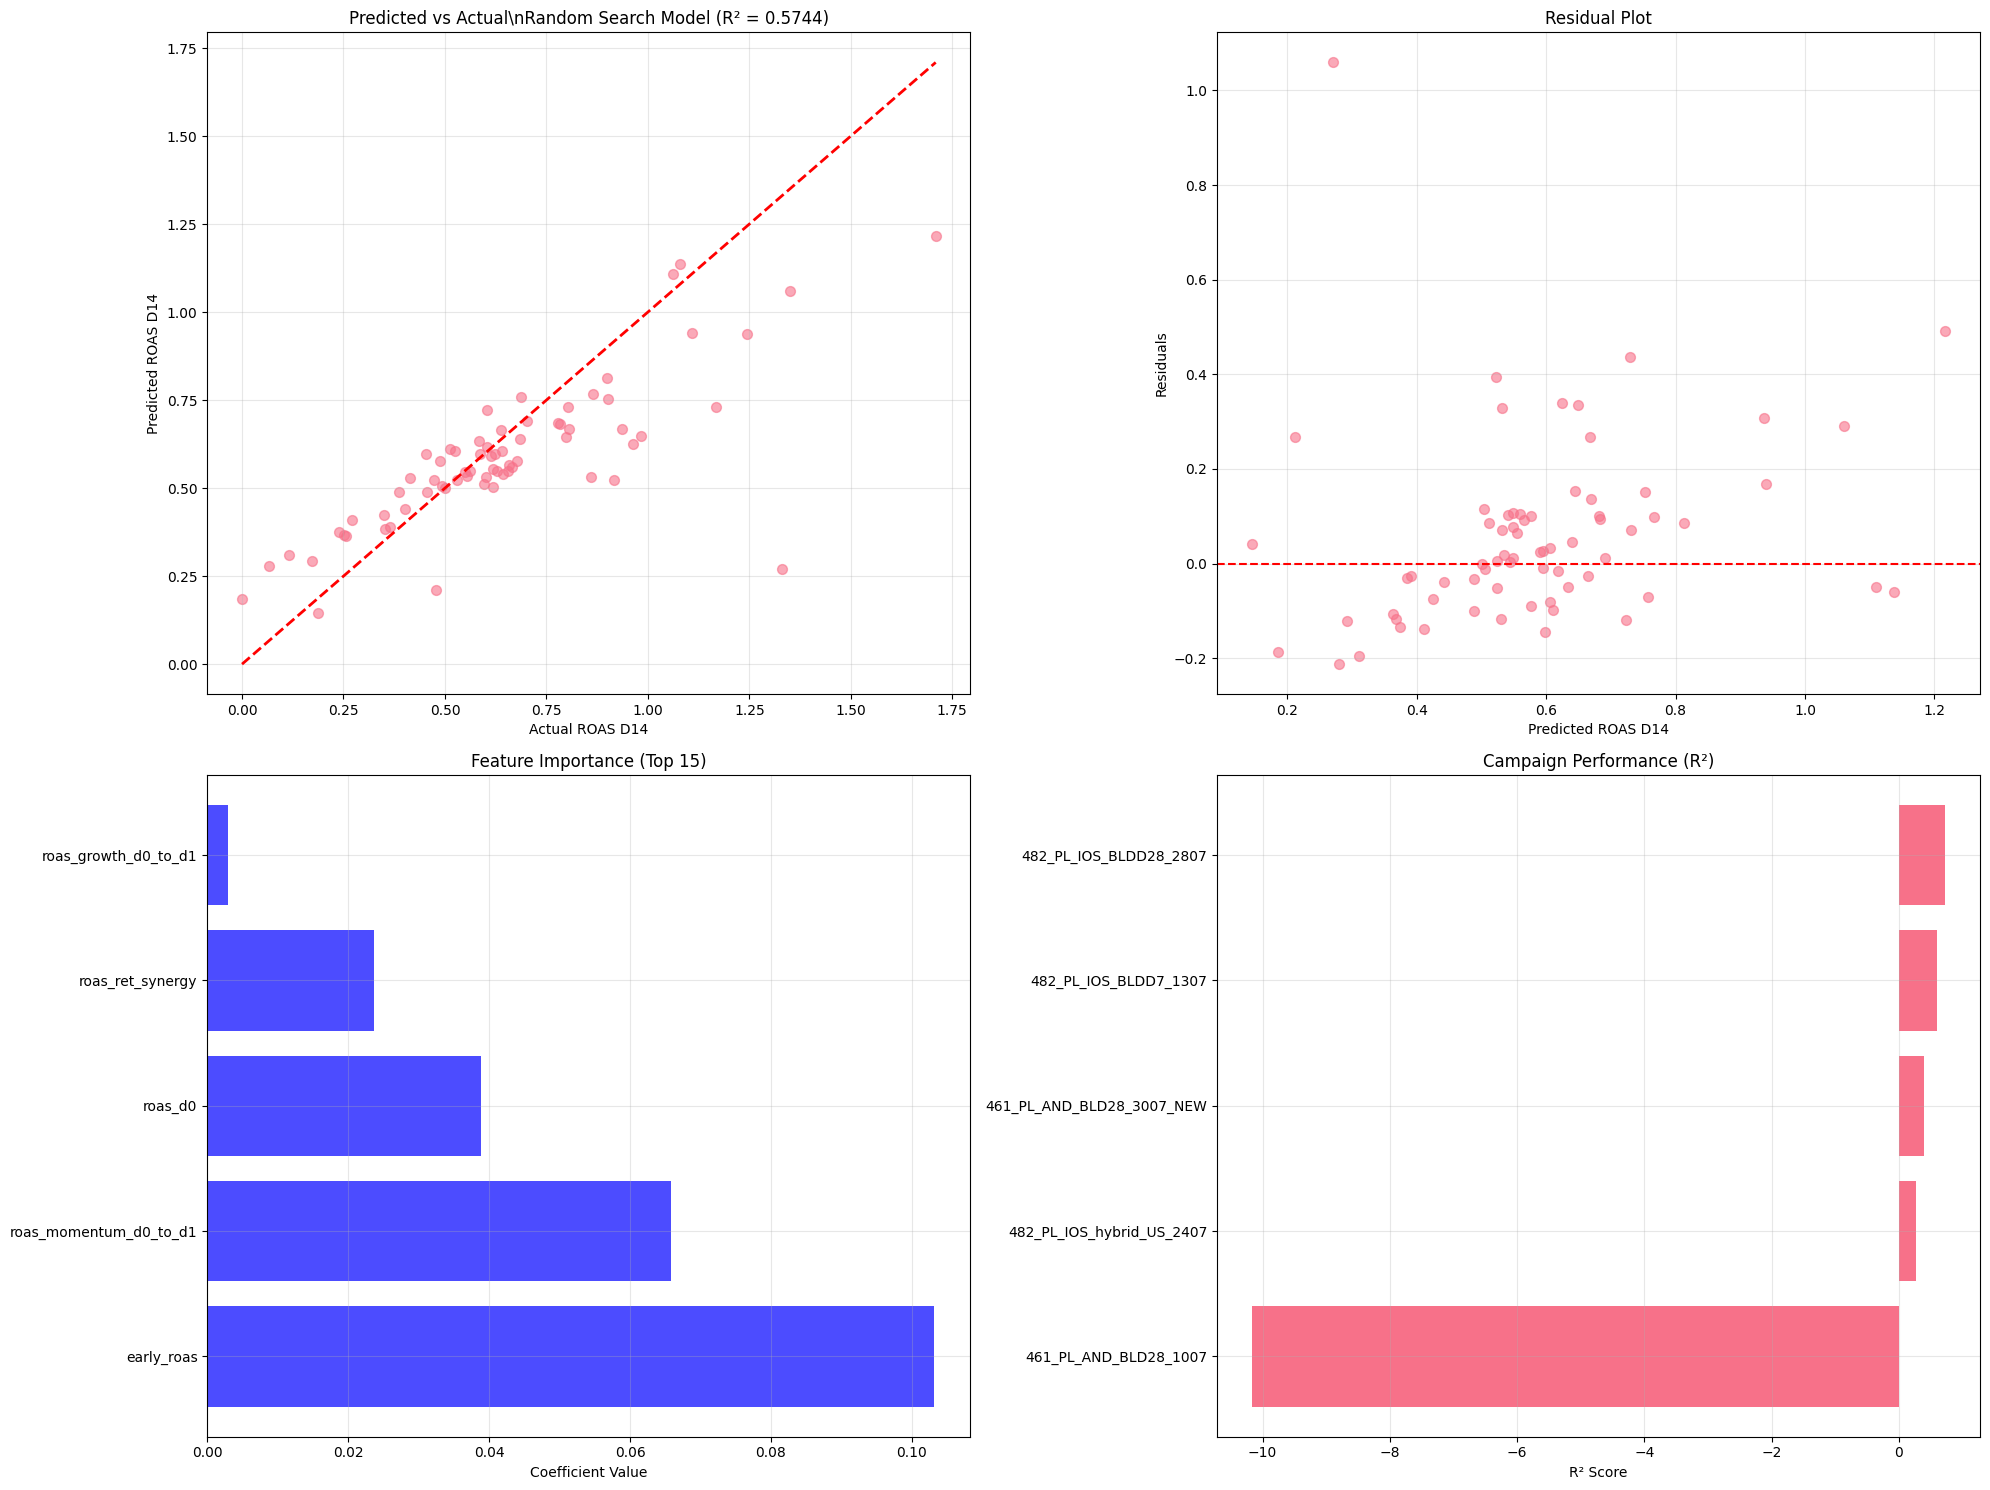

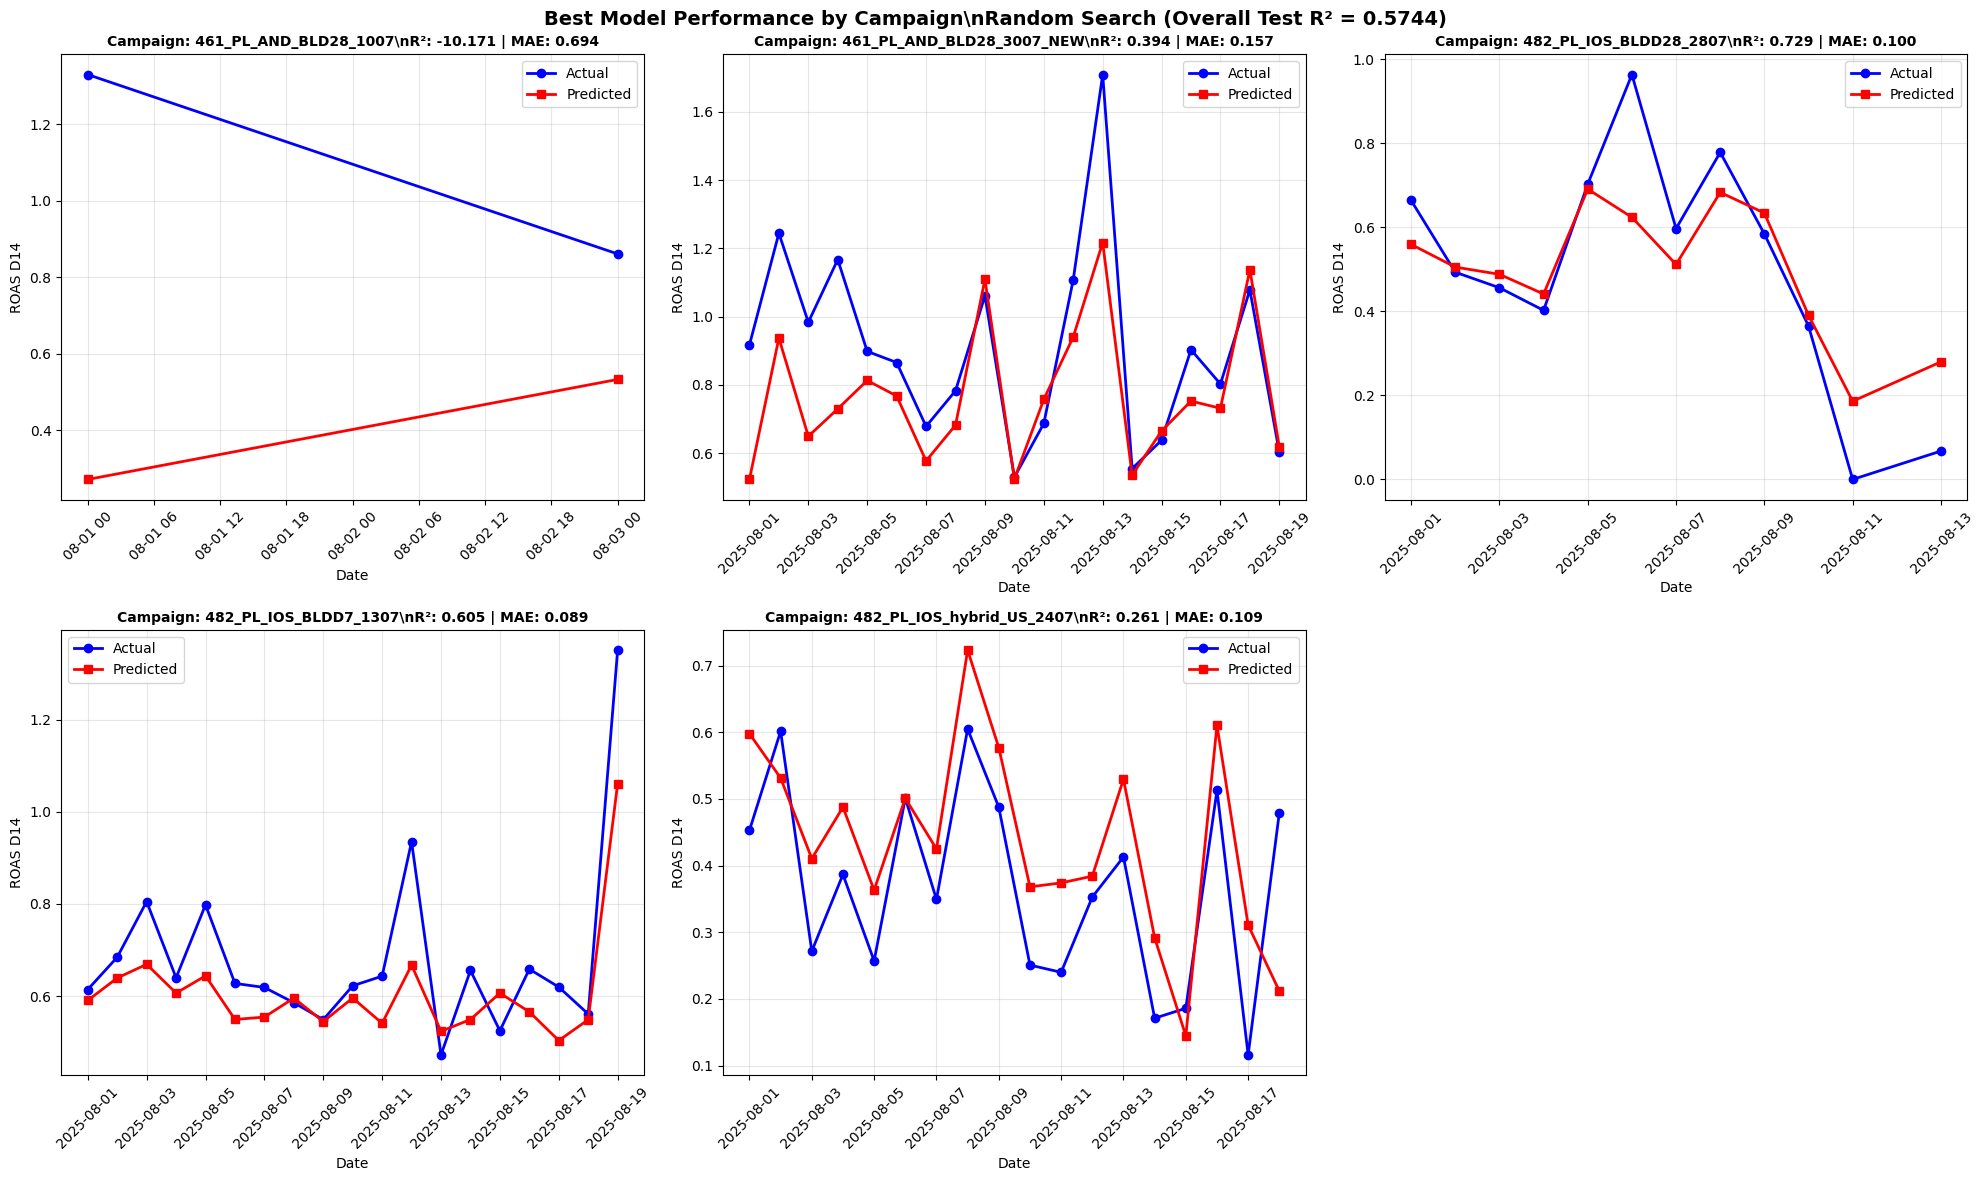

\n======================================================================
🎉 FINAL BEST MODEL SUMMARY
✅ Best Method: Random Search
✅ Test R²: 0.574415
✅ Test MAE: 0.131836
✅ Test RMSE: 0.203554
✅ Features Used: 39 (8 base + 31 engineered)
✅ Scaling: RobustScaler
✅ Overfitting Control: 0.014834


In [ ]:
# Block 4: Final Model Analysis and Visualization

print("\\n" + "="*70)
print("FINAL BEST MODEL ANALYSIS")
print("="*70)

# Calculate comprehensive metrics for the best model
final_train_pred = final_model.predict(X_train_scaled) if final_model else np.mean([
    Lasso(alpha=alpha, max_iter=10000, random_state=42).fit(X_train_scaled, y_train).predict(X_train_scaled)
    for alpha in alpha_ensemble], axis=0)

train_r2_final = r2_score(y_train, final_train_pred)
test_r2_final = r2_score(y_test, final_predictions)
train_mae_final = mean_absolute_error(y_train, final_train_pred)
test_mae_final = mean_absolute_error(y_test, final_predictions)
train_rmse_final = np.sqrt(mean_squared_error(y_train, final_train_pred))
test_rmse_final = np.sqrt(mean_squared_error(y_test, final_predictions))

print(f"Best Method: {best_method_name}")
print(f"Final Model Performance:")
print(f"  Training   - R²: {train_r2_final:.6f}, MAE: {train_mae_final:.6f}, RMSE: {train_rmse_final:.6f}")
print(f"  Test       - R²: {test_r2_final:.6f}, MAE: {test_mae_final:.6f}, RMSE: {test_rmse_final:.6f}")
print(f"  Overfitting: {train_r2_final - test_r2_final:.6f}")

# Feature importance analysis
if final_model is not None:
    feature_importance = pd.DataFrame({
        'feature': feature_columns,
        'coefficient': final_model.coef_
    })
    feature_importance['abs_coefficient'] = np.abs(feature_importance['coefficient'])
    feature_importance = feature_importance[feature_importance['abs_coefficient'] > 1e-6]
    feature_importance = feature_importance.sort_values('abs_coefficient', ascending=False)

    print(f"\\nFeature Importance (Non-zero coefficients: {len(feature_importance)}/{len(feature_columns)}):")
    print("-" * 50)
    for i, row in feature_importance.head(15).iterrows():
        impact = "📈 Positive" if row['coefficient'] > 0 else "📉 Negative"
        print(f"{row['feature']:30s} {row['coefficient']:8.4f} {impact}")
else:
    print("\\nEnsemble model - individual feature importance not available")

# Campaign-wise analysis
test_results = pd.DataFrame({
    'date': test_dates.values,
    'campaign': test_campaigns.values,
    'actual': y_test.values,
    'predicted': final_predictions
})

campaign_metrics = []
for campaign in test_results['campaign'].unique():
    campaign_mask = test_results['campaign'] == campaign
    campaign_data = test_results[campaign_mask]

    if len(campaign_data) > 0:
        mae = mean_absolute_error(campaign_data['actual'], campaign_data['predicted'])
        r2 = r2_score(campaign_data['actual'], campaign_data['predicted'])
        rmse = np.sqrt(mean_squared_error(campaign_data['actual'], campaign_data['predicted']))

        campaign_metrics.append({
            'campaign': campaign,
            'mae': mae,
            'r2': r2,
            'rmse': rmse,
            'n_samples': len(campaign_data),
            'mean_actual': campaign_data['actual'].mean(),
            'mean_predicted': campaign_data['predicted'].mean()
        })

campaign_metrics_df = pd.DataFrame(campaign_metrics).sort_values('r2', ascending=False)

print(f"\\nCampaign-wise Performance:")
print("-" * 70)
for _, row in campaign_metrics_df.iterrows():
    print(f"Campaign: {row['campaign']} (n={row['n_samples']})")
    print(f"  R²: {row['r2']:.4f} | MAE: {row['mae']:.4f} | RMSE: {row['rmse']:.4f}")
    print(f"  Avg Actual: {row['mean_actual']:.3f} | Avg Predicted: {row['mean_predicted']:.3f}")

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# 1. Predicted vs Actual scatter plot
axes[0,0].scatter(y_test, final_predictions, alpha=0.6, s=50)
min_val = min(y_test.min(), final_predictions.min())
max_val = max(y_test.max(), final_predictions.max())
axes[0,0].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
axes[0,0].set_xlabel('Actual ROAS D14')
axes[0,0].set_ylabel('Predicted ROAS D14')
axes[0,0].set_title(f'Predicted vs Actual\\n{best_method_name} Model (R² = {test_r2_final:.4f})')
axes[0,0].grid(True, alpha=0.3)

# 2. Residuals plot
residuals = y_test - final_predictions
axes[0,1].scatter(final_predictions, residuals, alpha=0.6, s=50)
axes[0,1].axhline(y=0, color='r', linestyle='--')
axes[0,1].set_xlabel('Predicted ROAS D14')
axes[0,1].set_ylabel('Residuals')
axes[0,1].set_title('Residual Plot')
axes[0,1].grid(True, alpha=0.3)

# 3. Feature importance (if available)
if final_model is not None and len(feature_importance) > 0:
    top_features = feature_importance.head(15)
    colors = ['red' if coef < 0 else 'blue' for coef in top_features['coefficient']]
    bars = axes[1,0].barh(range(len(top_features)), top_features['coefficient'], color=colors, alpha=0.7)
    axes[1,0].set_yticks(range(le
                               n(top_features)))
    axes[1,0].set_yticklabels(top_features['feature'])
    axes[1,0].set_xlabel('Coefficient Value')
    axes[1,0].set_title('Feature Importance (Top 15)')
    axes[1,0].grid(True, alpha=0.3)
else:
    axes[1,0].text(0.5, 0.5, 'Feature importance\\nnot available\\n(Ensemble model)',
                   ha='center', va='center', transform=axes[1,0].transAxes, fontsize=14)
    axes[1,0].set_title('Feature Importance')

# 4. Campaign performance comparison
campaign_metrics_df_sorted = campaign_metrics_df.sort_values('r2')
axes[1,1].barh(range(len(campaign_metrics_df_sorted)), campaign_metrics_df_sorted['r2'])
axes[1,1].set_yticks(range(len(campaign_metrics_df_sorted)))
axes[1,1].set_yticklabels(campaign_metrics_df_sorted['campaign'])
axes[1,1].set_xlabel('R² Score')
axes[1,1].set_title('Campaign Performance (R²)')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Time series plots for each campaign
campaigns = test_results['campaign'].unique()
n_campaigns = len(campaigns)
daily_results = test_results.groupby(['date', 'campaign']).agg({
    'actual': 'mean',
    'predicted': 'mean'
}).reset_index()

if n_campaigns > 0:
    fig, axes = plt.subplots(nrows=(n_campaigns + 2) // 3, ncols=3, figsize=(20, 6 * ((n_campaigns + 2) // 3)))
    if n_campaigns == 1:
        axes = [axes]
    elif (n_campaigns + 2) // 3 == 1:
        axes = [axes]
    else:
        axes = axes.flatten()

    for i, campaign in enumerate(campaigns):
        campaign_daily = daily_results[daily_results['campaign'] == campaign].sort_values('date')
        campaign_metric = campaign_metrics_df[campaign_metrics_df['campaign'] == campaign].iloc[0]

        if len(campaign_daily) > 0:
            axes[i].plot(campaign_daily['date'], campaign_daily['actual'],
                        marker='o', label='Actual', linewidth=2, markersize=6, color='blue')
            axes[i].plot(campaign_daily['date'], campaign_daily['predicted'],
                        marker='s', label='Predicted', linewidth=2, markersize=6, color='red')

            title = f'Campaign: {campaign}\\n'
            title += f'R²: {campaign_metric["r2"]:.3f} | MAE: {campaign_metric["mae"]:.3f}'
            axes[i].set_title(title, fontsize=10, fontweight='bold')

            axes[i].set_xlabel('Date')
            axes[i].set_ylabel('ROAS D14')
            axes[i].legend()
            axes[i].grid(True, alpha=0.3)
            axes[i].tick_params(axis='x', rotation=45)

    # Remove empty subplots
    for j in range(n_campaigns, len(axes)):
        if n_campaigns > 1:
            fig.delaxes(axes[j])

    plt.suptitle(f'Best Model Performance by Campaign\\n{best_method_name} (Overall Test R² = {test_r2_final:.4f})',
                 fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

print("\\n" + "="*70)
print("🎉 FINAL BEST MODEL SUMMARY")
print("="*70)
print(f"✅ Best Method: {best_method_name}")
print(f"✅ Test R²: {test_r2_final:.6f}")
print(f"✅ Test MAE: {test_mae_final:.6f}")
print(f"✅ Test RMSE: {test_rmse_final:.6f}")
print(f"✅ Features Used: {len(feature_columns)} ({len(base_features)} base + {len(engineered_features)} engineered)")
print(f"✅ Scaling: RobustScaler")
print(f"✅ Overfitting Control: {train_r2_final - test_r2_final:.6f}")


# Group by c,date, geo, to predict and regard on c,date